<a href="https://colab.research.google.com/github/Sievv/AMPs-Against--PS/blob/main/KP_imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Prepare & Split Raw Data(Data Active 138 & Inactive 373)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/KP'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


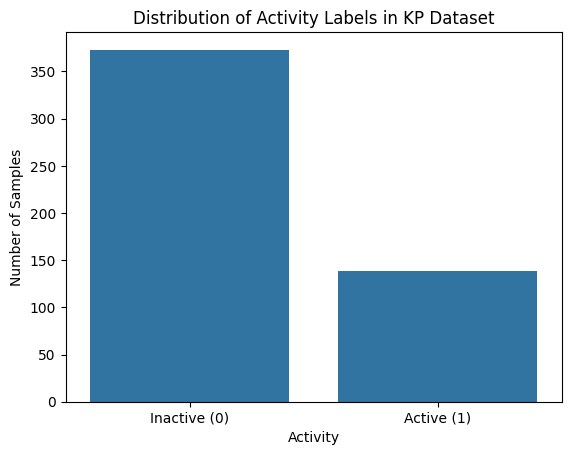

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_active = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/Klebsiella_active_138.csv')
df_inactive = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/Inactive 373.csv')

# Combine datasets
df_kp = pd.concat([df_active, df_inactive], ignore_index=True)

# Plot activity label distribution
counts = df_kp['Activity'].value_counts().sort_index()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks([0, 1], ['Inactive (0)', 'Active (1)'])
plt.ylabel('Number of Samples')
plt.title('Distribution of Activity Labels in KP Dataset')
plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_active = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/Klebsiella_active_138.csv')
df_inactive = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/Inactive 373.csv')

# Combine datasets
df_kp = pd.concat([df_active, df_inactive], ignore_index=True)

# Set seaborn style
sns.set(style='whitegrid', context='talk')

# Plot activity label distribution
plt.figure(figsize=(6, 4))
counts = df_kp['Activity'].value_counts().sort_index()
sns.barplot(x=[0, 1], y=counts.values, palette='deep')
plt.xticks([0, 1], ['Inactive (0)', 'Active (1)'])
plt.ylabel('Number of Samples')
plt.title('Distribution of Activity Labels in KP Dataset')
plt.tight_layout()
plt.show()

# Plot feature distributions
numeric_features = df_kp.select_dtypes(include=['float64', 'int64']).columns.drop('Activity')
n_features = len(numeric_features)

# Plot each feature's distribution by Activity
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df_kp, x=feature, hue='Activity', common_norm=False, fill=True, palette='Set1', alpha=0.6)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Activity', labels=['Inactive (0)', 'Active (1)'])
    plt.tight_layout()
    plt.show()


<ipython-input-4-4131526278>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[0, 1], y=counts.values, palette='deep')


In [5]:
# Combine datasets
df_combined = pd.concat([df_active, df_inactive], ignore_index=True)

# Shuffle the combined dataframe
df_shuffled = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the shuffled data
print(df_shuffled.head())
print(df_shuffled['Activity'].value_counts())


                                            Sequence  Activity
0                     NCNFLCKVKQRLRSVSSTSHIGMAIPRPRG         1
1                               KRVNWRKVGLGASYVMSWLG         1
2            TAKEAKEKAKETALAATEKAKDLASKAATKKQQQQQQFV         0
3  VCIIFAIMARFYTYINPAEIEAQFDEDEKKKGVGKENPYSSLEPVS...         0
4                               GFCWYVCYRNGVRVCYRRCN         1
Activity
0    373
1    138
Name: count, dtype: int64


In [6]:
# Split into 80% train and 20% test
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_shuffled, test_size=0.2, stratify=df_shuffled['Activity'], random_state=42)

# Check sizes
print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

# Optional: check label distribution
print("Train label distribution:")
print(train_df['Activity'].value_counts(normalize=True))
print("Test label distribution:")
print(test_df['Activity'].value_counts(normalize=True))

Training set size: 408
Test set size: 103
Train label distribution:
Activity
0    0.730392
1    0.269608
Name: proportion, dtype: float64
Test label distribution:
Activity
0    0.728155
1    0.271845
Name: proportion, dtype: float64


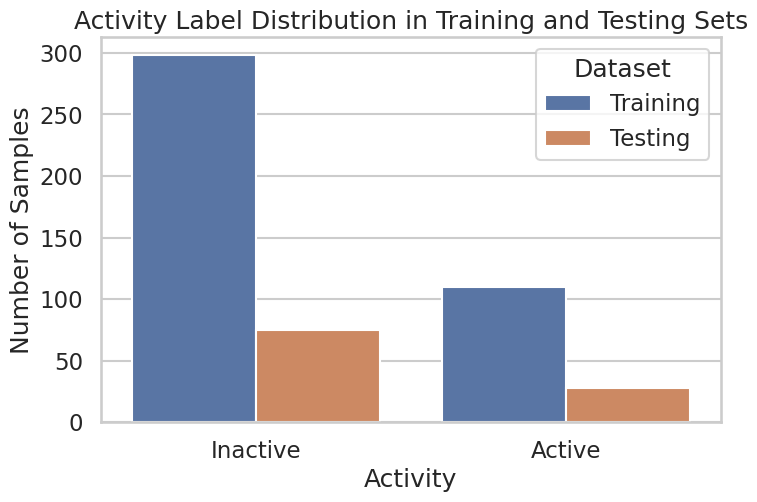

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split


# Count labels in train and test
train_counts = train_df['Activity'].value_counts().sort_index()
test_counts = test_df['Activity'].value_counts().sort_index()


plot_df = pd.DataFrame({
    'Training': train_counts,
    'Testing': test_counts
}).reset_index(names=['Activity_Label'])


plot_df = plot_df.melt(id_vars='Activity_Label', var_name='Dataset', value_name='Count')

# Rename Activity labels for clarity
plot_df['Activity'] = plot_df['Activity_Label'].map({0: 'Inactive', 1: 'Active'})

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Activity', y='Count', hue='Dataset', data=plot_df)
plt.title('Activity Label Distribution in Training and Testing Sets')
plt.ylabel('Number of Samples')
plt.xlabel('Activity')
plt.show()

In [8]:
# Save test set CSV to Google Drive folder
val_save_path = '/content/drive/MyDrive/KP/KP imbalance/Test_set.csv'
test_df.to_csv(val_save_path, index=False)
val_save_path = '/content/drive/MyDrive/KP/KP imbalance/Train_set.csv'
train_df.to_csv(val_save_path, index=False)

print(f"Test set saved to: {val_save_path}")
print(f"Training set size: {len(train_df)}") # Corrected variable name for test set size print statement
print(f"Test set size: {len(test_df)}") # Corrected variable name for test set size print statement

Test set saved to: /content/drive/MyDrive/KP/KP imbalance/Train_set.csv
Training set size: 408
Test set size: 103


# Loading training set Calculation feature

In [9]:
import pandas as pd
import numpy as np
train_df = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/Train_set.csv')
print(train_df.head())


                          Sequence  Activity
0         FFPIVAGVAAKVLKKIFCTISKKC         1
1                       AMQNYERRRK         0
2        IARRALKKALRARHTIPQCKKFGRR         1
3    VDKMVPRTFRTVDNLDLPLAEGCPKLGPQ         0
4  SVCVYSQTYDAARWLPERLVRQVSNNNQSRE         0


In [10]:
# Install Biopython if not already installed
!pip install biopython

import pandas as pd
from Bio.SeqUtils import molecular_weight
from Bio.Seq import Seq

# Load the training dataset (update the file path as needed)
file_path = '/content/drive/MyDrive/KP/KP imbalance/Train_set.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Define peptide feature calculation functions

def calculate_charge(sequence):
    """Calculate net charge: K, R, H (+), D, E (-)"""
    positive = sequence.count('K') + sequence.count('R') + sequence.count('H')
    negative = sequence.count('D') + sequence.count('E')
    return positive - negative

def calculate_molecular_weight(sequence):
    """Calculate molecular weight of peptide sequence"""
    return molecular_weight(Seq(sequence), seq_type='protein')

def calculate_hydrophobicity(sequence):
    """Calculate hydrophobicity based on Kyte-Doolittle scale residues"""
    hydrophobic_residues = 'AVILMFWP'
    hydrophobic_score = sum([1 for aa in sequence if aa in hydrophobic_residues])
    return hydrophobic_score

def calculate_number_of_cysteines(sequence):
    """Count cysteine residues"""
    return sequence.count('C')

def calculate_number_of_disulfide_bridges(sequence):
    """Estimate disulfide bridges as integer division of cysteines by 2"""
    cysteines = sequence.count('C')
    return cysteines // 2

def calculate_isoelectric_point(sequence):
    """Simplified isoelectric point estimate"""
    pKa_acidic = {'D': 3.9, 'E': 4.25}
    pKa_basic = {'K': 10.5, 'R': 12.5, 'H': 6.0}
    acidic_count = sum([sequence.count(aa) for aa in pKa_acidic])
    basic_count = sum([sequence.count(aa) for aa in pKa_basic])
    if acidic_count + basic_count > 0:
        pI = (sum([pKa_acidic[aa] * sequence.count(aa) for aa in pKa_acidic]) +
              sum([pKa_basic[aa] * sequence.count(aa) for aa in pKa_basic])) / (acidic_count + basic_count)
    else:
        pI = 7.0  # Neutral default if no acidic/basic residues
    return pI

def amino_acid_composition(sequence):
    """Calculate percentage composition of each amino acid"""
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    composition = {aa: sequence.count(aa) for aa in amino_acids}
    total_residues = len(sequence)
    composition_percent = {aa: (count / total_residues) * 100 if total_residues > 0 else 0
                          for aa, count in composition.items()}
    return composition_percent

def secondary_structure_features(sequence):
    """Simplified secondary structure feature counts"""
    helix_aa = 'ALIVMFYW'
    sheet_aa = 'FYW'
    turn_aa = 'GP'
    helix = sum([sequence.count(aa) for aa in helix_aa])
    sheet = sum([sequence.count(aa) for aa in sheet_aa])
    turn = sum([sequence.count(aa) for aa in turn_aa])
    flexibility = helix / len(sequence) if len(sequence) > 0 else 0
    return helix, turn, sheet, flexibility

# Specify the sequence column name in your dataframe
seq_col = 'Sequence'  # Change if your CSV uses a different column name

# Apply feature calculations
data['Length'] = data[seq_col].apply(len)
data['Charge'] = data[seq_col].apply(calculate_charge)
data['Hydrophobicity'] = data[seq_col].apply(calculate_hydrophobicity)
data['Molecular_Weight'] = data[seq_col].apply(calculate_molecular_weight)
data['Number_of_Cysteines'] = data[seq_col].apply(calculate_number_of_cysteines)
data['Number_of_Disulfide_Bridges'] = data[seq_col].apply(calculate_number_of_disulfide_bridges)
data['Isoelectric_Point'] = data[seq_col].apply(calculate_isoelectric_point)
data['Amino_Acid_Composition'] = data[seq_col].apply(amino_acid_composition)
data[['Helix', 'Turn', 'Sheet', 'Flexibility']] = data[seq_col].apply(secondary_structure_features).apply(pd.Series)

# Expand Amino Acid Composition dict into individual columns
aa_columns = pd.DataFrame(data['Amino_Acid_Composition'].tolist(), columns=list('ACDEFGHIKLMNPQRSTVWY'))
data = pd.concat([data, aa_columns], axis=1).drop(columns=['Amino_Acid_Composition'])

# Save the enhanced dataset with features
output_file = '/content/drive/MyDrive/KP/KP imbalance/training_Feature_.csv'
data.to_csv(output_file, index=False)

print(f"Feature calculation complete. Data saved to: {output_file}")
print(data.head())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.3 MB/s eta 0:00:00
Feature calculation complete. Data saved to: /content/drive/MyDrive/KP/KP imbalance/training_Feature_.csv
                          Sequence  Activity  Length  Charge  Hydrophobicity  \
0         FFPIVAGVAAKVLKKIFCTISKKC         1      24       5              14   
1                       AMQNYERRRK         0      10       3               2   
2        IARRALKKALRARHTIPQCKKFGRR         1      25      11              10   
3    VDKMVPRTFRTVDNLDLPLAEGCPKLGPQ         0      29       0              14   
4  SVCVYSQTYDAARWLPERLVRQVSNNNQSRE         0      31       1              10   

   Molecular_Weight  Number_of_Cysteines  Number_of_Disulfide_Bridges  \
0         2612.2888                    2                            1   
1         1351.5376                    0                            0   
2         2975.6163                    1                            0   
3         3210.7245                    1    

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the enhanced dataset with calculated features
file_path = '/content/drive/MyDrive/KP/KP imbalance/training_Feature_.csv'
data = pd.read_csv(file_path)

# Set seaborn style for publication
sns.set(style='whitegrid', context='talk')

# List of amino acid composition features
amino_acids_features = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

# List of physicochemical features
physicochemical_features = ['Molecular_Weight', 'Hydrophobicity', 'Isoelectric_Point', 'Charge', 'Number_of_Cysteines', 'Number_of_Disulfide_Bridges']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# --- Plotting Amino Acid Composition (Counts) ---
# Prepare data for plotting the counts of amino acids for Active vs Inactive samples
aa_counts_active = data[data['Activity'] == 1][amino_acids_features].sum(axis=0)
aa_counts_inactive = data[data['Activity'] == 0][amino_acids_features].sum(axis=0)

# Plot the counts for Active and Inactive
width = 0.35  # Bar width
x = range(len(amino_acids_features))

axes[0].bar(x, aa_counts_active, width, label='Active', color='blue')
axes[0].bar([i + width for i in x], aa_counts_inactive, width, label='Inactive', color='red')

axes[0].set_title('Amino Acid Composition Counts (Active vs Inactive)', fontsize=16)
axes[0].set_xlabel('Amino Acid', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticks([i + width / 2 for i in x])  # Position the ticks between the bars
axes[0].set_xticklabels(amino_acids_features, fontsize=10, rotation=90)  # Label the amino acids on x-axis
axes[0].legend(title='Activity', loc='upper right')
axes[0].tick_params(axis='both', which='major', labelsize=10)

# --- Plotting Physicochemical Properties ---
# Prepare data for plotting the mean of physicochemical properties for Active vs Inactive samples
physicochemical_active = data[data['Activity'] == 1][physicochemical_features].mean(axis=0)
physicochemical_inactive = data[data['Activity'] == 0][physicochemical_features].mean(axis=0)

# Plot the mean for Active and Inactive
x_phys = range(len(physicochemical_features))

axes[1].bar(x_phys, physicochemical_active, width, label='Active', color='blue')
axes[1].bar([i + width for i in x_phys], physicochemical_inactive, width, label='Inactive', color='red')

axes[1].set_title('Physicochemical Properties (Active vs Inactive)', fontsize=16)
axes[1].set_xlabel('Physicochemical Feature', fontsize=12)
axes[1].set_ylabel('Mean Value', fontsize=12)
axes[1].set_xticks([i + width / 2 for i in x_phys])  # Position the ticks between the bars
axes[1].set_xticklabels(physicochemical_features, fontsize=10, rotation=90)  # Label the physicochemical properties on x-axis
axes[1].legend(title='Activity', loc='upper right')
axes[1].tick_params(axis='both', which='major', labelsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the enhanced dataset with calculated features
file_path = '/content/drive/MyDrive/KP/KP imbalance/training_Feature_.csv'
data = pd.read_csv(file_path)

# Set seaborn style for publication
sns.set(style='whitegrid', context='talk')

# List of physicochemical features
physicochemical_features = ['Molecular_Weight', 'Hydrophobicity', 'Isoelectric_Point', 'Charge', 'Number_of_Cysteines', 'Number_of_Disulfide_Bridges']

# Create a figure for plotting histograms for each physicochemical feature
fig, axes = plt.subplots(len(physicochemical_features), 1, figsize=(10, 6 * len(physicochemical_features)))

# Plot histograms for each physicochemical feature
for i, feature in enumerate(physicochemical_features):
    # Plot for Active samples
    sns.histplot(data=data[data['Activity'] == 1], x=feature, color='blue', kde=True, bins=15, label=f'Active: {feature}', alpha=0.6, ax=axes[i])
    # Plot for Inactive samples
    sns.histplot(data=data[data['Activity'] == 0], x=feature, color='red', kde=True, bins=15, label=f'Inactive: {feature}', alpha=0.6, ax=axes[i])

    # Set the title and labels
    axes[i].set_title(f'{feature} Distribution (Active vs Inactive)', fontsize=16)
    axes[i].set_xlabel(f'{feature} Value', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

    # Add the legend
    axes[i].legend(title='Activity', loc='upper right')

    # Ensure the y-axis starts at 0
    axes[i].set_ylim(bottom=0)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [13]:
import pandas as pd

# Separate features and label
X_train = data.drop(columns=['Sequence', 'Activity'])  # Features only
y_train = data['Activity']                             # Labels only

# Save features and labels separately to CSV files
X_train.to_csv('/content/drive/MyDrive/KP/KP imbalance/X_train.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/KP/KP imbalance/y_train.csv', index=False)

print("X_train and y_train saved successfully!")


X_train and y_train saved successfully!


# Building model

Step 1: Load training data

In [14]:
import pandas as pd

X_train = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/y_train.csv').squeeze()


Step 2: Train and evaluate tree-based models (using cross-validation for example)

Evaluating Random Forest...
Random Forest - Mean F1 Score: 0.9013 (+/- 0.0546)
Random Forest - ROC AUC: 1.0000
Random Forest - PR AUC: 1.0000
Random Forest - Sensitivity: 1.0000
Random Forest - Specificity: 1.0000
Random Forest - MCC: 1.0000
Evaluating Gradient Boosting...
Gradient Boosting - Mean F1 Score: 0.8905 (+/- 0.0432)
Gradient Boosting - ROC AUC: 1.0000
Gradient Boosting - PR AUC: 1.0000
Gradient Boosting - Sensitivity: 1.0000
Gradient Boosting - Specificity: 1.0000
Gradient Boosting - MCC: 1.0000
Evaluating XGBoost...
XGBoost - Mean F1 Score: 0.8904 (+/- 0.0521)
XGBoost - ROC AUC: 1.0000
XGBoost - PR AUC: 1.0000
XGBoost - Sensitivity: 1.0000
XGBoost - Specificity: 1.0000
XGBoost - MCC: 1.0000
Evaluating AdaBoost...
AdaBoost - Mean F1 Score: 0.9060 (+/- 0.0512)
AdaBoost - ROC AUC: 1.0000
AdaBoost - PR AUC: 1.0000
AdaBoost - Sensitivity: 1.0000
AdaBoost - Specificity: 1.0000
AdaBoost - MCC: 1.0000
Evaluating SVM...
SVM - Mean F1 Score: 0.0000 (+/- 0.0000)
SVM - ROC AUC: 0.9619


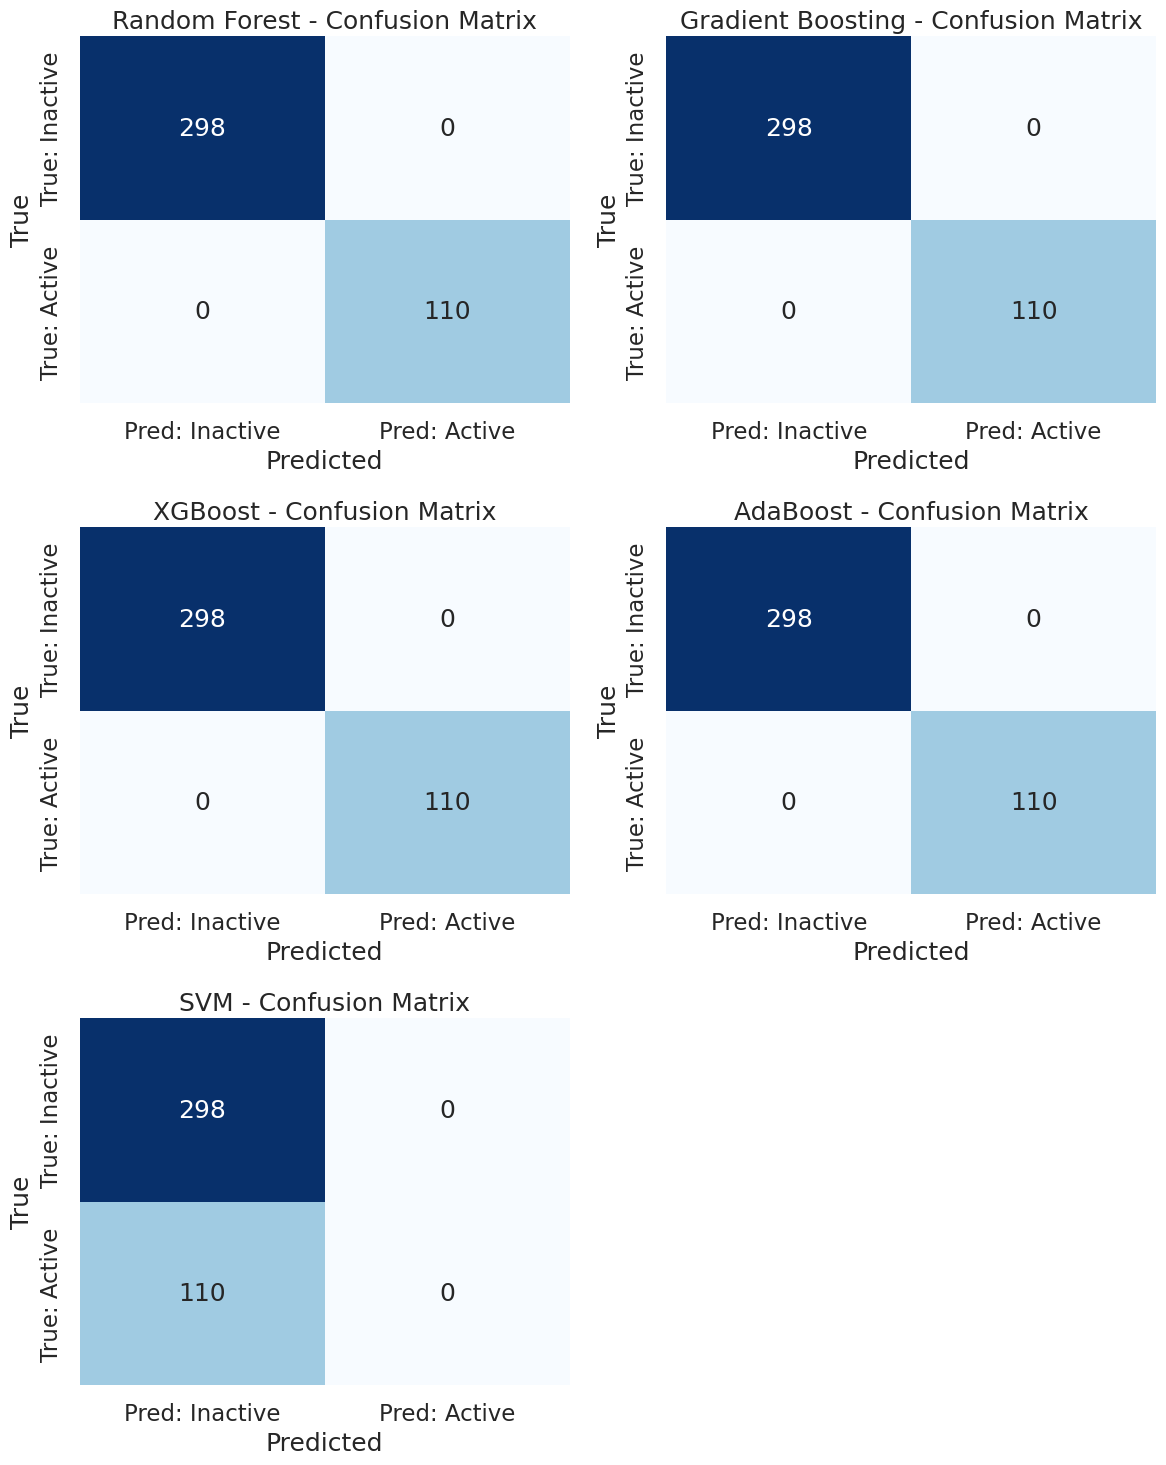


Model Comparison Summary:

F1 Scores:
Random Forest: 0.9013 (+/- 0.0546)
Gradient Boosting: 0.8905 (+/- 0.0432)
XGBoost: 0.8904 (+/- 0.0521)
AdaBoost: 0.9060 (+/- 0.0512)
SVM: 0.0000 (+/- 0.0000)

ROC AUC Scores:
Random Forest: 1.0000
Gradient Boosting: 1.0000
XGBoost: 1.0000
AdaBoost: 1.0000
SVM: 0.9619

PR AUC Scores:
Random Forest: 1.0000
Gradient Boosting: 1.0000
XGBoost: 1.0000
AdaBoost: 1.0000
SVM: 0.9267

Sensitivity (Recall) Scores:
Random Forest: 1.0000
Gradient Boosting: 1.0000
XGBoost: 1.0000
AdaBoost: 1.0000
SVM: 0.0000

Specificity Scores:
Random Forest: 1.0000
Gradient Boosting: 1.0000
XGBoost: 1.0000
AdaBoost: 1.0000
SVM: 1.0000

MCC Scores:
Random Forest: 1.0000
Gradient Boosting: 1.0000
XGBoost: 1.0000
AdaBoost: 1.0000
SVM: 0.0000


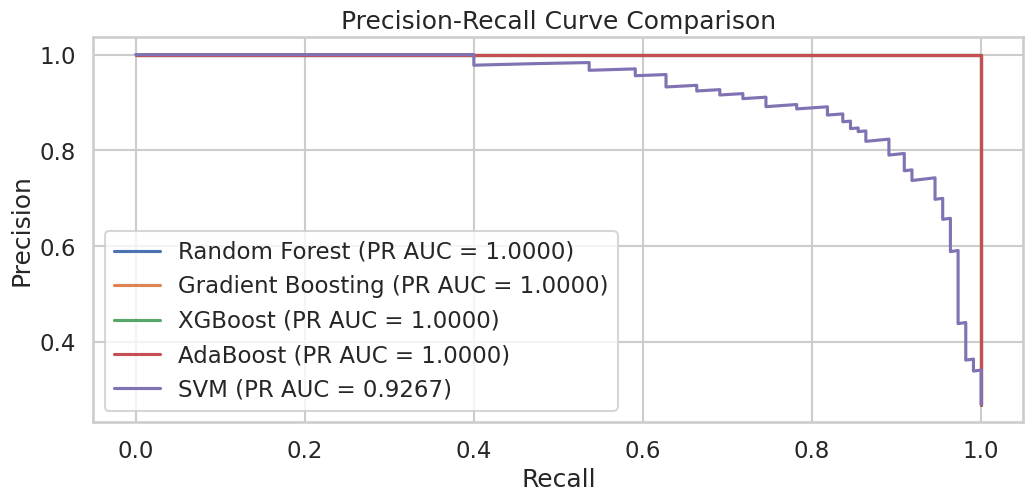

In [15]:
from sklearn.metrics import (
    confusion_matrix,
    matthews_corrcoef,
    roc_auc_score,
    average_precision_score,
    precision_recall_curve,
    roc_curve,
    recall_score
)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier # Import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from xgboost import XGBClassifier # Import XGBClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd # Ensure pandas is imported if not already available

# Define the models you want to evaluate
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),  # Adding SVM

}

# Prepare lists to store results
f1_scores = []
roc_aucs = []
pr_aucs = []
sensitivities = []
specificities = []
mcc_scores = []


n_rows = (len(models) + 1) // 2 # Integer division rounds down, add 1 before division to round up if needed
n_cols = 2
plt.figure(figsize=(12, n_rows * 5)) # Adjust figure height based on number of rows

# Train, evaluate and collect metrics for each model
for i, (name, model) in enumerate(models.items(), 1):
    print(f"Evaluating {name}...")

    # Cross-validation: F1 score
    f1_cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    mean_f1 = np.mean(f1_cv_scores)
    std_f1 = np.std(f1_cv_scores)

    # Train the model on the entire training set for later evaluation
    model.fit(X_train, y_train)

    # ROC AUC Score
    y_prob = model.predict_proba(X_train)[:, 1]  # Probability for positive class
    roc_auc = roc_auc_score(y_train, y_prob)

    # PR AUC Score
    pr_auc = average_precision_score(y_train, y_prob)

    # Store results for comparison
    f1_scores.append((name, mean_f1, std_f1))
    roc_aucs.append((name, roc_auc))
    pr_aucs.append((name, pr_auc))

    # Confusion Matrix
    y_pred = model.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate Sensitivity, Specificity, and MCC
    sensitivity = recall_score(y_train, y_pred)  # True Positive Rate
    specificity = tn / (tn + fp)  # True Negative Rate
    mcc = matthews_corrcoef(y_train, y_pred)

    # Store additional metrics
    sensitivities.append((name, sensitivity))
    specificities.append((name, specificity))
    mcc_scores.append((name, mcc))

    # Display metrics
    print(f"{name} - Mean F1 Score: {mean_f1:.4f} (+/- {std_f1:.4f})")
    print(f"{name} - ROC AUC: {roc_auc:.4f}")
    print(f"{name} - PR AUC: {pr_auc:.4f}")
    print(f"{name} - Sensitivity: {sensitivity:.4f}")
    print(f"{name} - Specificity: {specificity:.4f}")
    print(f"{name} - MCC: {mcc:.4f}")

    # Plot confusion matrix
    # Changed subplot grid to n_rows x n_cols to accommodate all models
    plt.subplot(n_rows, n_cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

# Summary of model comparison
print("\nModel Comparison Summary:")

# F1 Scores
print("\nF1 Scores:")
for model_name, f1, std in f1_scores:
    print(f"{model_name}: {f1:.4f} (+/- {std:.4f})")

# ROC AUC Scores
print("\nROC AUC Scores:")
for model_name, auc in roc_aucs:
    print(f"{model_name}: {auc:.4f}")

# PR AUC Scores
print("\nPR AUC Scores:")
for model_name, auc in pr_aucs:
    print(f"{model_name}: {auc:.4f}")

# Sensitivity
print("\nSensitivity (Recall) Scores:")
for model_name, sensitivity in sensitivities:
    print(f"{model_name}: {sensitivity:.4f}")

# Specificity
print("\nSpecificity Scores:")
for model_name, specificity in specificities:
    print(f"{model_name}: {specificity:.4f}")

# MCC Scores
print("\nMCC Scores:")
for model_name, mcc in mcc_scores:
    print(f"{model_name}: {mcc:.4f}")

# Optional: If you want to visualize PR curves for all models

plt.figure(figsize=(12, 5))
for i, (name, model) in enumerate(models.items(), 1):
    # Calculate Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_train, model.predict_proba(X_train)[:, 1])
    plt.plot(recall, precision, label=f'{name} (PR AUC = {pr_aucs[i-1][1]:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='lower left')
plt.show()

try use rendom state =none

X_test and y_test loaded successfully.
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:47:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training AdaBoost...
Training SVM...


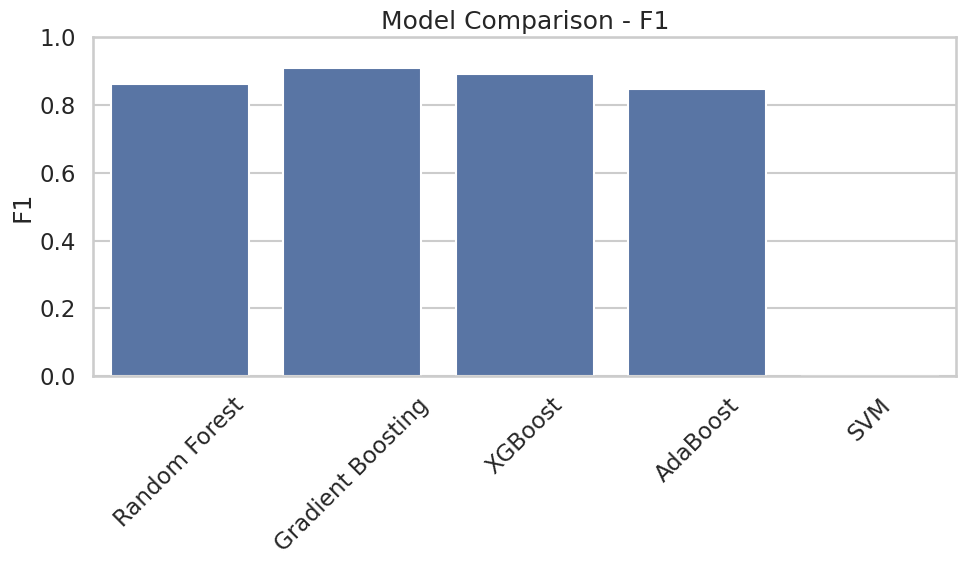

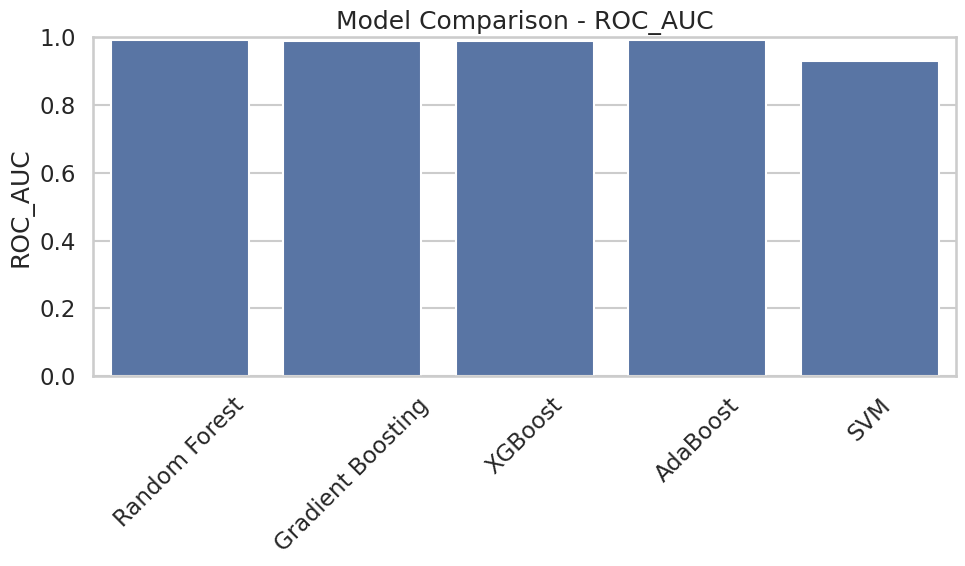

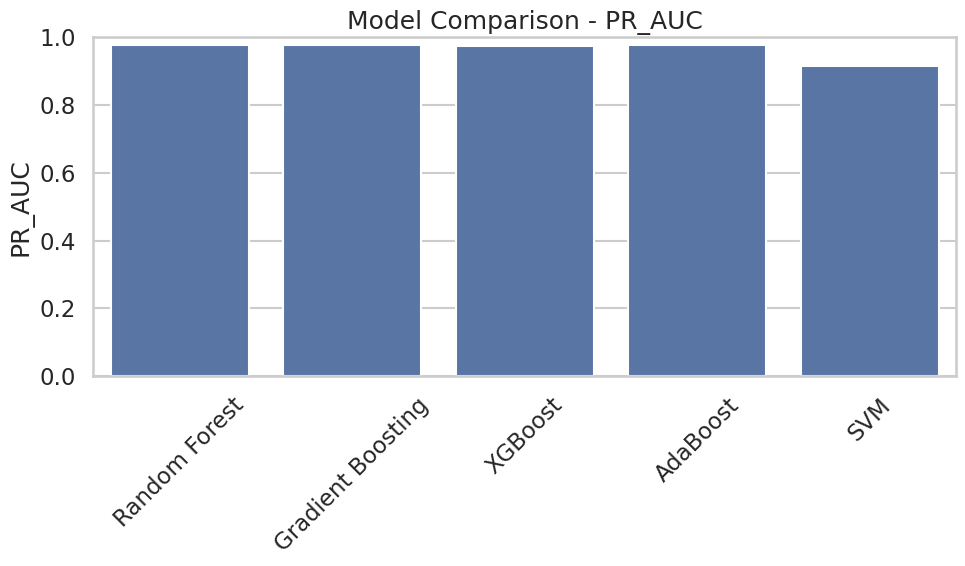

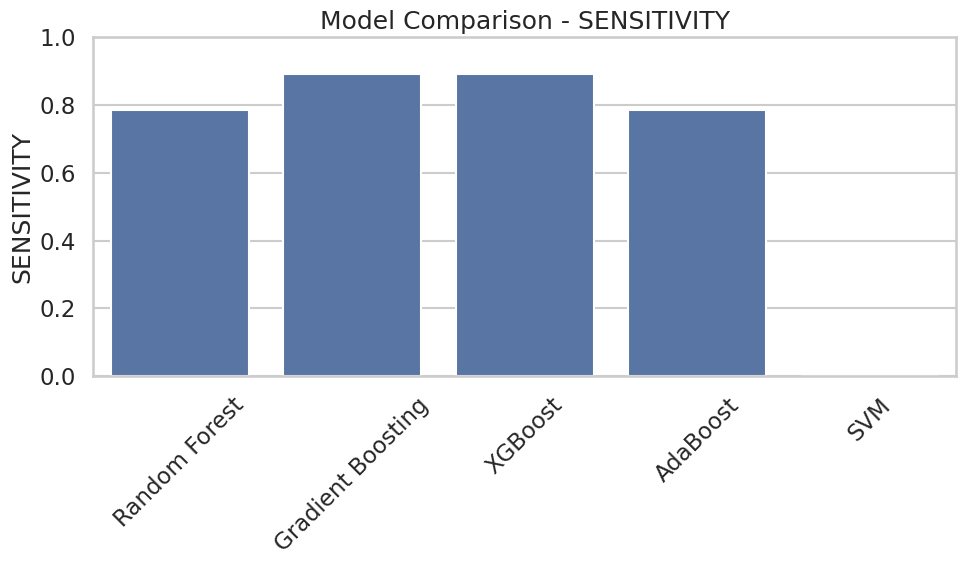

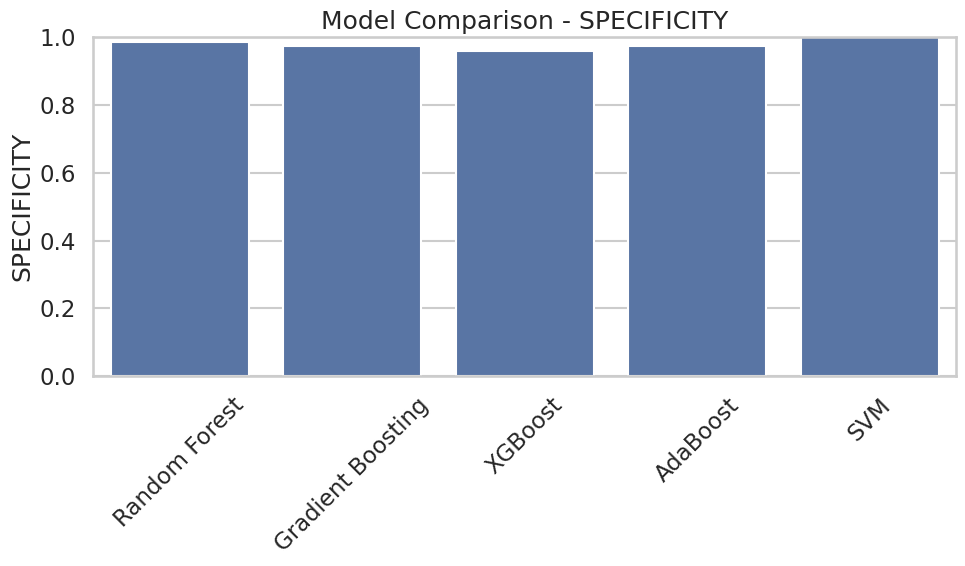

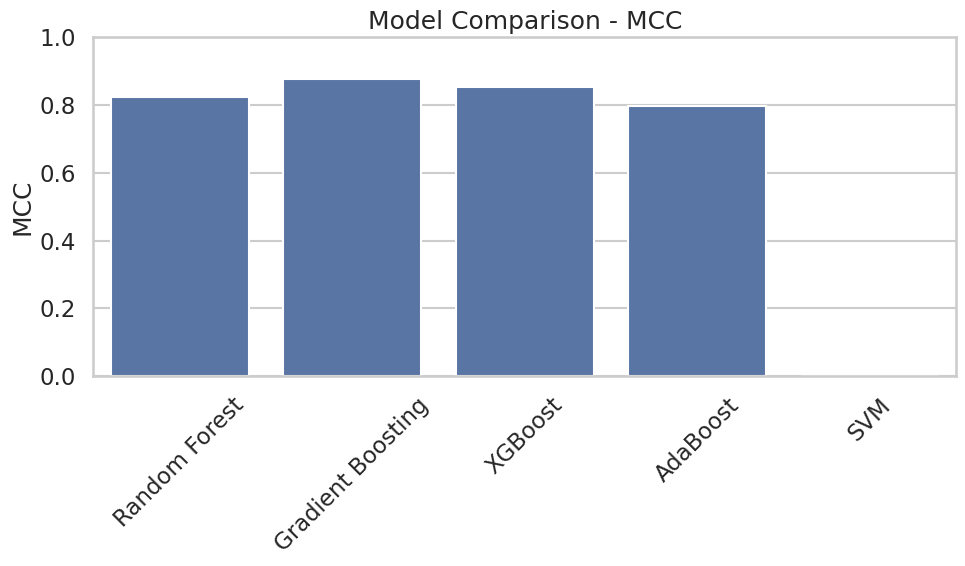

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:47:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


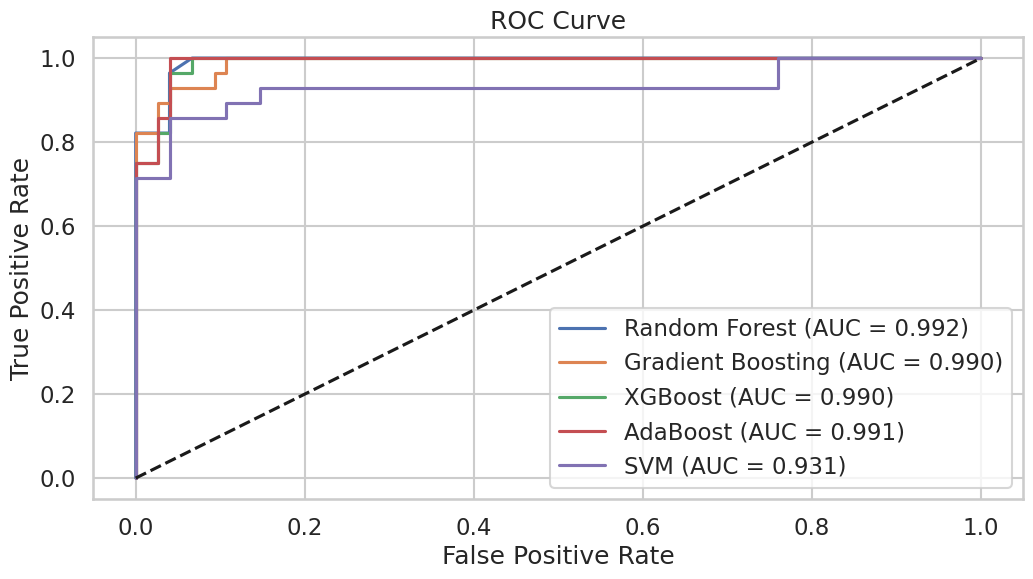

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:47:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


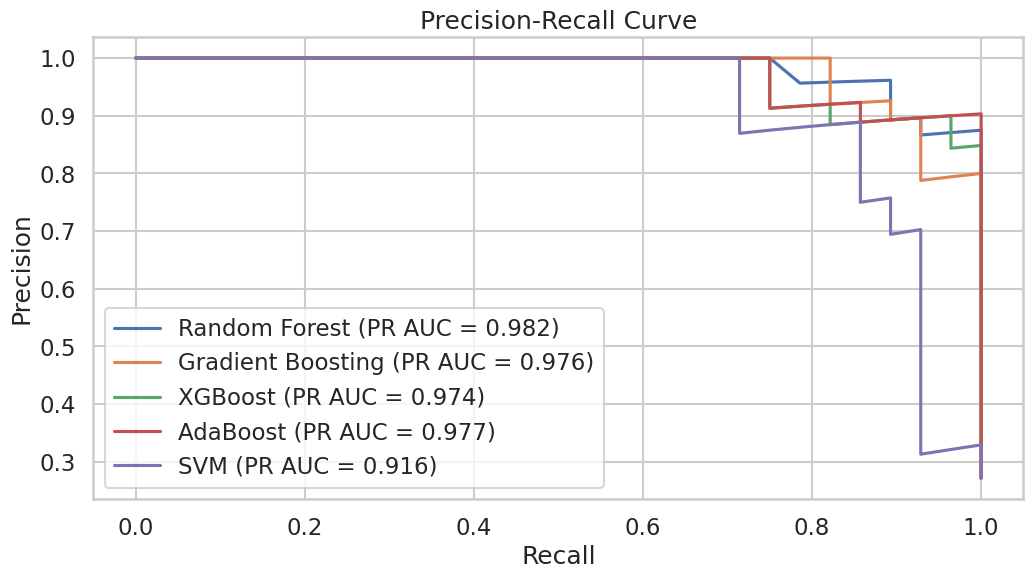

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, matthews_corrcoef, roc_auc_score,
    average_precision_score, precision_recall_curve, roc_curve,
    recall_score, f1_score
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Define classifiers with random_state=None as requested
base_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=None),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=None),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=None),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=None),
    'SVM': SVC(probability=True, random_state=None),
}

# --- Load the test data ---
# Assuming these files were saved earlier in the notebook
try:
    X_test = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/X_test.csv')
    y_test = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/y_test.csv').squeeze()
    print("X_test and y_test loaded successfully.")
except FileNotFoundError:
    print("Error: X_test.csv or y_test.csv not found. Please ensure the previous steps that save these files have been run.")


# To store results (single run because train/test is fixed)
results = {model_name: {} for model_name in base_models}

# Ensure X_test and y_test are defined before proceeding with evaluation
if 'X_test' in locals() and 'y_test' in locals():
    for model_name, model in base_models.items():
        print(f"Training {model_name}...")
        # Use the X_train and y_train defined in the previous blocks
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()

        sensitivity = recall_score(y_test, y_pred)
        specificity = tn / (tn + fp)
        mcc = matthews_corrcoef(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)
        pr_auc = average_precision_score(y_test, y_prob)
        f1 = f1_score(y_test, y_pred)

        # Save metrics
        results[model_name] = {
            'f1': f1,
            'roc_auc': roc_auc,
            'pr_auc': pr_auc,
            'sensitivity': sensitivity,
            'specificity': specificity,
            'mcc': mcc,
            'confusion_matrix': cm
        }

    # Plot comparison metrics as bar charts (since single run)
    metric_names = ['f1', 'roc_auc', 'pr_auc', 'sensitivity', 'specificity', 'mcc']

    for metric in metric_names:
        plt.figure(figsize=(10, 6))
        metric_vals = [results[model][metric] for model in base_models]
        sns.barplot(x=list(base_models.keys()), y=metric_vals)
        plt.title(f'Model Comparison - {metric.upper()}')
        plt.ylabel(metric.upper())
        plt.xticks(rotation=45)
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.show()

    # Plot ROC curves
    plt.figure(figsize=(12, 6))
    for model_name, model in base_models.items():
        # Retrain on full data for consistent plotting using the same test set
        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Plot Precision-Recall curves
    plt.figure(figsize=(12, 6))
    for model_name, model in base_models.items():
        # Retrain on full data for consistent plotting using the same test set
        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = average_precision_score(y_test, y_prob)
        plt.plot(recall, precision, label=f"{model_name} (PR AUC = {pr_auc:.3f})")

    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

    # Plot confusion matrices
    n_rows = (len(base_models) + 1) // 2
    n_cols = 2
    plt.figure(figsize=(12, n_rows * 4))

    for i, (model_name, model) in enumerate(base_models.items(), 1):
         # Ensure the confusion matrix from the evaluation step is used
        cm = results[model_name]['confusion_matrix']
        plt.subplot(n_rows, n_cols, i)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Pred: 0', 'Pred: 1'],
                    yticklabels=['True: 0', 'True: 1'])
        plt.title(f'{model_name} - Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')

    plt.tight_layout()
    plt.show()
else:
    print("Skipping evaluation plots because X_test or y_test were not loaded.")

Replicate running 3 time, use randon_status=None , mean random spliting data loop

Training Random Forest...
Random Forest - Train F1: 1.000, Test F1: 0.863
Training Gradient Boosting...
Gradient Boosting - Train F1: 1.000, Test F1: 0.909
Training AdaBoost...
AdaBoost - Train F1: 1.000, Test F1: 0.846


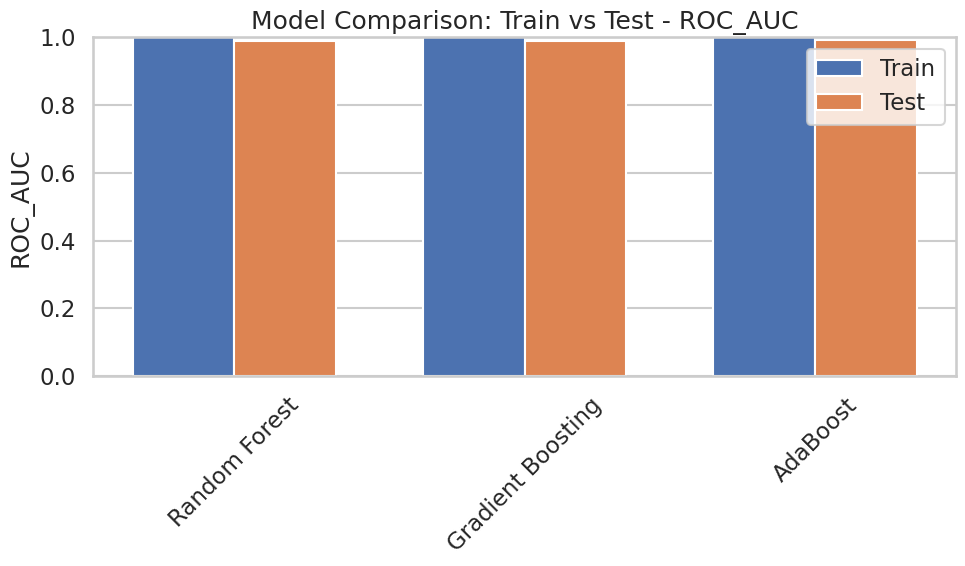

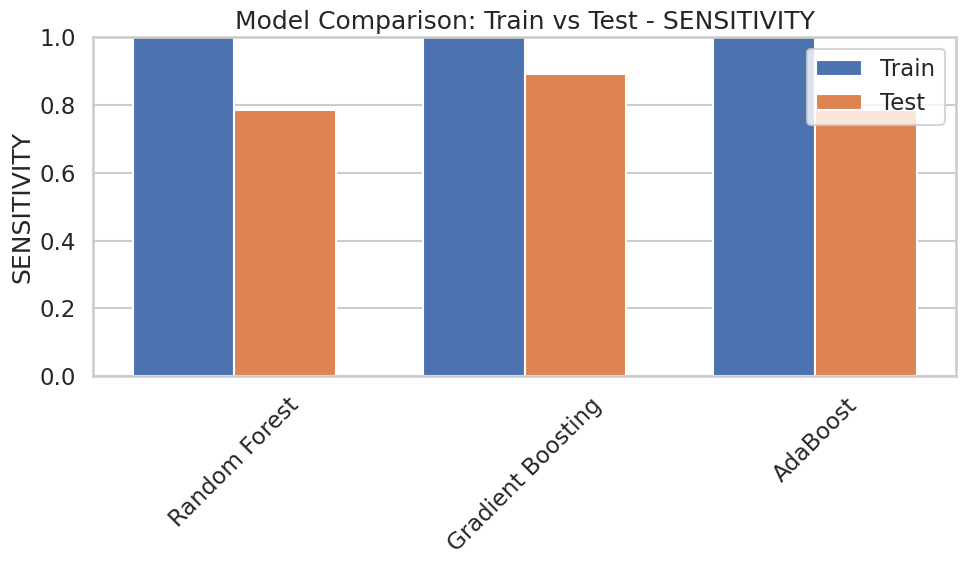

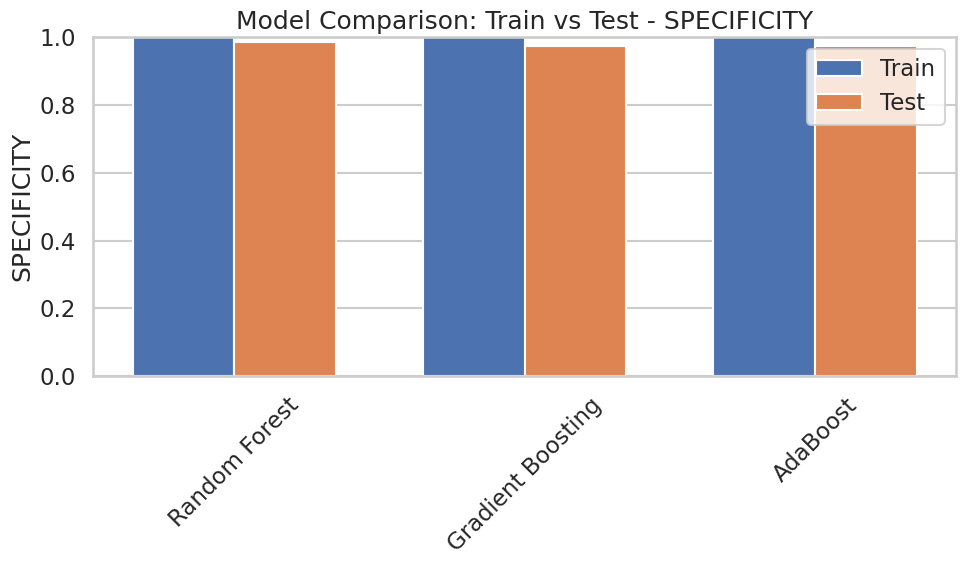

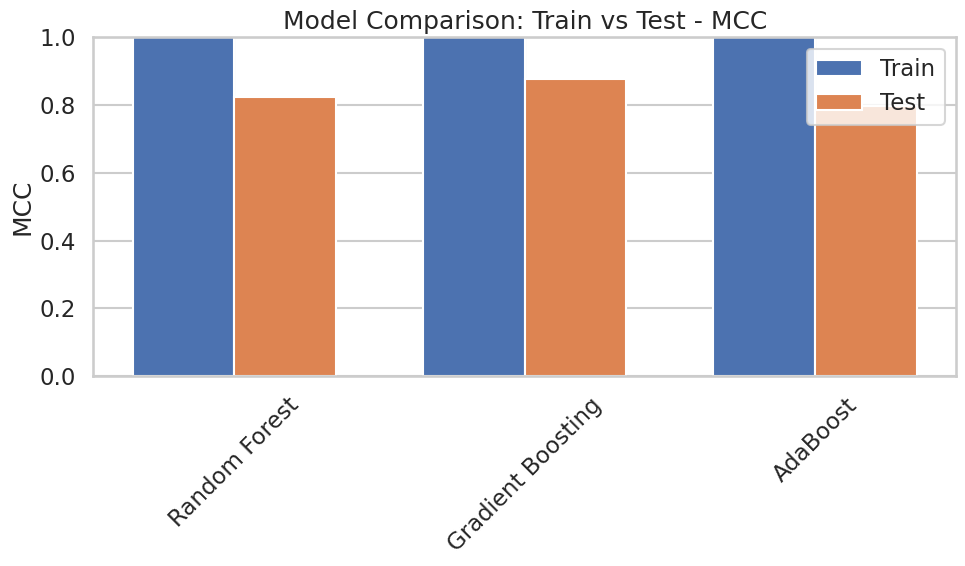

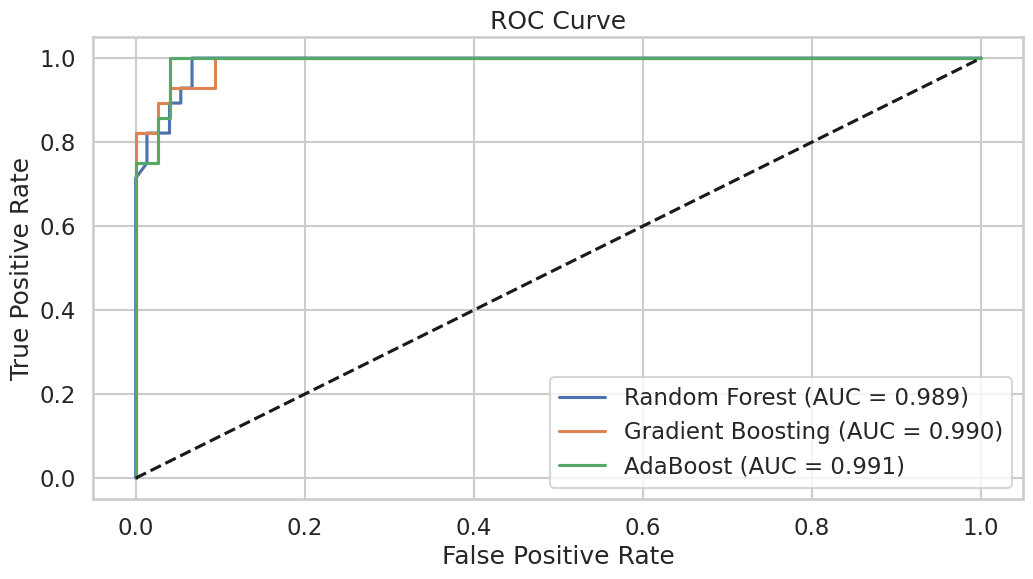

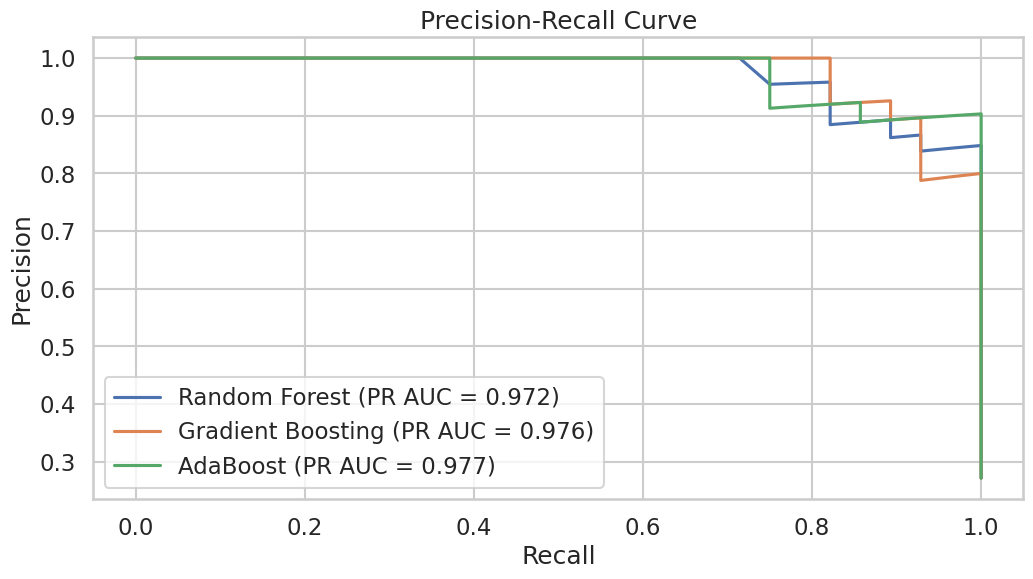

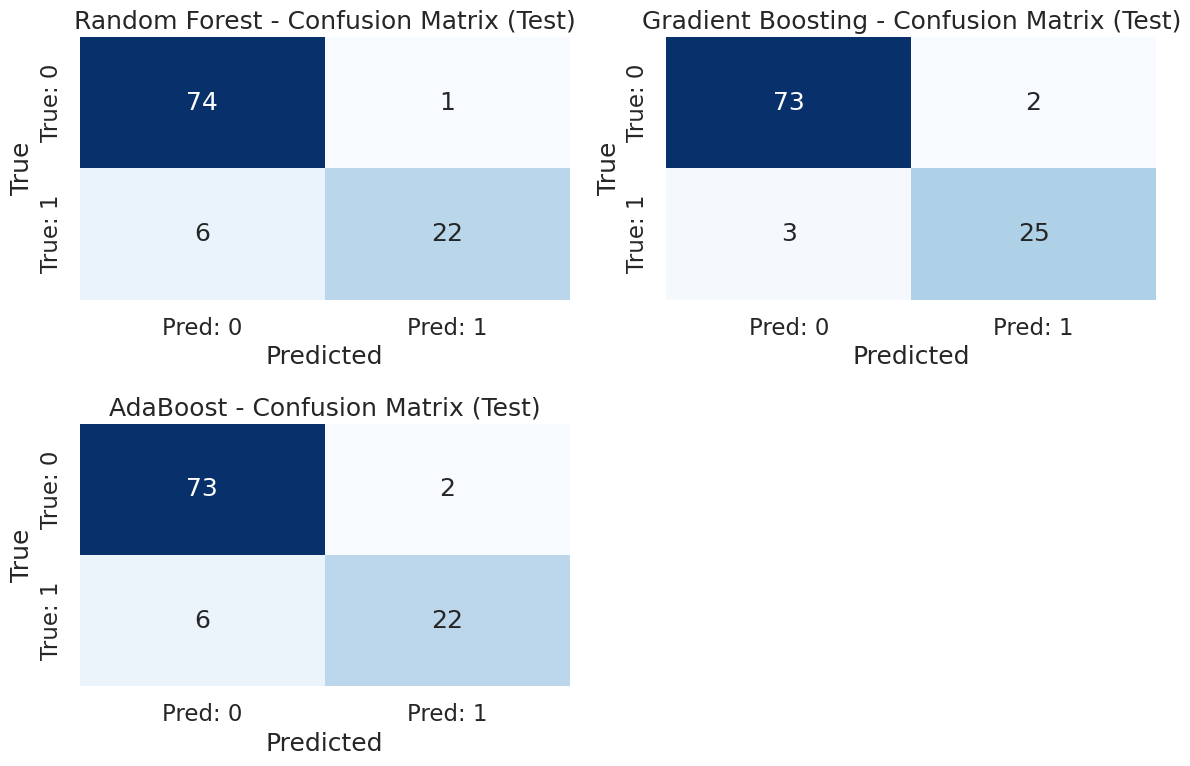

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, matthews_corrcoef, roc_auc_score,
    average_precision_score, precision_recall_curve, roc_curve,
    recall_score, f1_score
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Assume X_train, y_train, X_test, y_test are already defined

base_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=None),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=None),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=None),
}

def calculate_metrics(y_true, y_pred, y_prob):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = recall_score(y_true, y_pred)
    specificity = tn / (tn + fp)
    mcc = matthews_corrcoef(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    pr_auc = average_precision_score(y_true, y_prob)
    f1 = f1_score(y_true, y_pred)
    return {
        'f1': f1,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'mcc': mcc,
        'confusion_matrix': cm
    }

results = {}

for model_name, model in base_models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]
    train_metrics = calculate_metrics(y_train, y_train_pred, y_train_prob)

    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]
    test_metrics = calculate_metrics(y_test, y_test_pred, y_test_prob)

    results[model_name] = {
        'train': train_metrics,
        'test': test_metrics
    }

    print(f"{model_name} - Train F1: {train_metrics['f1']:.3f}, Test F1: {test_metrics['f1']:.3f}")

# Plot train vs test metrics bar charts
metrics = ['f1', 'roc_auc', 'pr_auc', 'sensitivity', 'specificity', 'mcc']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    train_vals = [results[m]['train'][metric] for m in base_models]
    test_vals = [results[m]['test'][metric] for m in base_models]

    x = np.arange(len(base_models))
    width = 0.35

    plt.bar(x - width/2, train_vals, width, label='Train')
    plt.bar(x + width/2, test_vals, width, label='Test')

    plt.ylabel(metric.upper())
    plt.title(f'Model Comparison: Train vs Test - {metric.upper()}')
    plt.xticks(x, list(base_models.keys()), rotation=45)
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot ROC curves
plt.figure(figsize=(12, 6))
for model_name, model in base_models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(12, 6))
for model_name, model in base_models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{model_name} (PR AUC = {pr_auc:.3f})")

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Plot confusion matrices for test set
n_rows = 2
n_cols = 2
plt.figure(figsize=(12, n_rows * 4))

for i, (model_name, _) in enumerate(base_models.items(), 1):
    cm = results[model_name]['test']['confusion_matrix']
    plt.subplot(n_rows, n_cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: 0', 'Pred: 1'],
                yticklabels=['True: 0', 'True: 1'])
    plt.title(f'{model_name} - Confusion Matrix (Test)')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()


Training Random Forest...
Random Forest - Train F1: 1.000, Test F1: 0.902
Training Gradient Boosting...
Gradient Boosting - Train F1: 1.000, Test F1: 0.909
Training AdaBoost...
AdaBoost - Train F1: 1.000, Test F1: 0.846
Training SVM...
SVM - Train F1: 0.000, Test F1: 0.000
Training XGBoost...
XGBoost - Train F1: 1.000, Test F1: 0.893


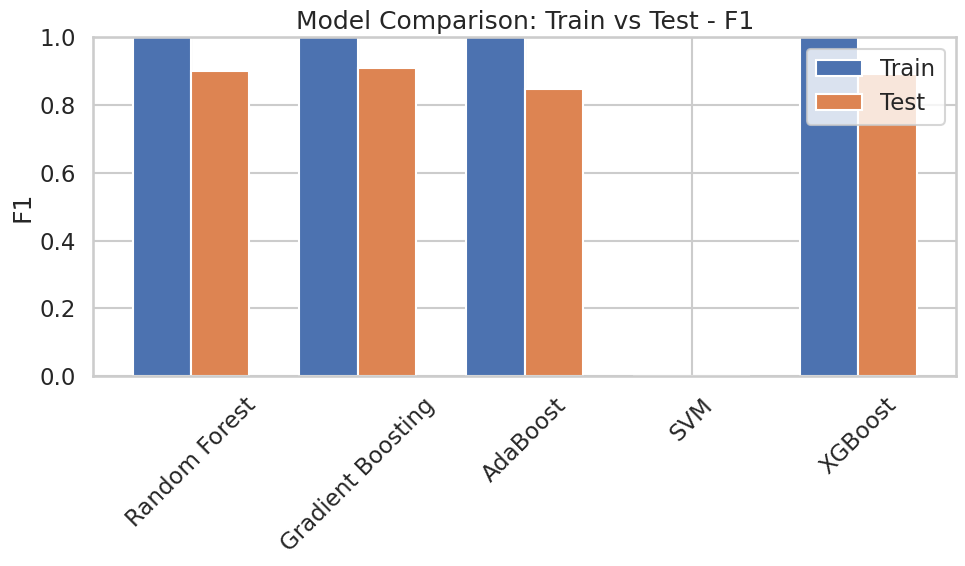

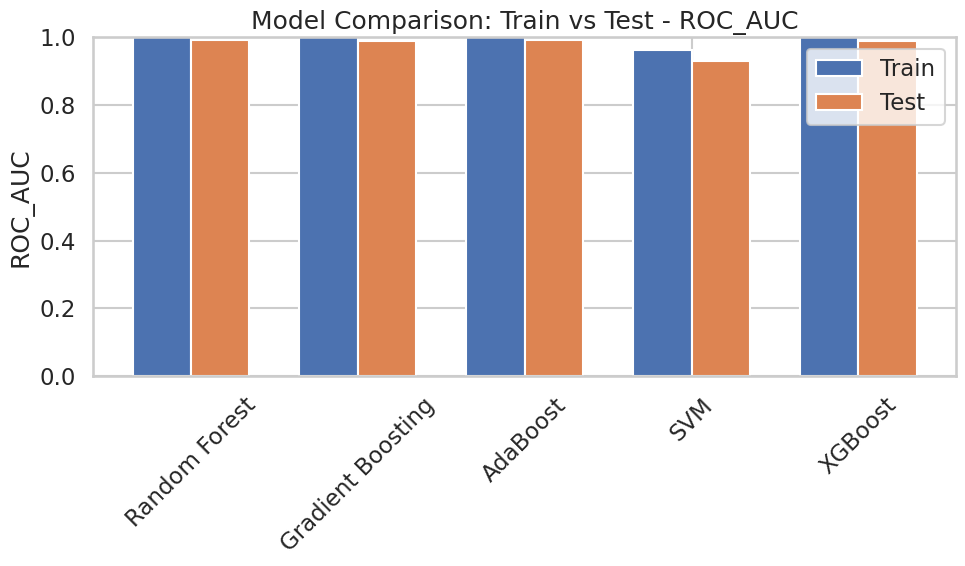

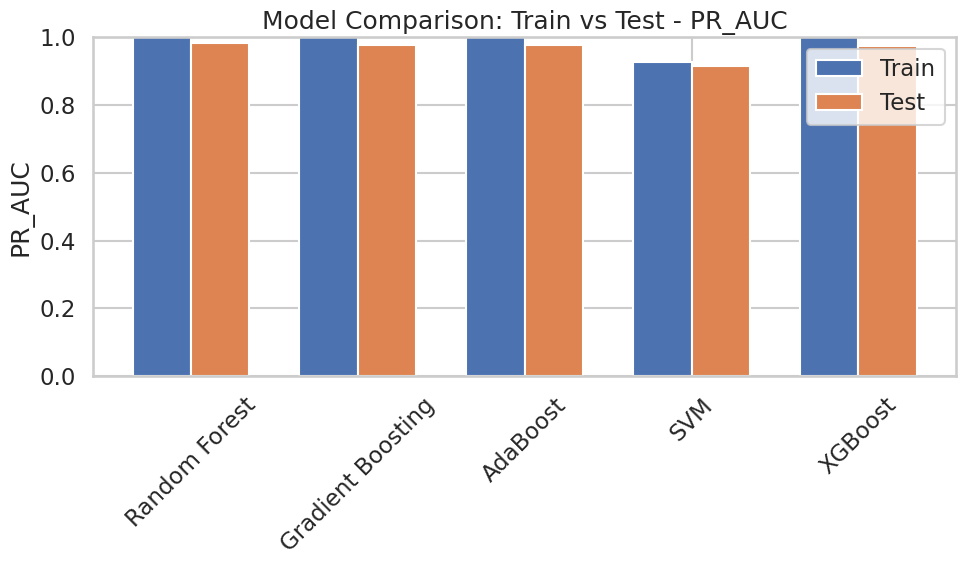

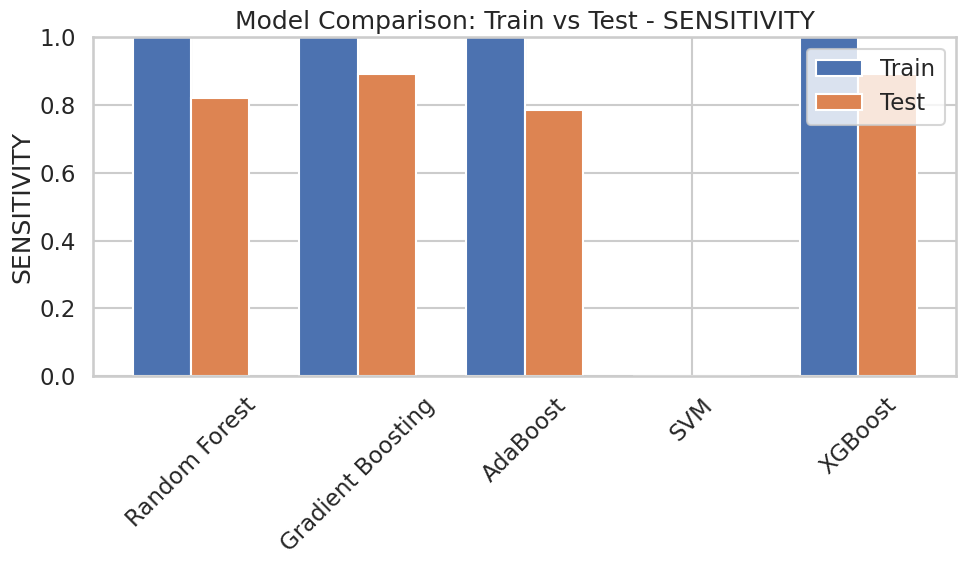

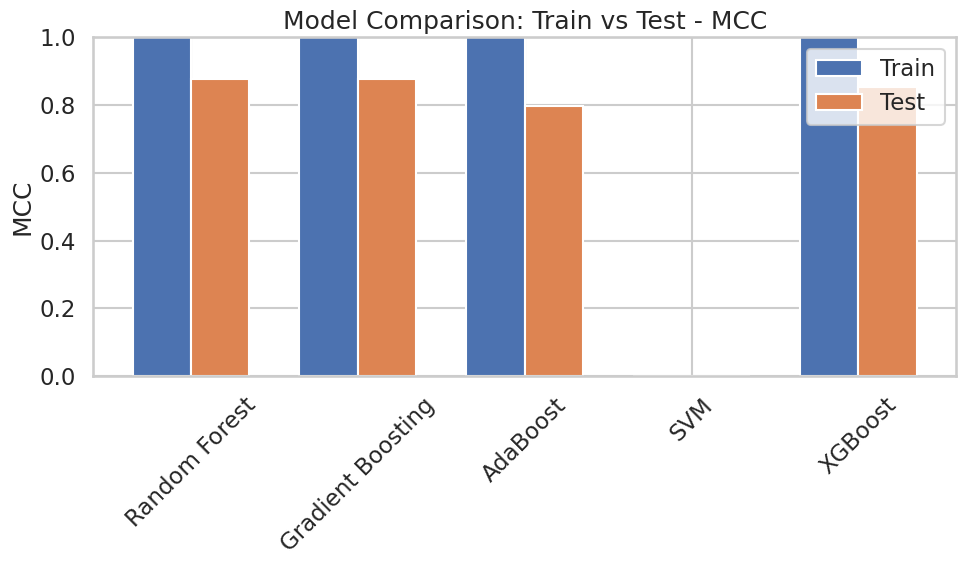

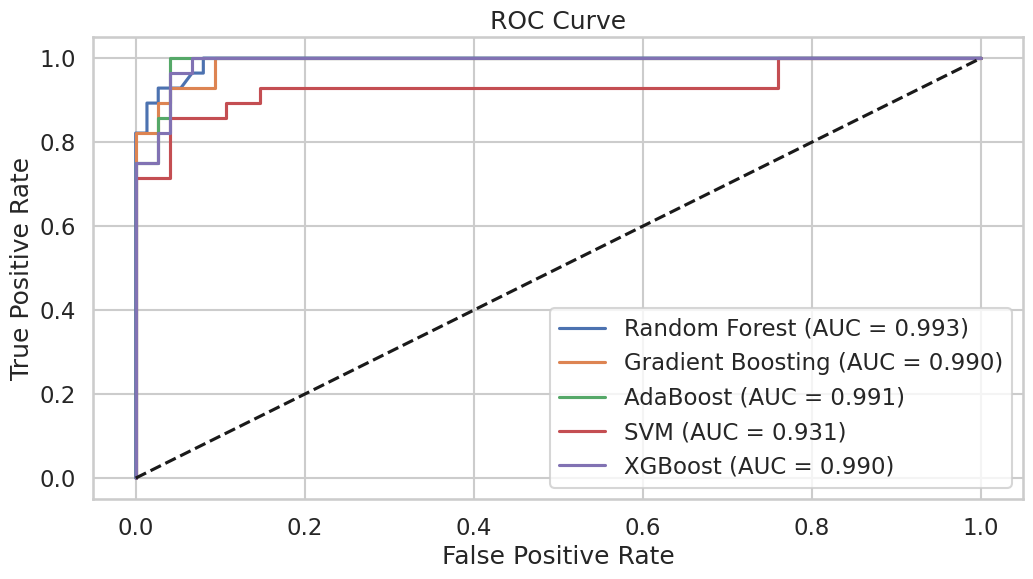

ValueError: num must be an integer with 1 <= num <= 4, not 5

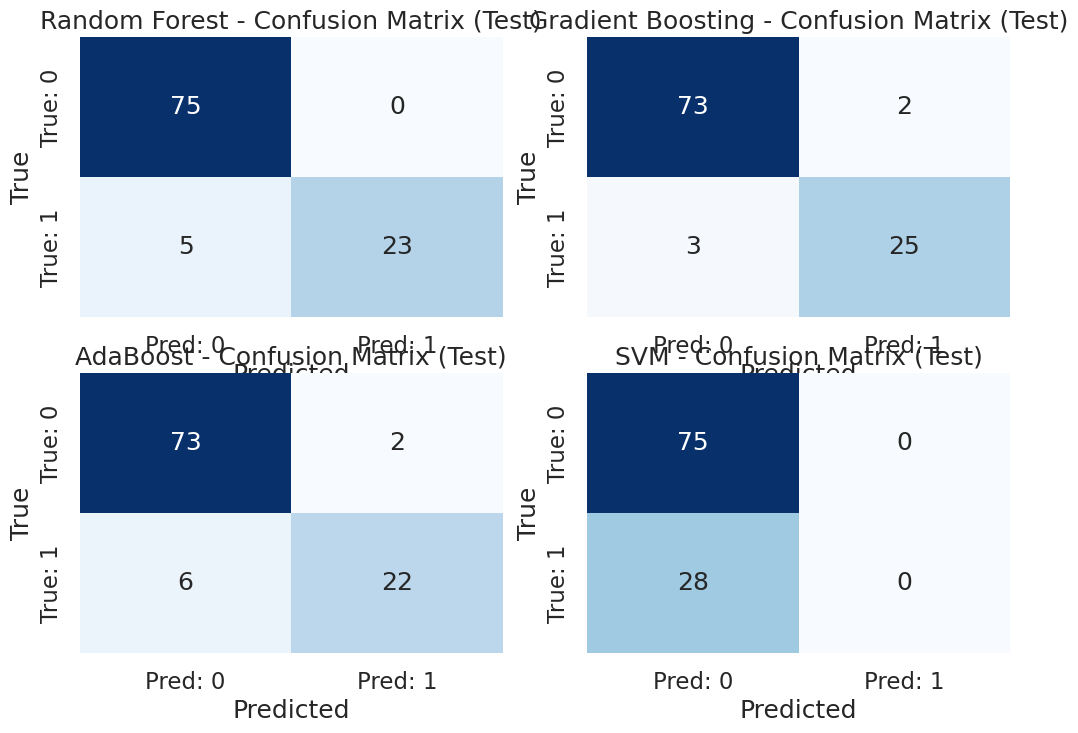

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, matthews_corrcoef, roc_auc_score,
    average_precision_score, precision_recall_curve, roc_curve,
    recall_score, f1_score
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Assume X_train, y_train, X_test, y_test are already defined

base_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=None),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=None),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=None),
    'SVM': SVC(probability=True, random_state=None),  # SVM model with probability estimates
    'XGBoost': XGBClassifier(n_estimators=100, random_state=None)
}

def calculate_metrics(y_true, y_pred, y_prob):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = recall_score(y_true, y_pred)
    specificity = tn / (tn + fp)
    mcc = matthews_corrcoef(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    pr_auc = average_precision_score(y_true, y_prob)
    f1 = f1_score(y_true, y_pred)
    return {
        'f1': f1,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'mcc': mcc,
        'confusion_matrix': cm
    }

results = {}

for model_name, model in base_models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_train)
    train_metrics = calculate_metrics(y_train, y_train_pred, y_train_prob)

    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    test_metrics = calculate_metrics(y_test, y_test_pred, y_test_prob)

    results[model_name] = {
        'train': train_metrics,
        'test': test_metrics
    }

    print(f"{model_name} - Train F1: {train_metrics['f1']:.3f}, Test F1: {test_metrics['f1']:.3f}")

# Plot train vs test metrics bar charts
metrics = ['f1', 'roc_auc', 'pr_auc', 'sensitivity', 'specificity', 'mcc']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    train_vals = [results[m]['train'][metric] for m in base_models]
    test_vals = [results[m]['test'][metric] for m in base_models]

    x = np.arange(len(base_models))
    width = 0.35

    plt.bar(x - width/2, train_vals, width, label='Train')
    plt.bar(x + width/2, test_vals, width, label='Test')

    plt.ylabel(metric.upper())
    plt.title(f'Model Comparison: Train vs Test - {metric.upper()}')
    plt.xticks(x, list(base_models.keys()), rotation=45)
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot ROC curves
plt.figure(figsize=(12, 6))
for model_name, model in base_models.items():
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(12, 6))
for model_name, model in base_models.items():
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{model_name} (PR AUC = {pr_auc:.3f})")

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Plot confusion matrices for test set
n_rows = 2
n_cols = 2
plt.figure(figsize=(12, n_rows * 4))

for i, (model_name, _) in enumerate(base_models.items(), 1):
    cm = results[model_name]['test']['confusion_matrix']
    plt.subplot(n_rows, n_cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: 0', 'Pred: 1'],
                yticklabels=['True: 0', 'True: 1'])
    plt.title(f'{model_name} - Confusion Matrix (Test)')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()


Training Random Forest...
Random Forest - Train F1: 1.000, Test F1: 0.902
Training Gradient Boosting...
Gradient Boosting - Train F1: 1.000, Test F1: 0.909
Training AdaBoost...
AdaBoost - Train F1: 1.000, Test F1: 0.846
Training SVM...
SVM - Train F1: 0.000, Test F1: 0.000
Training XGBoost...
XGBoost - Train F1: 1.000, Test F1: 0.893


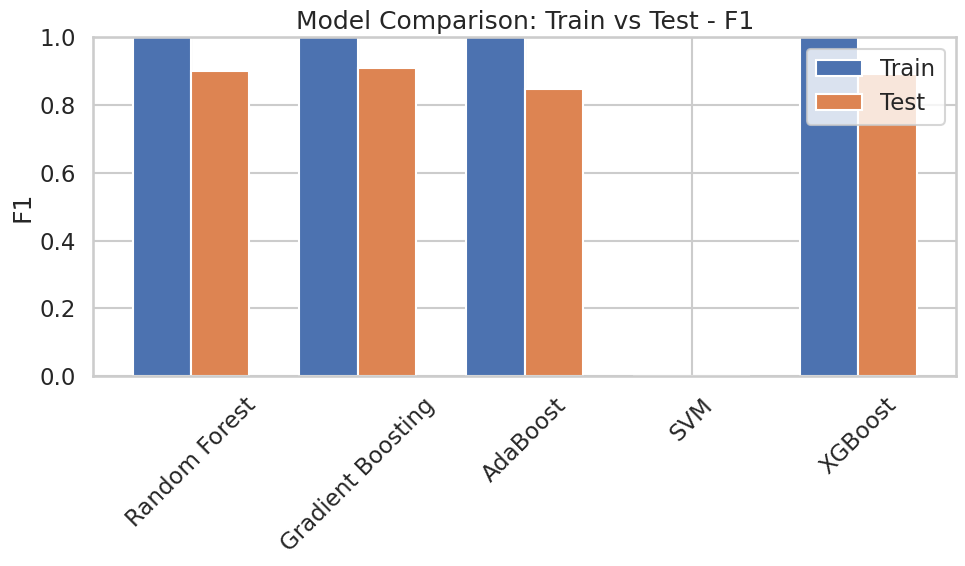

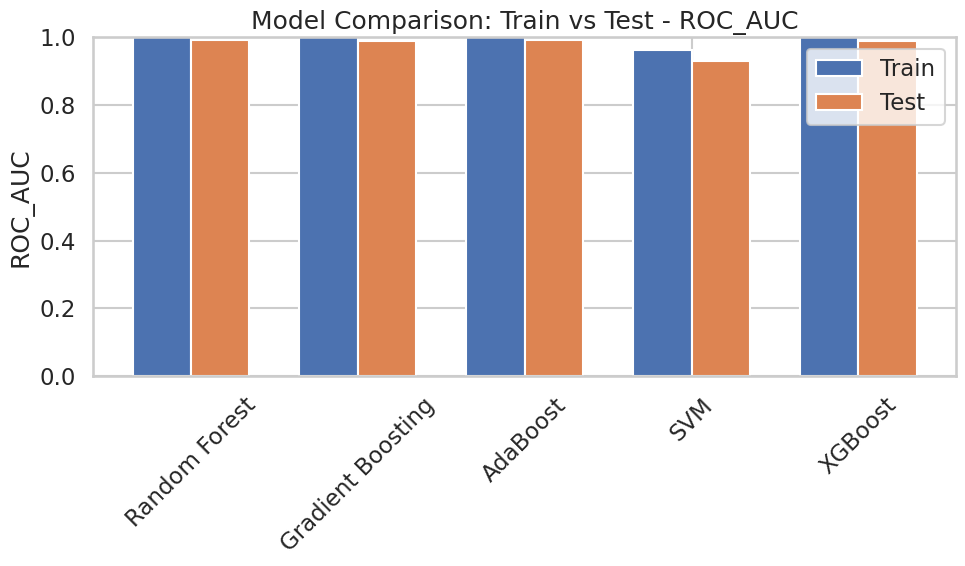

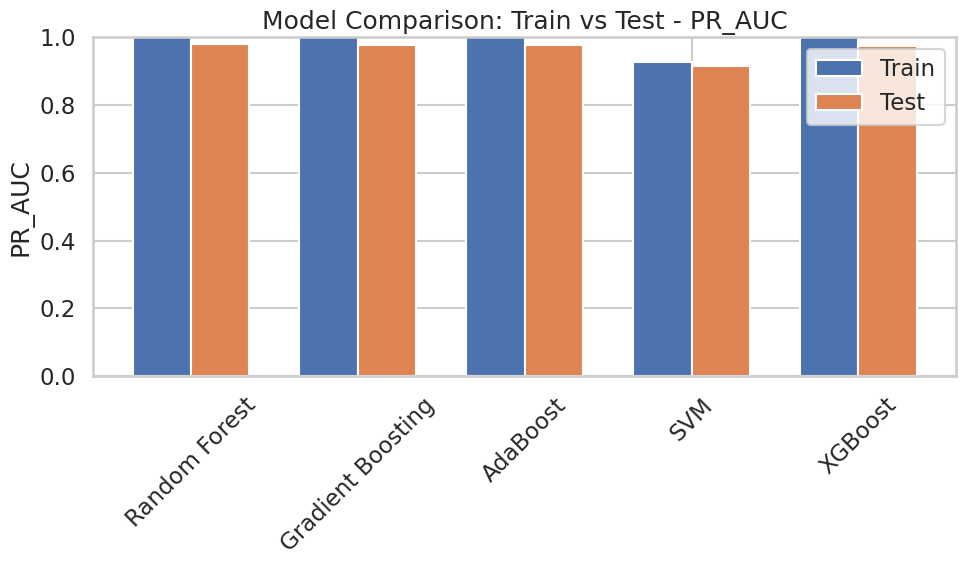

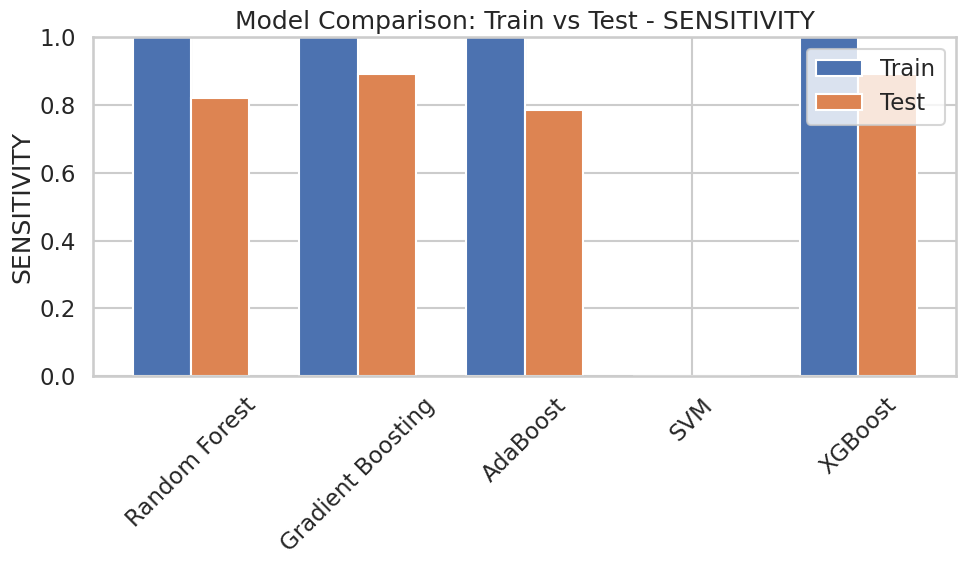

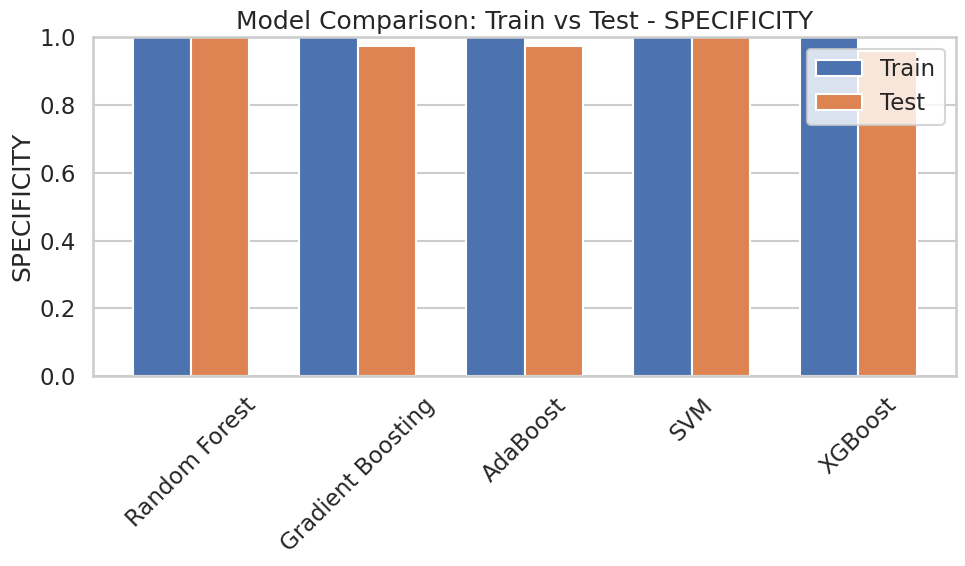

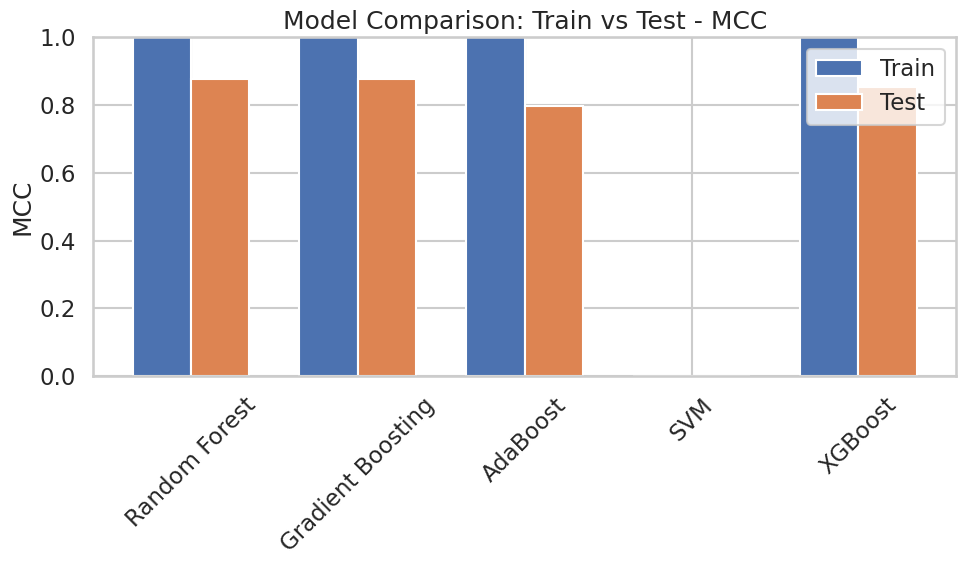

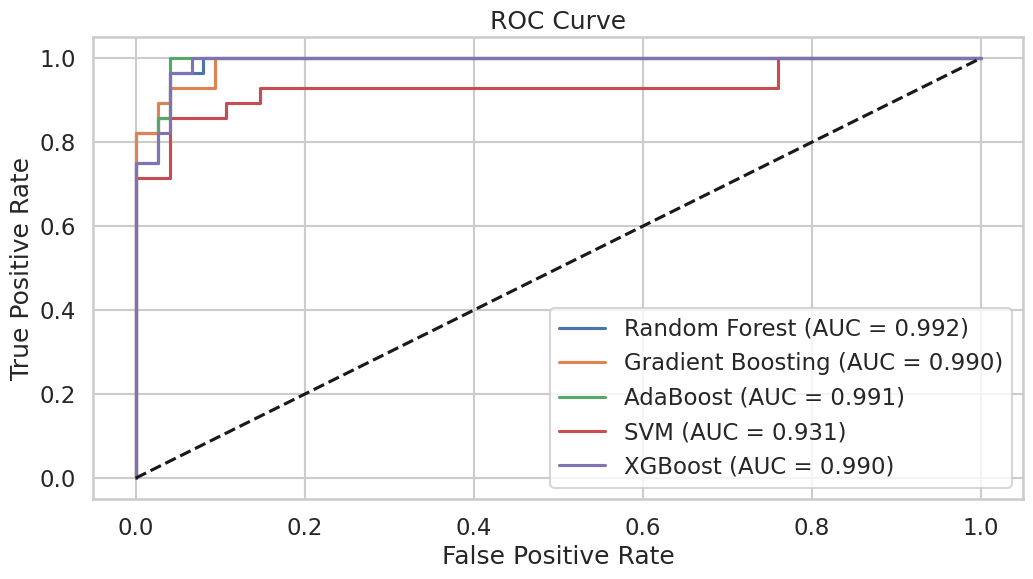

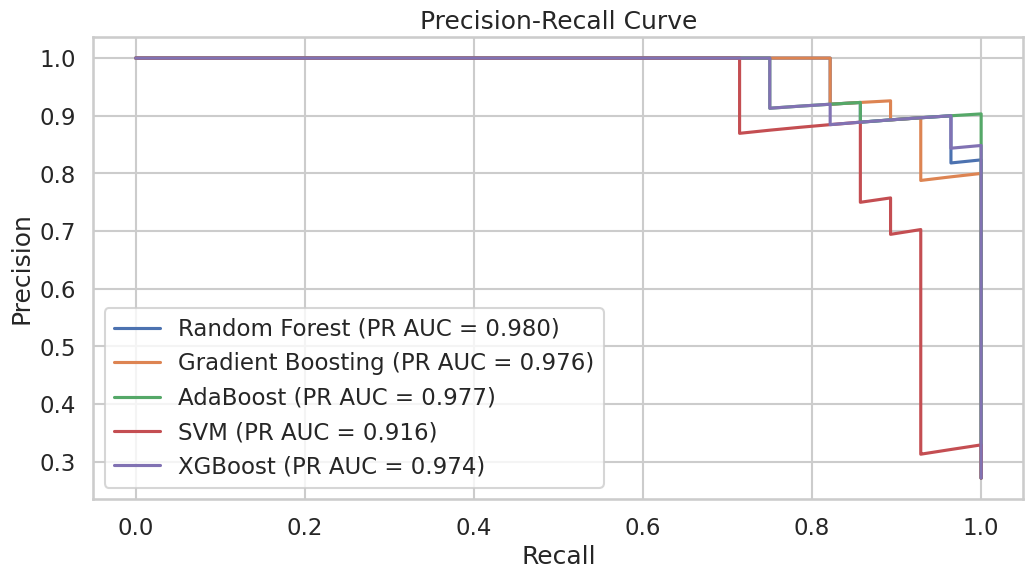

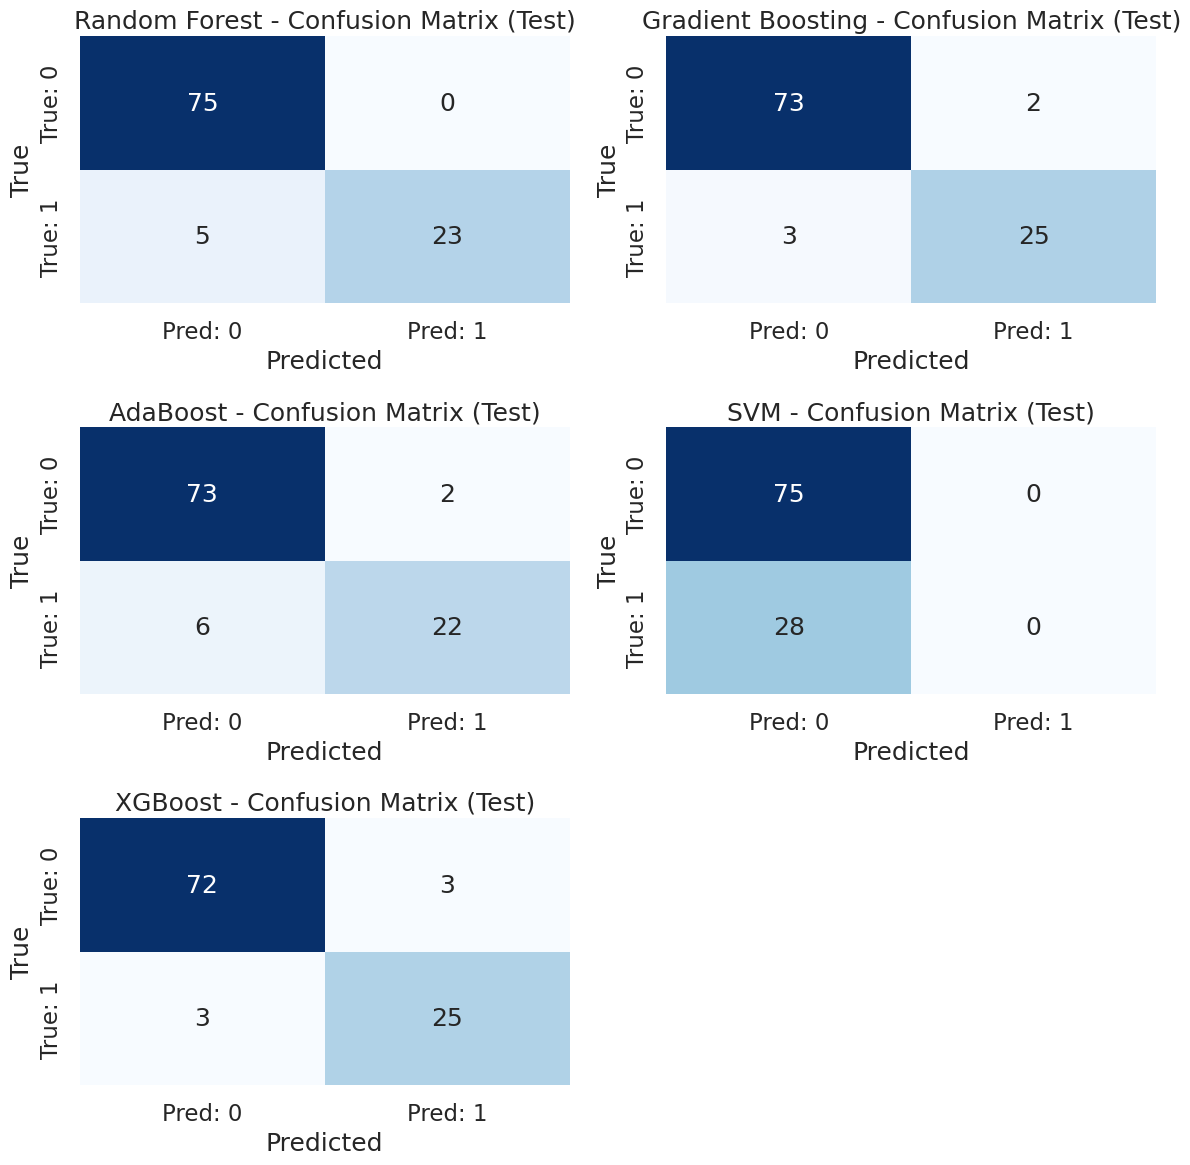

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, matthews_corrcoef, roc_auc_score,
    average_precision_score, precision_recall_curve, roc_curve,
    recall_score, f1_score
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Assume X_train, y_train, X_test, y_test are already defined

base_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=None),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=None),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=None),
    'SVM': SVC(probability=True, random_state=None),  # SVM model with probability estimates
    'XGBoost': XGBClassifier(n_estimators=100, random_state=None)
}

def calculate_metrics(y_true, y_pred, y_prob):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    # Handle the case where tn + fp is zero to avoid division by zero for specificity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    sensitivity = recall_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    pr_auc = average_precision_score(y_true, y_prob)
    f1 = f1_score(y_true, y_pred)
    return {
        'f1': f1,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'mcc': mcc,
        'confusion_matrix': cm
    }

results = {}

for model_name, model in base_models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    # Check if predict_proba exists, otherwise use decision_function (for SVM)
    y_train_prob = model.predict_proba(X_train)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_train)
    train_metrics = calculate_metrics(y_train, y_train_pred, y_train_prob)

    y_test_pred = model.predict(X_test)
    # Check if predict_proba exists, otherwise use decision_function (for SVM)
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    test_metrics = calculate_metrics(y_test, y_test_pred, y_test_prob)

    results[model_name] = {
        'train': train_metrics,
        'test': test_metrics
    }

    print(f"{model_name} - Train F1: {train_metrics['f1']:.3f}, Test F1: {test_metrics['f1']:.3f}")

# Plot train vs test metrics bar charts
metrics = ['f1', 'roc_auc', 'pr_auc', 'sensitivity', 'specificity', 'mcc']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    train_vals = [results[m]['train'][metric] for m in base_models]
    test_vals = [results[m]['test'][metric] for m in base_models]

    x = np.arange(len(base_models))
    width = 0.35

    plt.bar(x - width/2, train_vals, width, label='Train')
    plt.bar(x + width/2, test_vals, width, label='Test')

    plt.ylabel(metric.upper())
    plt.title(f'Model Comparison: Train vs Test - {metric.upper()}')
    plt.xticks(x, list(base_models.keys()), rotation=45)
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot ROC curves
plt.figure(figsize=(12, 6))
for model_name, model in base_models.items():
    # Need to handle SVM case for probability estimates
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
    else: # For models like SVC with probability=False or decision_function
         # SVC with probability=True has predict_proba, but adding a fallback
         # for robustness. decision_function output needs scaling/transformation
         # to be used as 'probability', but roc_curve and pr_curve can handle it directly
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(12, 6))
for model_name, model in base_models.items():
    # Need to handle SVM case for probability estimates
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{model_name} (PR AUC = {pr_auc:.3f})")

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Plot confusion matrices for test set
num_models = len(base_models)
# Calculate number of rows needed based on number of models and columns
n_cols = 2
n_rows = (num_models + n_cols - 1) // n_cols # Ceiling division
plt.figure(figsize=(12, n_rows * 4))

for i, (model_name, _) in enumerate(base_models.items(), 1):
    cm = results[model_name]['test']['confusion_matrix']
    plt.subplot(n_rows, n_cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: 0', 'Pred: 1'],
                yticklabels=['True: 0', 'True: 1'])
    plt.title(f'{model_name} - Confusion Matrix (Test)')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

Training Random Forest...
Random Forest - Train F1: 1.000, Test F1: 0.880
Training Gradient Boosting...
Gradient Boosting - Train F1: 1.000, Test F1: 0.909
Training AdaBoost...
AdaBoost - Train F1: 1.000, Test F1: 0.846
Training SVM...
SVM - Train F1: 0.000, Test F1: 0.000
Training XGBoost...
XGBoost - Train F1: 1.000, Test F1: 0.893


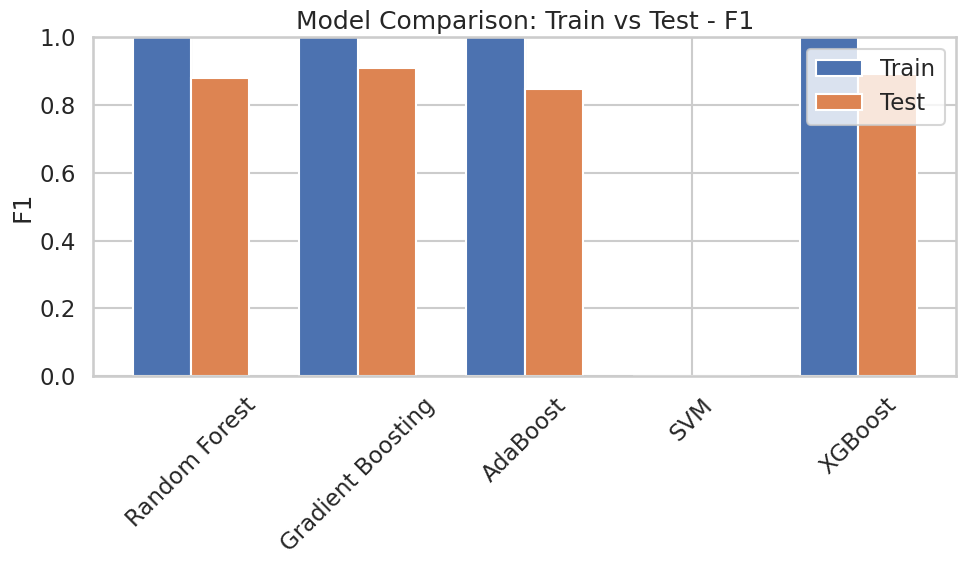

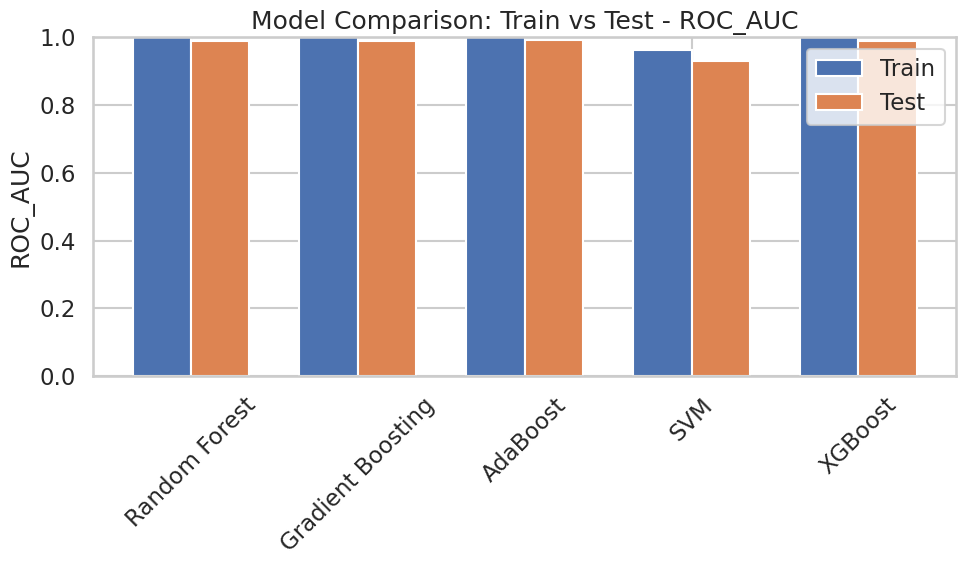

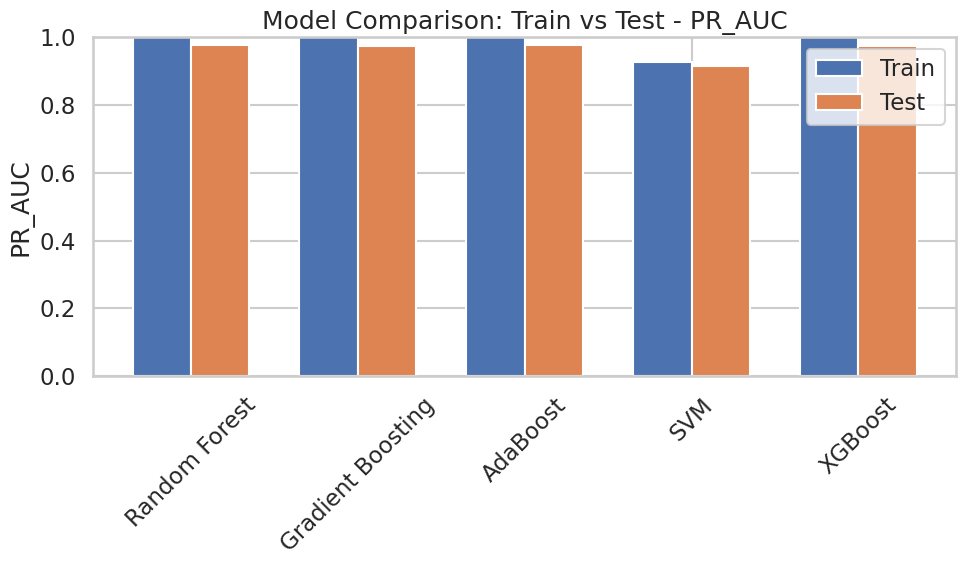

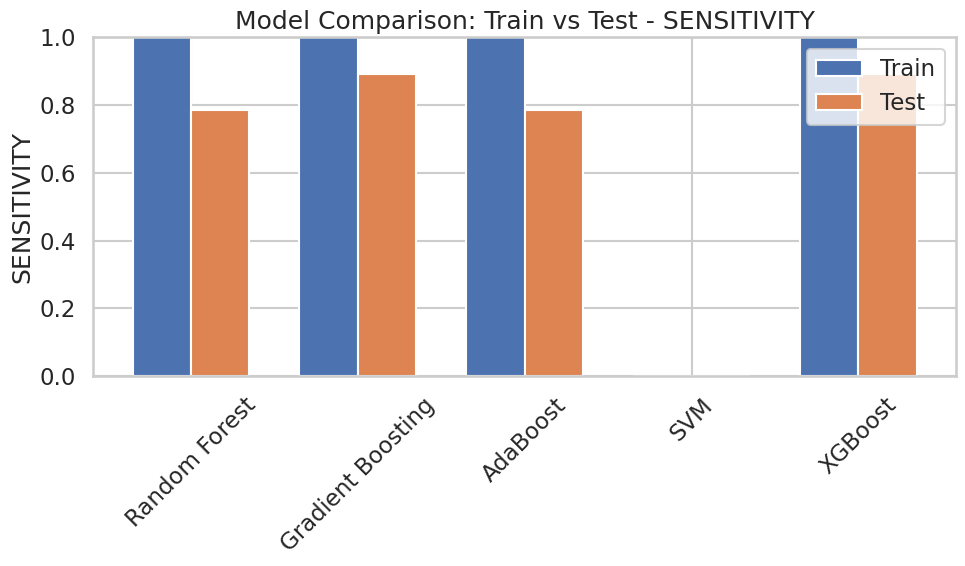

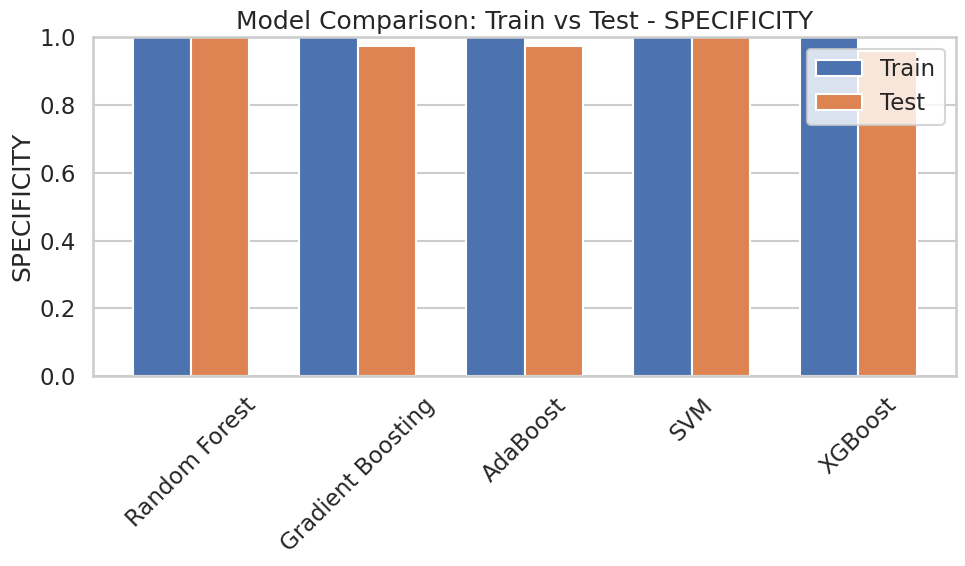

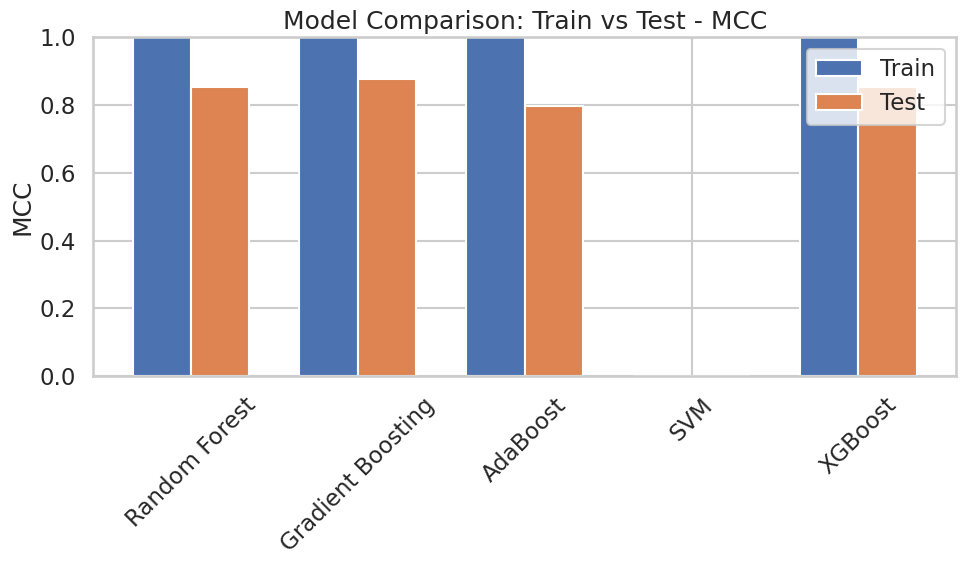

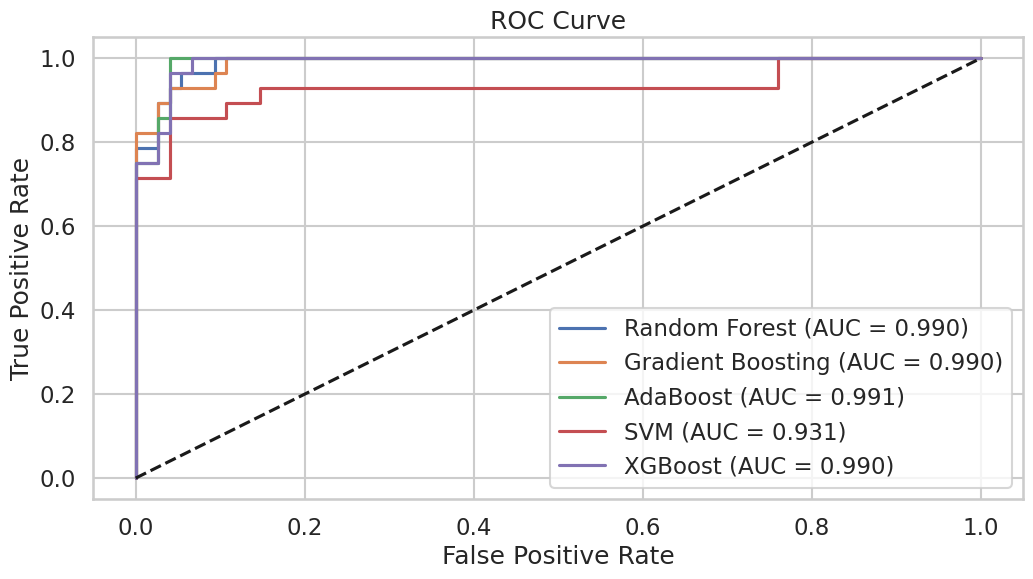

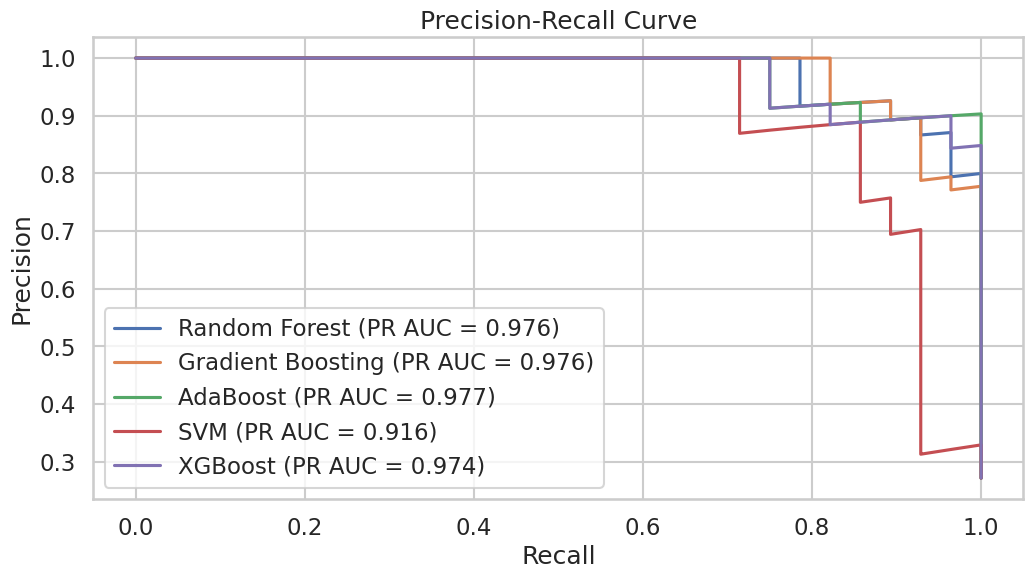

ValueError: num must be an integer with 1 <= num <= 4, not 5

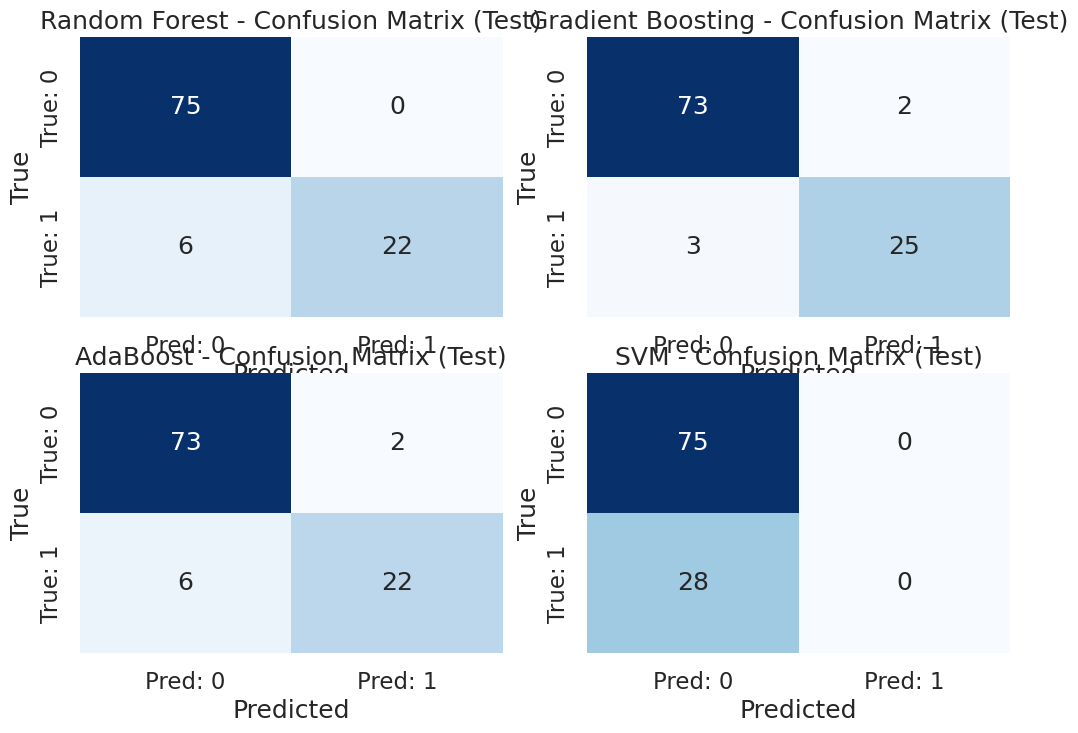

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, matthews_corrcoef, roc_auc_score,
    average_precision_score, precision_recall_curve, roc_curve,
    recall_score, f1_score
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Assume X_train, y_train, X_test, y_test are already defined

base_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=None),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=None),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=None),
    'SVM': SVC(probability=True, random_state=None),  # SVM model with probability estimates
    'XGBoost': XGBClassifier(n_estimators=100, random_state=None)
}

def calculate_metrics(y_true, y_pred, y_prob):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = recall_score(y_true, y_pred)
    specificity = tn / (tn + fp)
    mcc = matthews_corrcoef(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    pr_auc = average_precision_score(y_true, y_prob)
    f1 = f1_score(y_true, y_pred)
    return {
        'f1': f1,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'mcc': mcc,
        'confusion_matrix': cm
    }

results = {}

# Training and calculating metrics for each model
for model_name, model in base_models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Train metrics
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_train)
    train_metrics = calculate_metrics(y_train, y_train_pred, y_train_prob)

    # Test metrics
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    test_metrics = calculate_metrics(y_test, y_test_pred, y_test_prob)

    results[model_name] = {
        'train': train_metrics,
        'test': test_metrics
    }

    print(f"{model_name} - Train F1: {train_metrics['f1']:.3f}, Test F1: {test_metrics['f1']:.3f}")

# Plot train vs test metrics bar charts
metrics = ['f1', 'roc_auc', 'pr_auc', 'sensitivity', 'specificity', 'mcc']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    train_vals = [results[m]['train'][metric] for m in base_models]
    test_vals = [results[m]['test'][metric] for m in base_models]

    x = np.arange(len(base_models))
    width = 0.35

    plt.bar(x - width/2, train_vals, width, label='Train')
    plt.bar(x + width/2, test_vals, width, label='Test')

    plt.ylabel(metric.upper())
    plt.title(f'Model Comparison: Train vs Test - {metric.upper()}')
    plt.xticks(x, list(base_models.keys()), rotation=45)
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot ROC curves
plt.figure(figsize=(12, 6))
for model_name, model in base_models.items():
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(12, 6))
for model_name, model in base_models.items():
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{model_name} (PR AUC = {pr_auc:.3f})")

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Plot confusion matrices for test set
n_rows = 2
n_cols = 2
plt.figure(figsize=(12, n_rows * 4))

for i, (model_name, _) in enumerate(base_models.items(), 1):
    cm = results[model_name]['test']['confusion_matrix']
    plt.subplot(n_rows, n_cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: 0', 'Pred: 1'],
                yticklabels=['True: 0', 'True: 1'])
    plt.title(f'{model_name} - Confusion Matrix (Test)')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()


Training Random Forest...
Random Forest - Train F1: 1.000, Test F1: 0.902
Training Gradient Boosting...
Gradient Boosting - Train F1: 1.000, Test F1: 0.909
Training AdaBoost...
AdaBoost - Train F1: 1.000, Test F1: 0.846
Training SVM...
SVM - Train F1: 0.000, Test F1: 0.000
Training XGBoost...
XGBoost - Train F1: 1.000, Test F1: 0.893


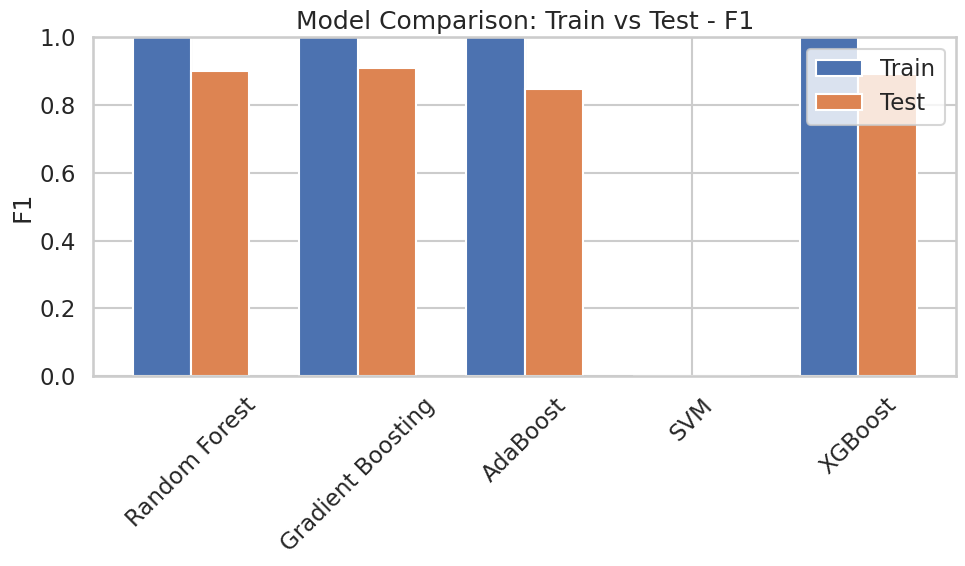

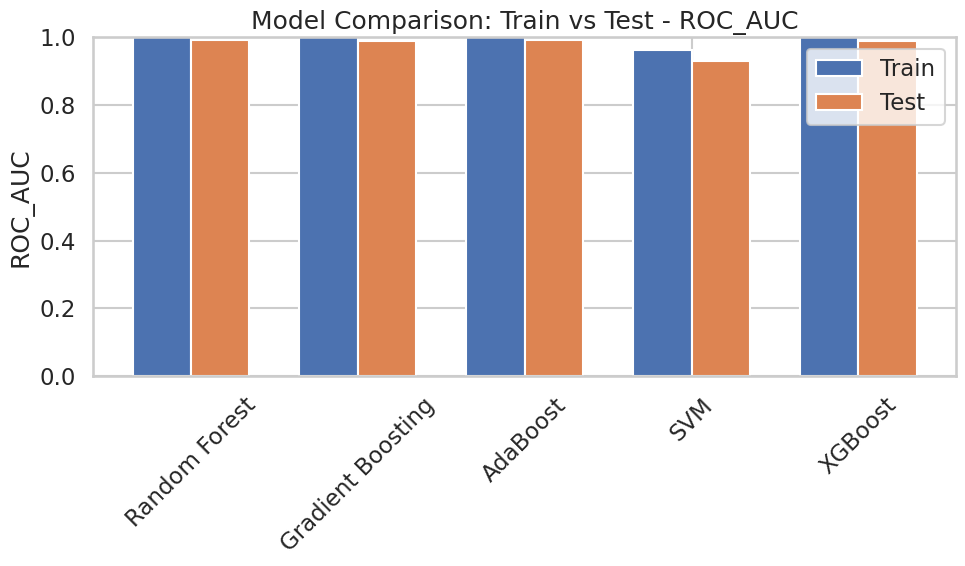

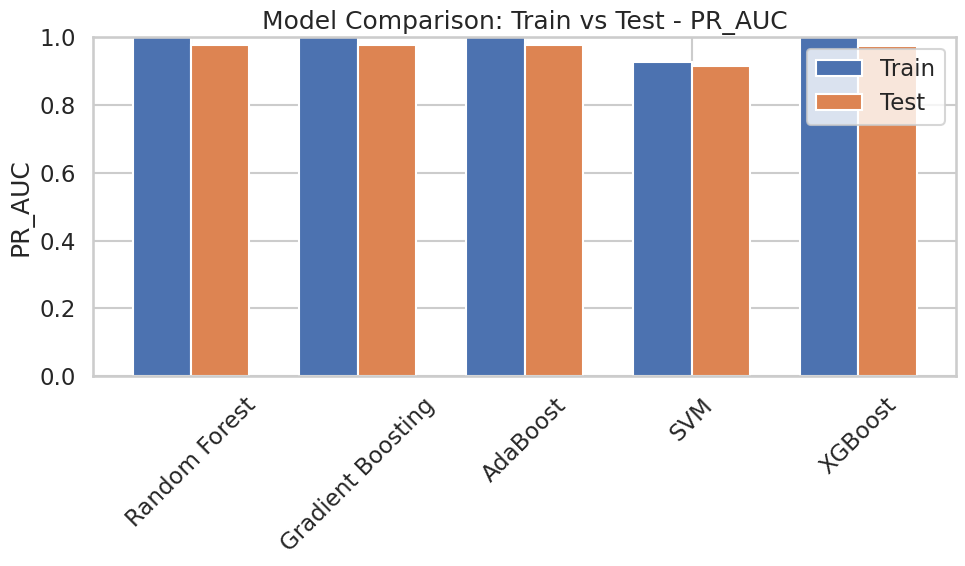

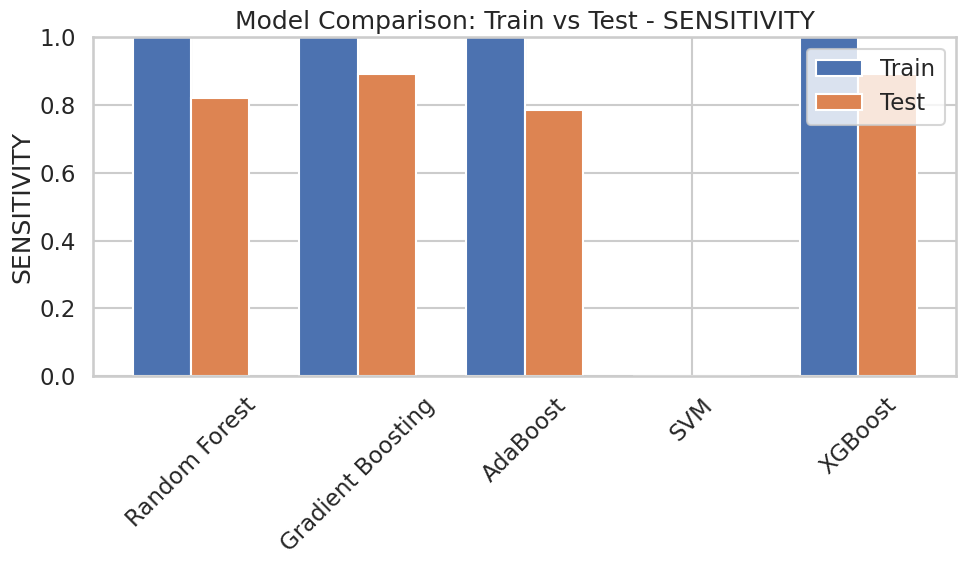

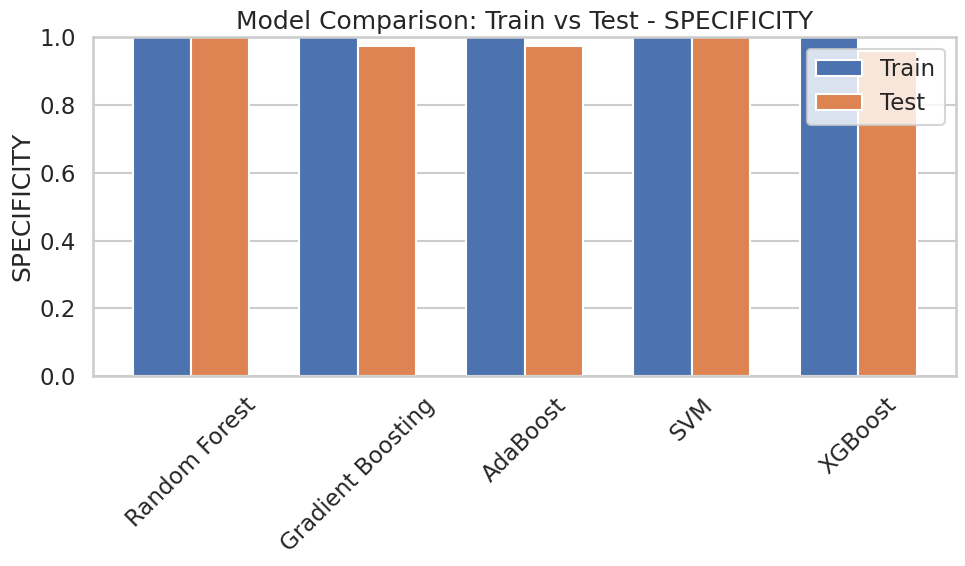

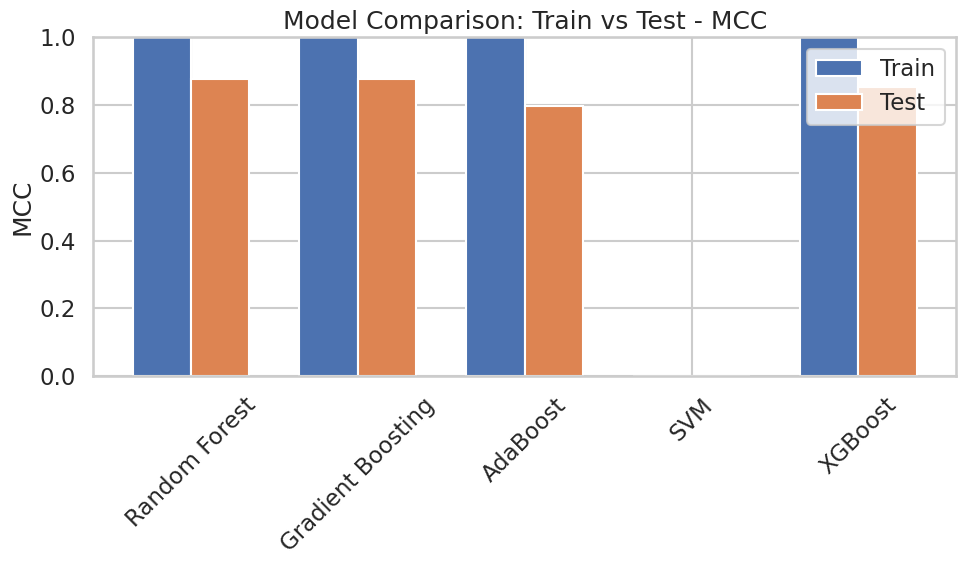

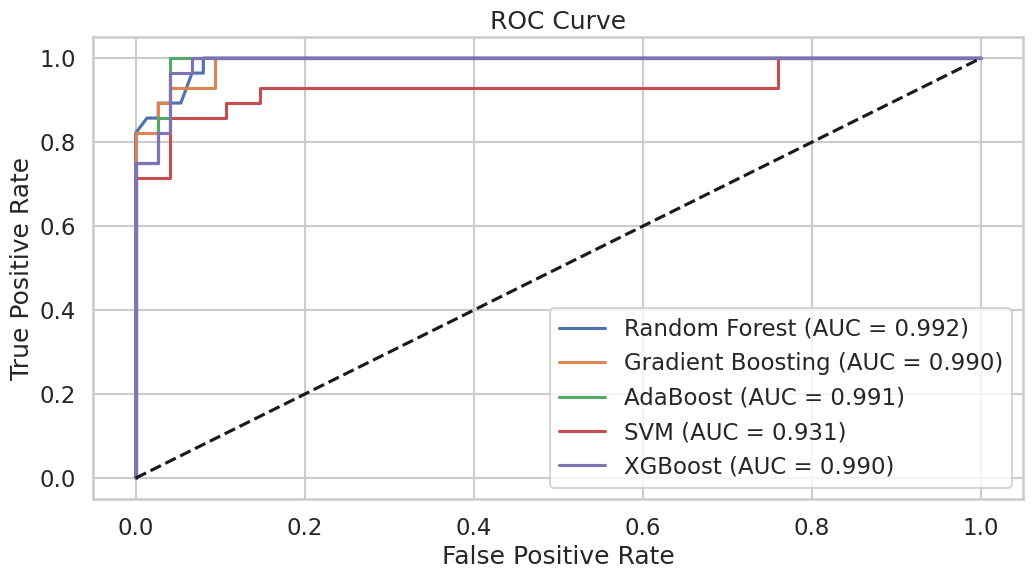

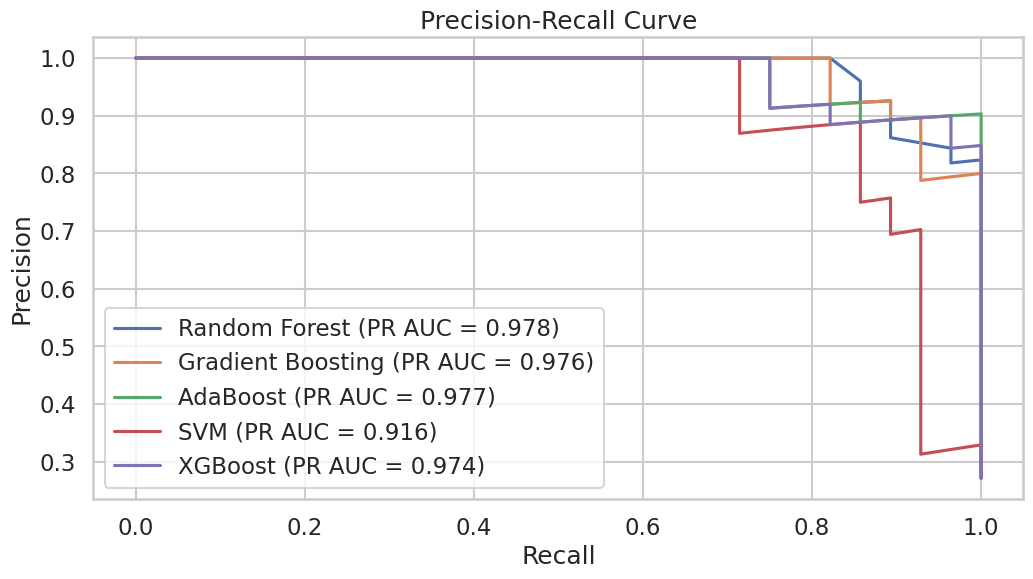

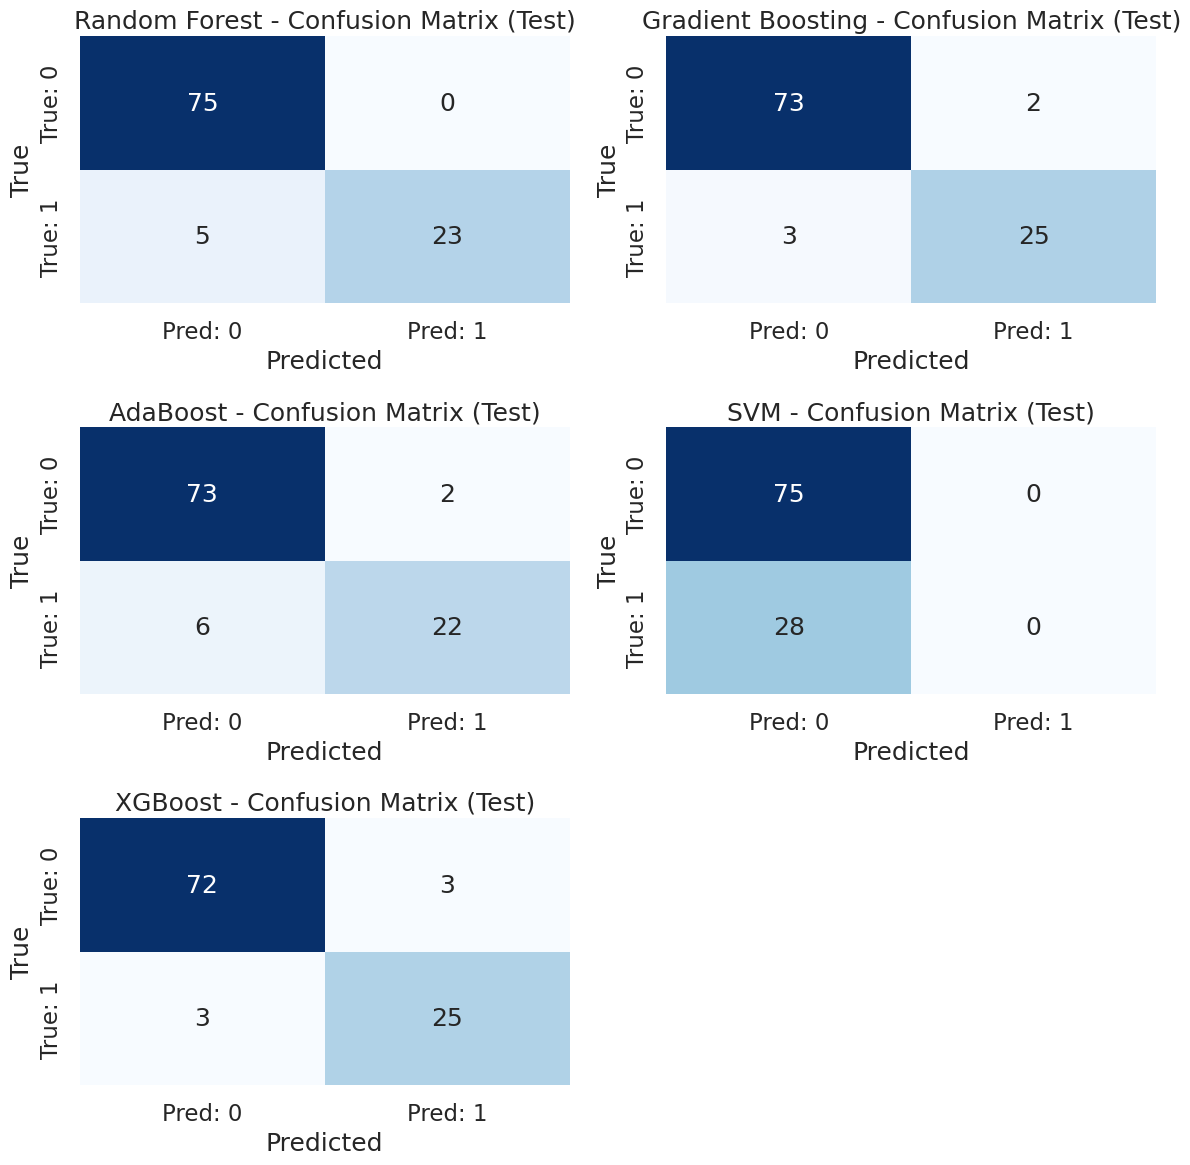

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, matthews_corrcoef, roc_auc_score,
    average_precision_score, precision_recall_curve, roc_curve,
    recall_score, f1_score
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Assume X_train, y_train, X_test, y_test are already defined

base_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=None),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=None),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=None),
    'SVM': SVC(probability=True, random_state=None),  # SVM model with probability estimates
    'XGBoost': XGBClassifier(n_estimators=100, random_state=None)
}

def calculate_metrics(y_true, y_pred, y_prob):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    # Handle the case where tn + fp is zero to avoid division by zero for specificity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    sensitivity = recall_score(y_true, y_pred)
    # Handle cases where MCC is undefined (perfect prediction or constant prediction)
    # matthews_corrcoef handles this by returning NaN or specific values, but adding a check for robustness if needed
    try:
        mcc = matthews_corrcoef(y_true, y_pred)
    except ValueError:
         # Handle cases where one class has no predicted samples, MCC is undefined
        mcc = 0.0 # Assign a default value like 0 or NaN in such cases

    roc_auc = roc_auc_score(y_true, y_prob)
    pr_auc = average_precision_score(y_true, y_prob)
    f1 = f1_score(y_true, y_pred)
    return {
        'f1': f1,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'mcc': mcc,
        'confusion_matrix': cm
    }

results = {}

# Training and calculating metrics for each model
for model_name, model in base_models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Train metrics
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_train)
    train_metrics = calculate_metrics(y_train, y_train_pred, y_train_prob)

    # Test metrics
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    test_metrics = calculate_metrics(y_test, y_test_pred, y_test_prob)

    results[model_name] = {
        'train': train_metrics,
        'test': test_metrics
    }

    print(f"{model_name} - Train F1: {train_metrics['f1']:.3f}, Test F1: {test_metrics['f1']:.3f}")

# Plot train vs test metrics bar charts
metrics = ['f1', 'roc_auc', 'pr_auc', 'sensitivity', 'specificity', 'mcc']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    train_vals = [results[m]['train'][metric] for m in base_models]
    test_vals = [results[m]['test'][metric] for m in base_models]

    x = np.arange(len(base_models))
    width = 0.35

    plt.bar(x - width/2, train_vals, width, label='Train')
    plt.bar(x + width/2, test_vals, width, label='Test')

    plt.ylabel(metric.upper())
    plt.title(f'Model Comparison: Train vs Test - {metric.upper()}')
    plt.xticks(x, list(base_models.keys()), rotation=45)
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot ROC curves
plt.figure(figsize=(12, 6))
for model_name, model in base_models.items():
    # Need to handle SVM case for probability estimates
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
    else: # For models like SVC with probability=False or decision_function
         # SVC with probability=True has predict_proba, but adding a fallback
         # for robustness. decision_function output needs scaling/transformation
         # to be used as 'probability', but roc_curve and pr_curve can handle it directly
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(12, 6))
for model_name, model in base_models.items():
    # Need to handle SVM case for probability estimates
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{model_name} (PR AUC = {pr_auc:.3f})")

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Plot confusion matrices for test set
num_models = len(base_models)
# Calculate number of rows needed based on number of models and columns
n_cols = 2
n_rows = (num_models + n_cols - 1) // n_cols # Ceiling division
plt.figure(figsize=(12, n_rows * 4))

for i, (model_name, _) in enumerate(base_models.items(), 1):
    cm = results[model_name]['test']['confusion_matrix']
    plt.subplot(n_rows, n_cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: 0', 'Pred: 1'],
                yticklabels=['True: 0', 'True: 1'])
    plt.title(f'{model_name} - Confusion Matrix (Test)')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

Training Random Forest...
Random Forest - Train F1: 1.000, Test F1: 0.863
Training Gradient Boosting...
Gradient Boosting - Train F1: 1.000, Test F1: 0.909
Training AdaBoost...
AdaBoost - Train F1: 1.000, Test F1: 0.846
Training SVM...
SVM - Train F1: 0.000, Test F1: 0.000
Training XGBoost...
XGBoost - Train F1: 1.000, Test F1: 0.893


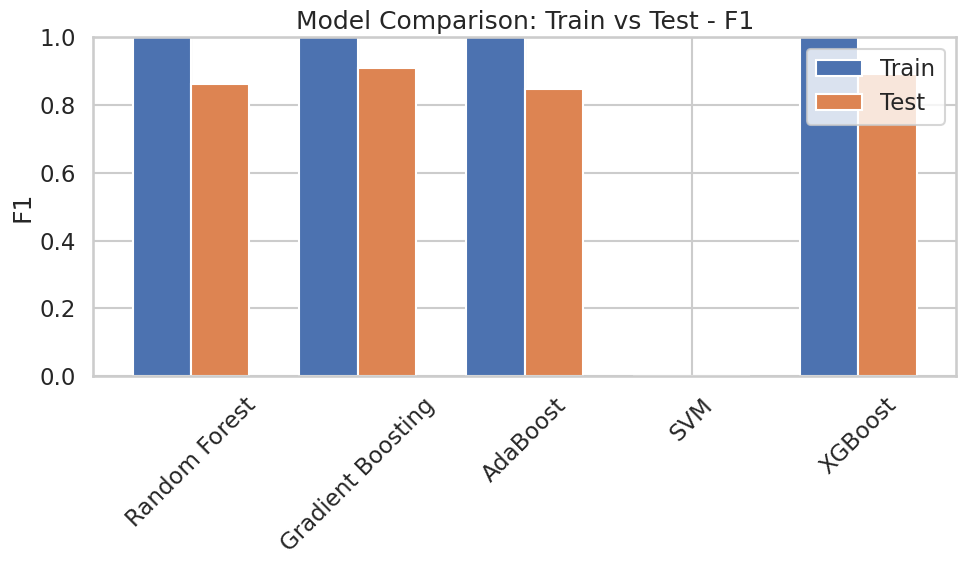

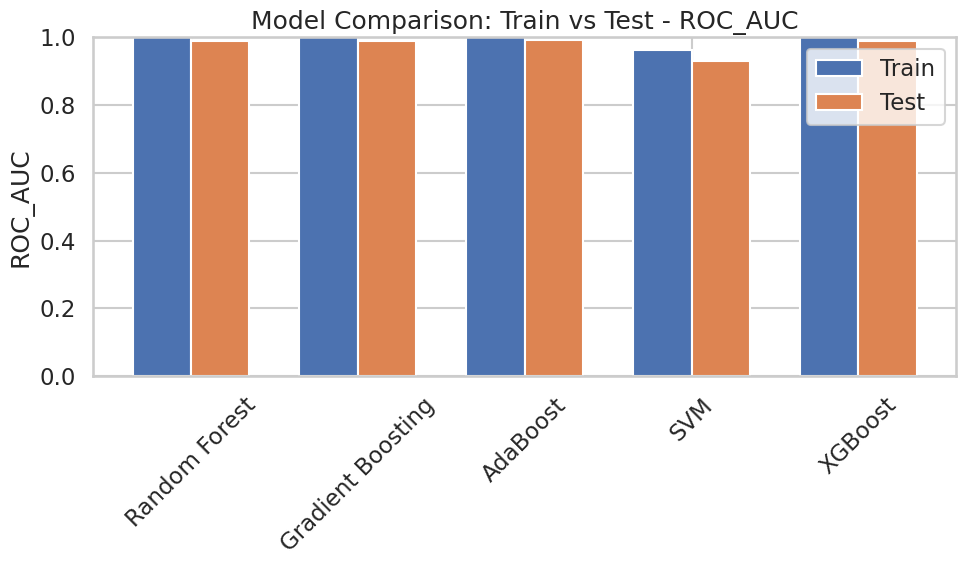

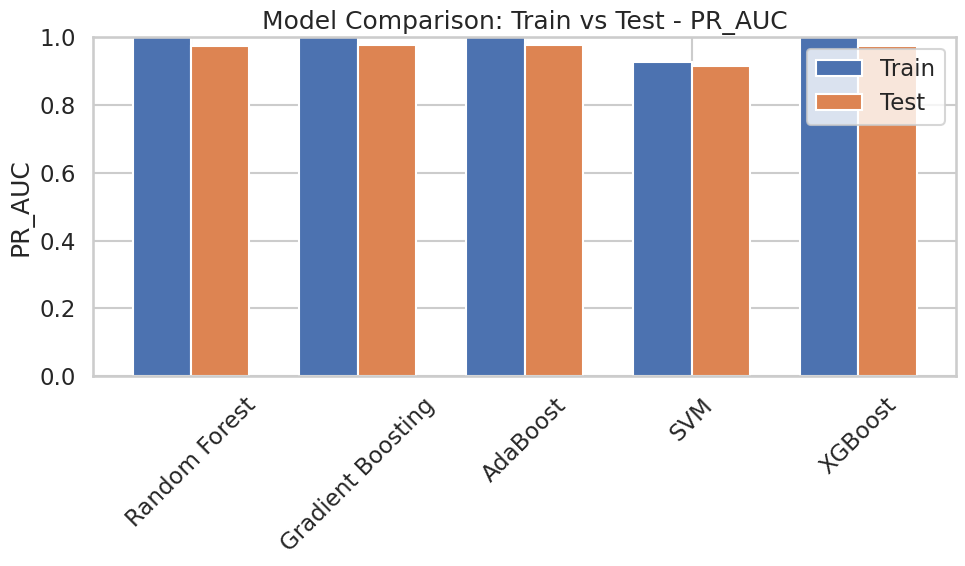

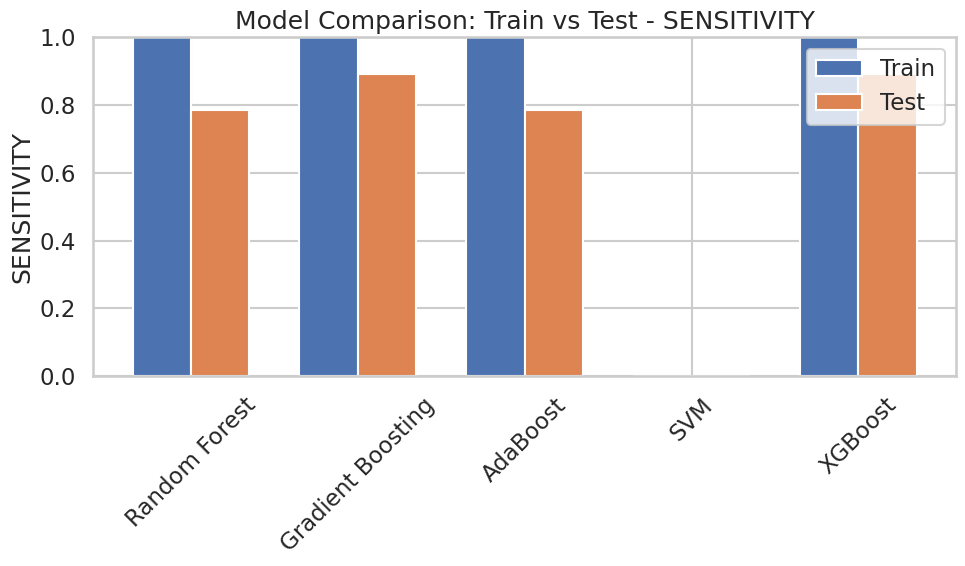

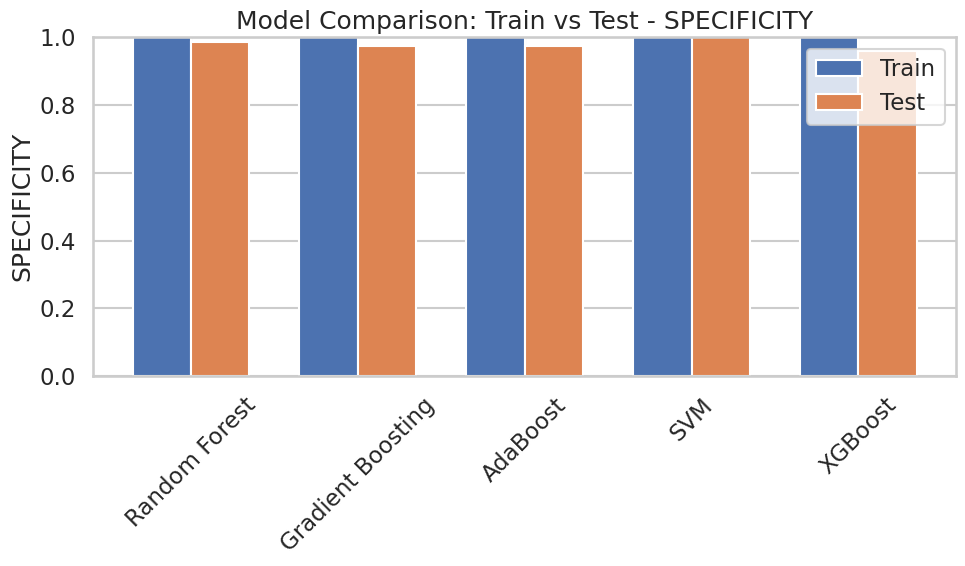

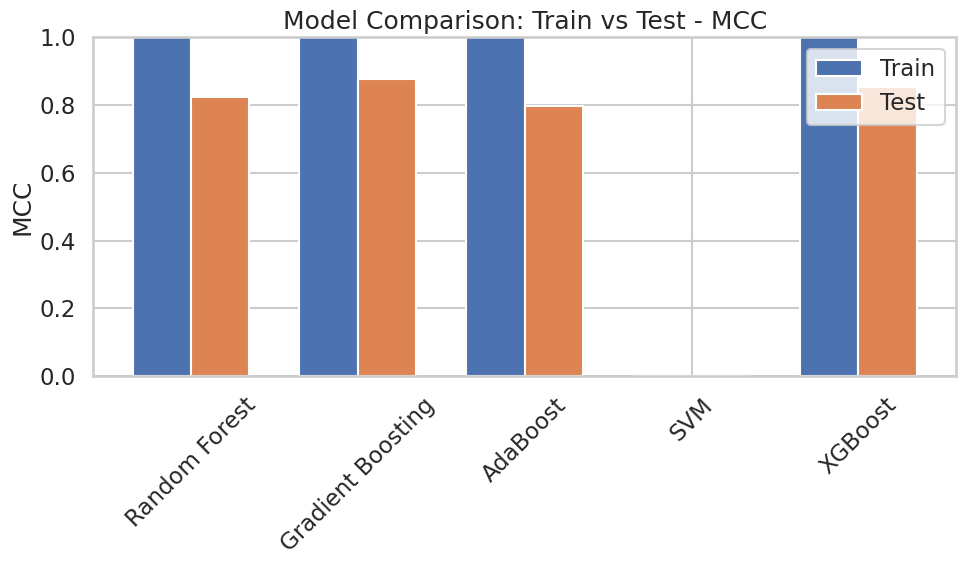

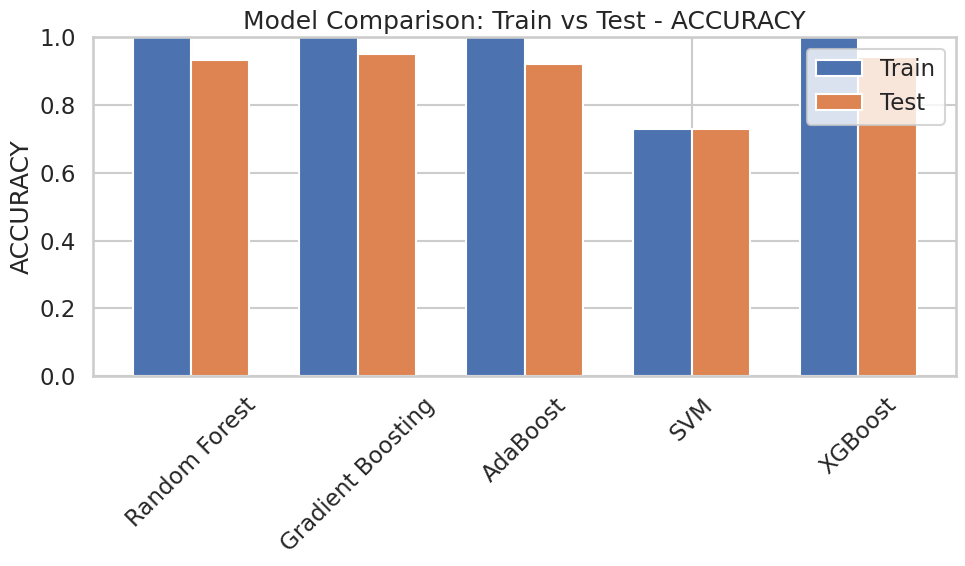

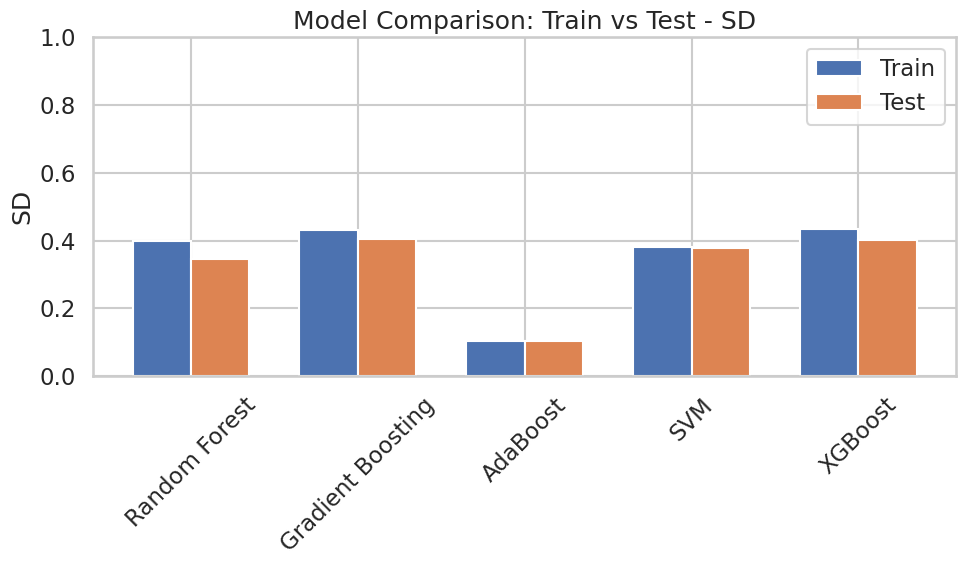

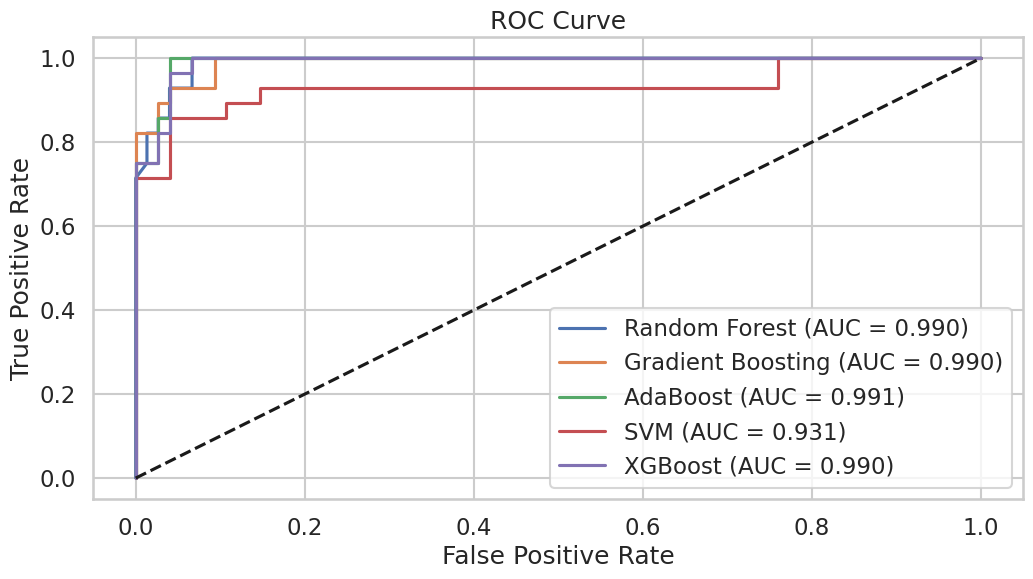

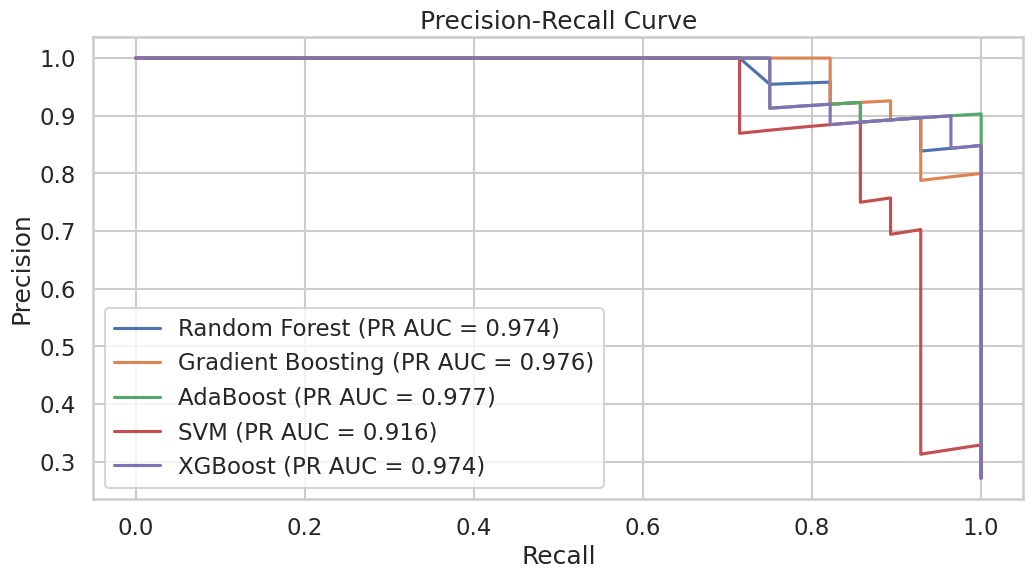

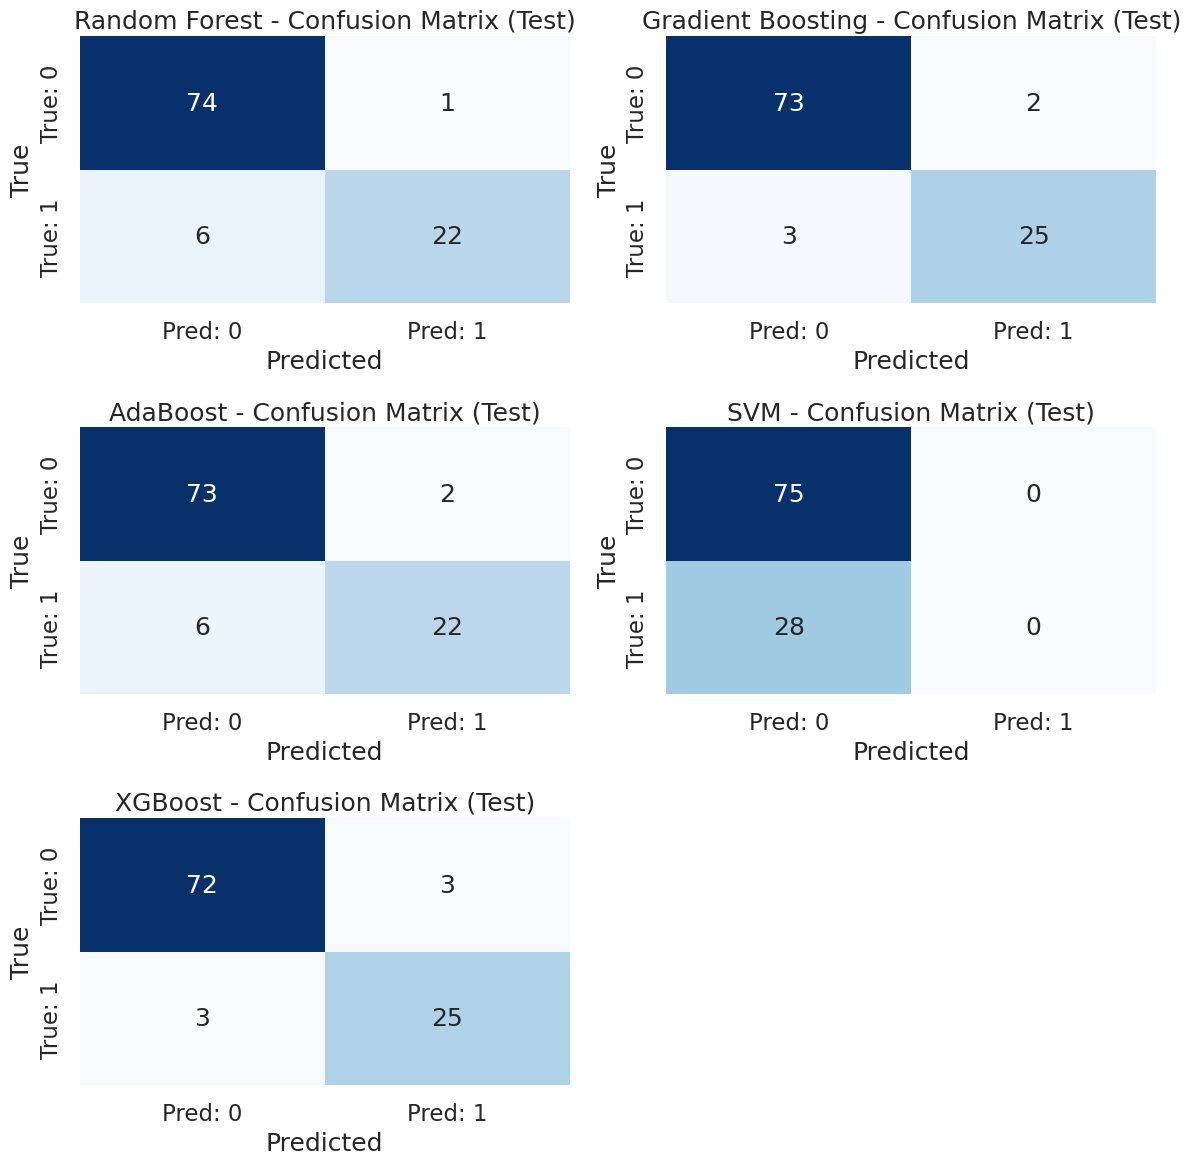

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, matthews_corrcoef, roc_auc_score,
    average_precision_score, precision_recall_curve, roc_curve,
    recall_score, f1_score, accuracy_score
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Assume X_train, y_train, X_test, y_test are already defined

base_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=None),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=None),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=None),
    'SVM': SVC(probability=True, random_state=None),  # SVM model with probability estimates
    'XGBoost': XGBClassifier(n_estimators=100, random_state=None)
}

def calculate_metrics(y_true, y_pred, y_prob):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = recall_score(y_true, y_pred)
    # Handle the case where tn + fp is zero to avoid division by zero for specificity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    mcc = matthews_corrcoef(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    pr_auc = average_precision_score(y_true, y_prob)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate Standard Deviation (SD) of the probabilities or predictions
    sd = np.std(y_prob)

    return {
        'f1': f1,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'mcc': mcc,
        'accuracy': accuracy,
        'sd': sd,
        'confusion_matrix': cm
    }

results = {}

# Training and calculating metrics for each model
for model_name, model in base_models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Train metrics
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_train)
    train_metrics = calculate_metrics(y_train, y_train_pred, y_train_prob)

    # Test metrics
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    test_metrics = calculate_metrics(y_test, y_test_pred, y_test_prob)

    results[model_name] = {
        'train': train_metrics,
        'test': test_metrics
    }

    print(f"{model_name} - Train F1: {train_metrics['f1']:.3f}, Test F1: {test_metrics['f1']:.3f}")

# Plot train vs test metrics bar charts
metrics = ['f1', 'roc_auc', 'pr_auc', 'sensitivity', 'specificity', 'mcc', 'accuracy', 'sd']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    train_vals = [results[m]['train'][metric] for m in base_models]
    test_vals = [results[m]['test'][metric] for m in base_models]

    x = np.arange(len(base_models))
    width = 0.35

    plt.bar(x - width/2, train_vals, width, label='Train')
    plt.bar(x + width/2, test_vals, width, label='Test')

    plt.ylabel(metric.upper())
    plt.title(f'Model Comparison: Train vs Test - {metric.upper()}')
    plt.xticks(x, list(base_models.keys()), rotation=45)
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot ROC curves
plt.figure(figsize=(12, 6))
for model_name, model in base_models.items():
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(12, 6))
for model_name, model in base_models.items():
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{model_name} (PR AUC = {pr_auc:.3f})")

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Plot confusion matrices for test set
num_models = len(base_models)
n_cols = 2
# Calculate number of rows needed based on number of models and columns
n_rows = (num_models + n_cols - 1) // n_cols # Ceiling division
plt.figure(figsize=(12, n_rows * 4))

for i, (model_name, _) in enumerate(base_models.items(), 1):
    cm = results[model_name]['test']['confusion_matrix']
    plt.subplot(n_rows, n_cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: 0', 'Pred: 1'],
                yticklabels=['True: 0', 'True: 1'])
    plt.title(f'{model_name} - Confusion Matrix (Test)')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

rf = RandomForestClassifier(random_state=None)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best CV F1 score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_

# Evaluate on test
y_test_pred = best_rf.predict(X_test)
y_test_prob = best_rf.predict_proba(X_test)[:, 1]
test_f1 = f1_score(y_test, y_test_pred)
print(f"Test F1 after tuning: {test_f1:.3f}")


Best params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best CV F1 score: 0.9292861194392674
Test F1 after tuning: 0.863


Training Random Forest...
Random Forest - Train F1: 1.000, Test F1: 0.880
Training Gradient Boosting...
Gradient Boosting - Train F1: 1.000, Test F1: 0.909
Training AdaBoost...
AdaBoost - Train F1: 1.000, Test F1: 0.846
Training SVM...
SVM - Train F1: 0.000, Test F1: 0.000
Training XGBoost...
XGBoost - Train F1: 1.000, Test F1: 0.893


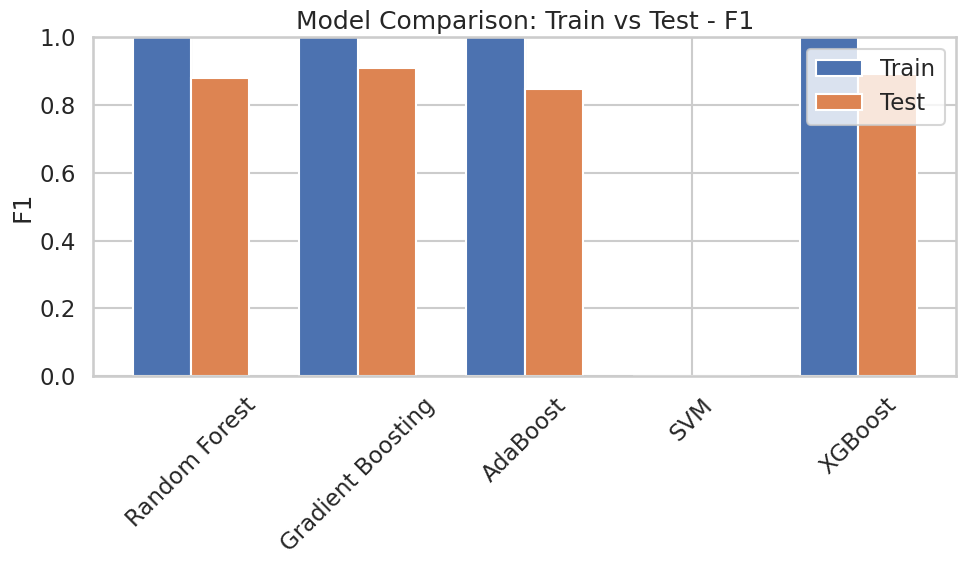

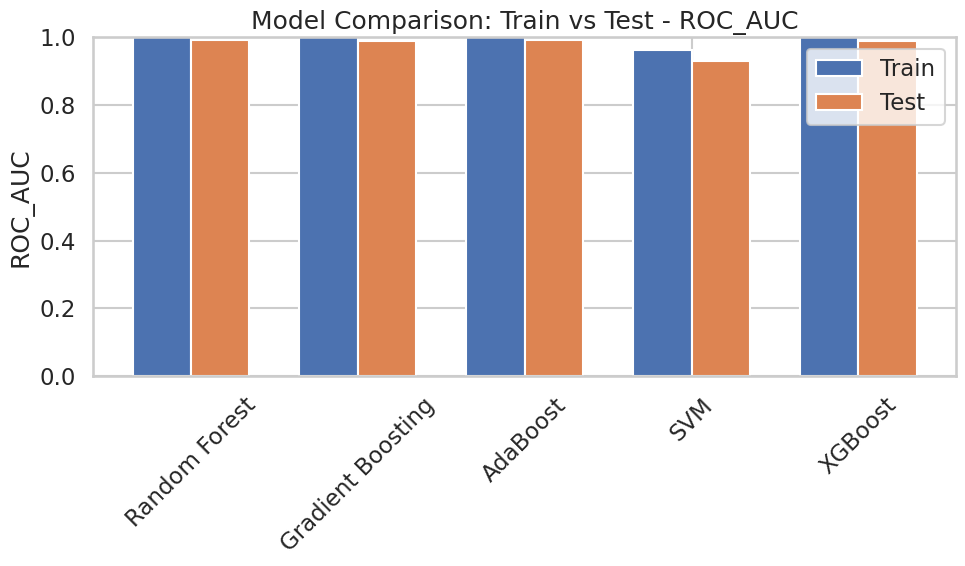

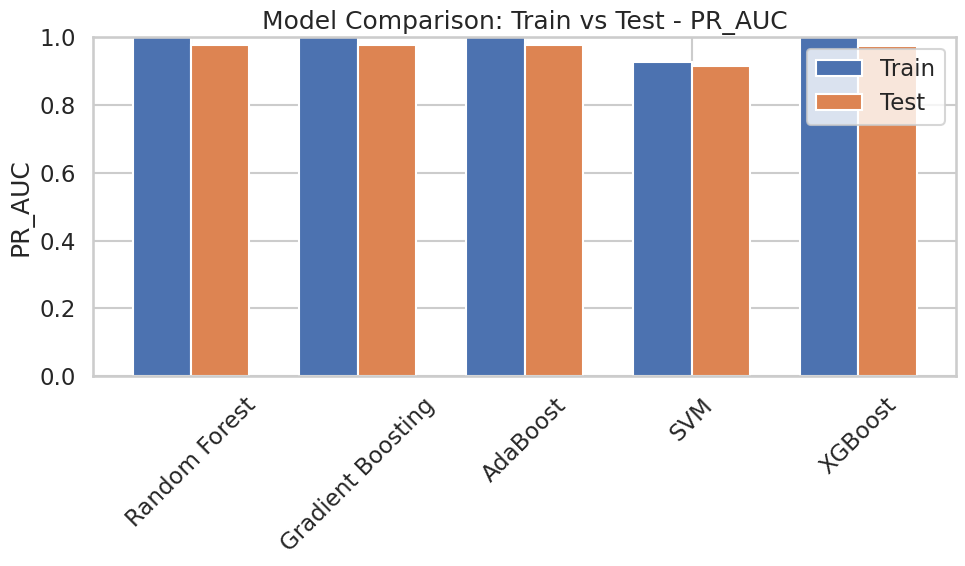

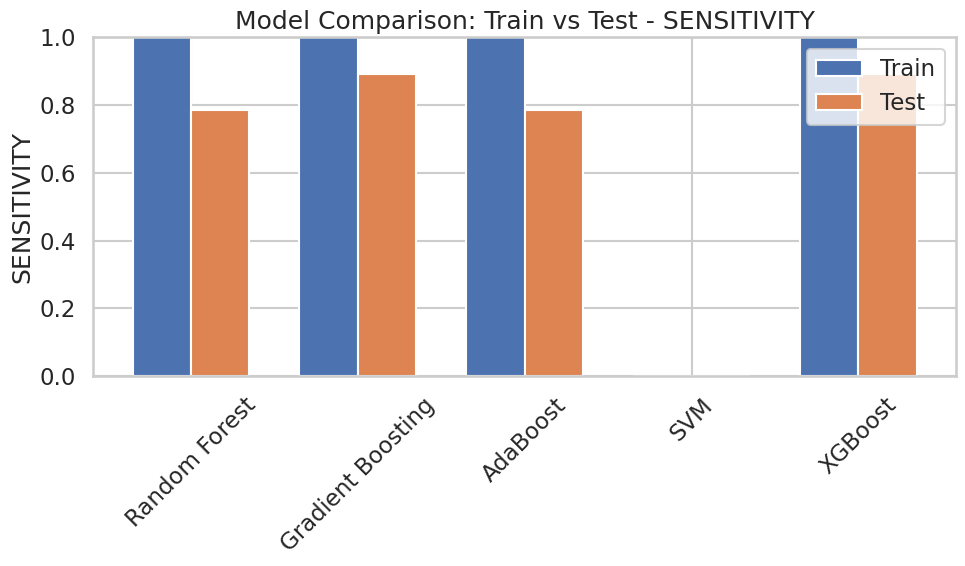

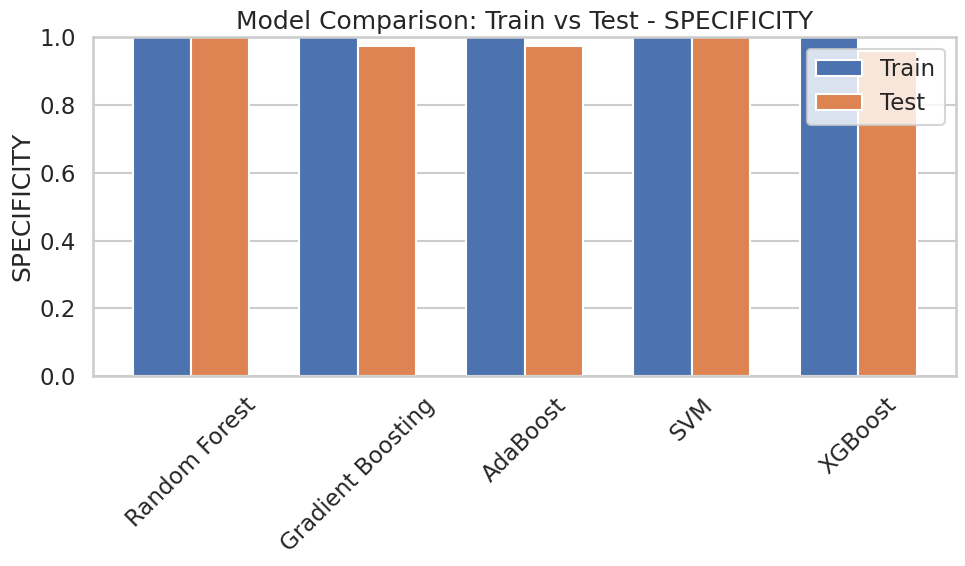

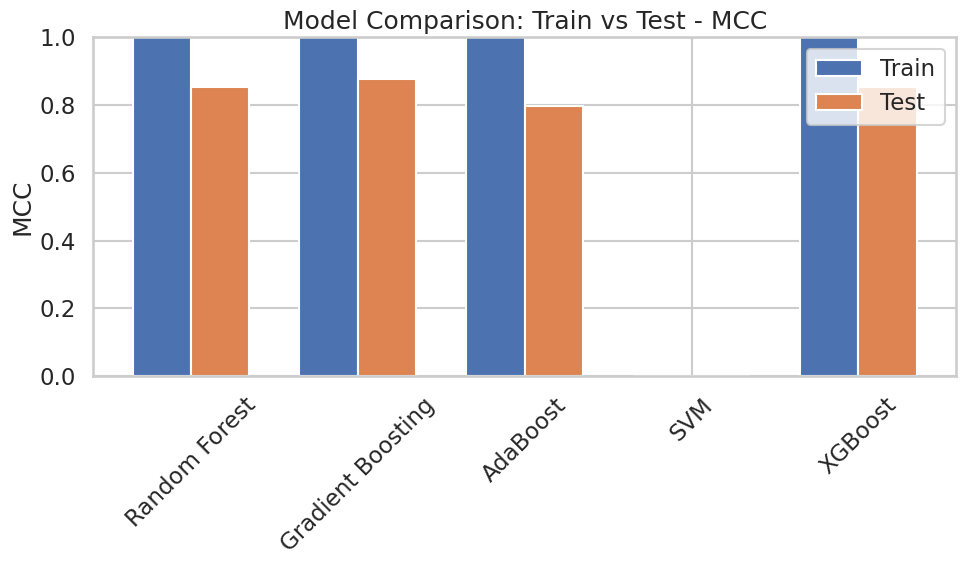

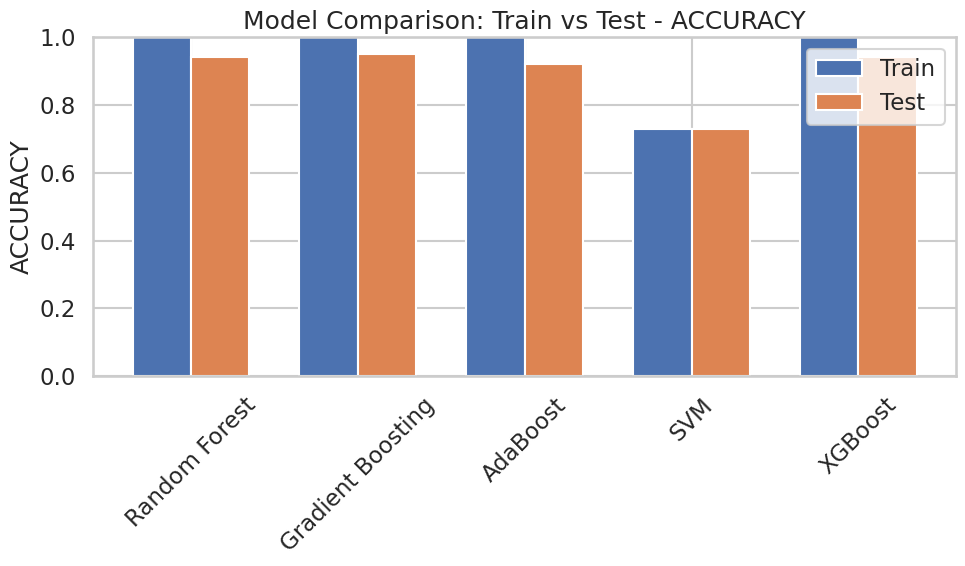

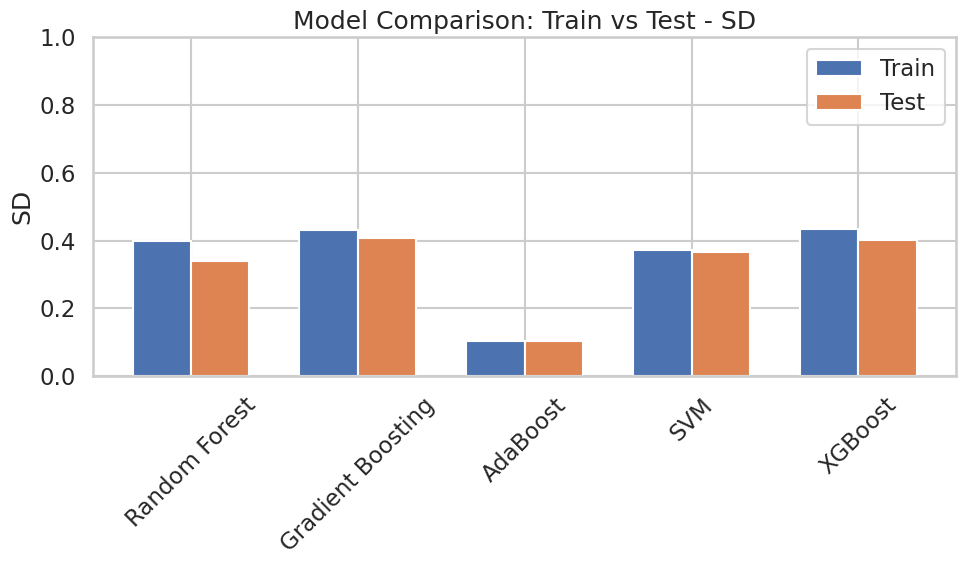

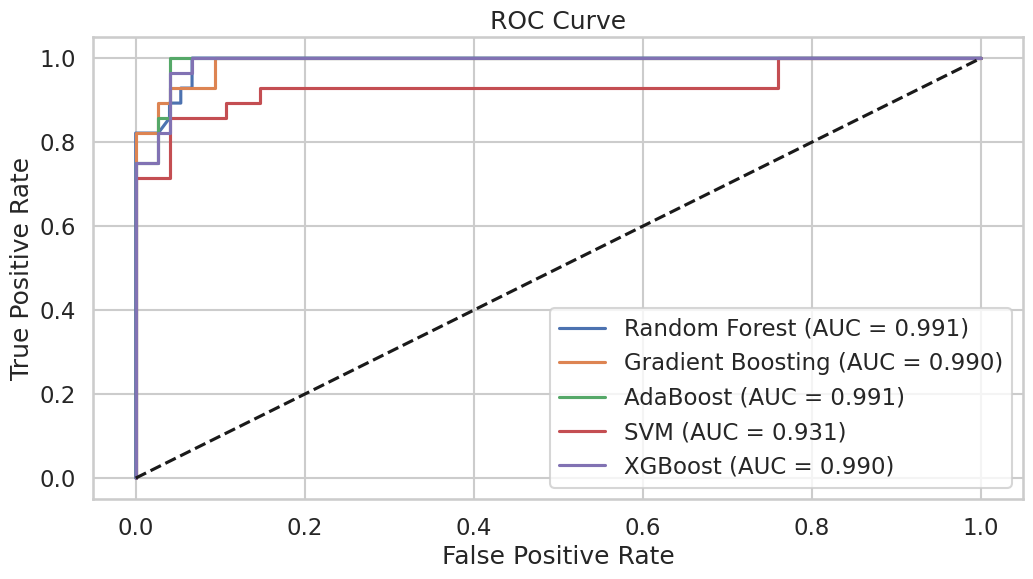

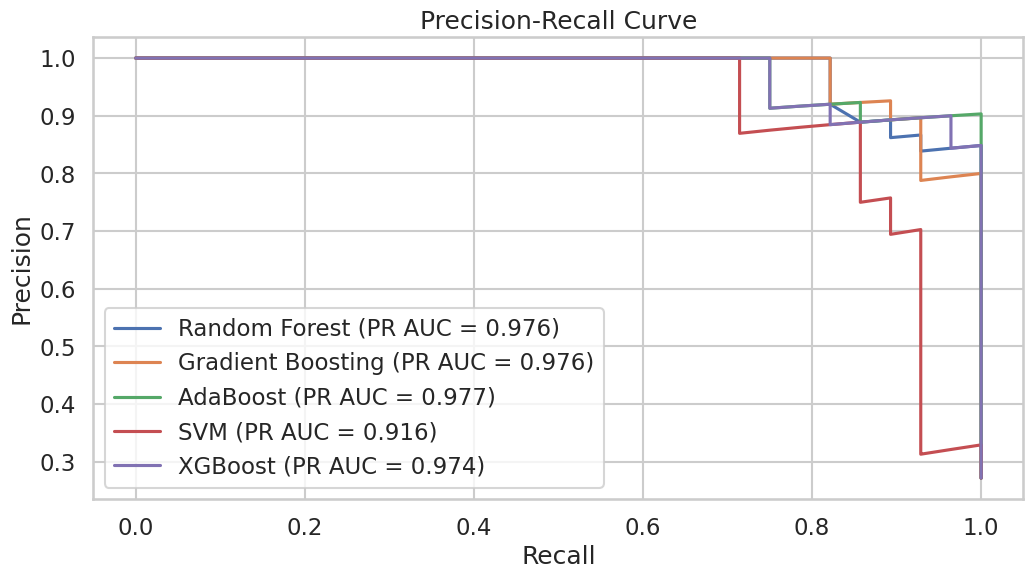

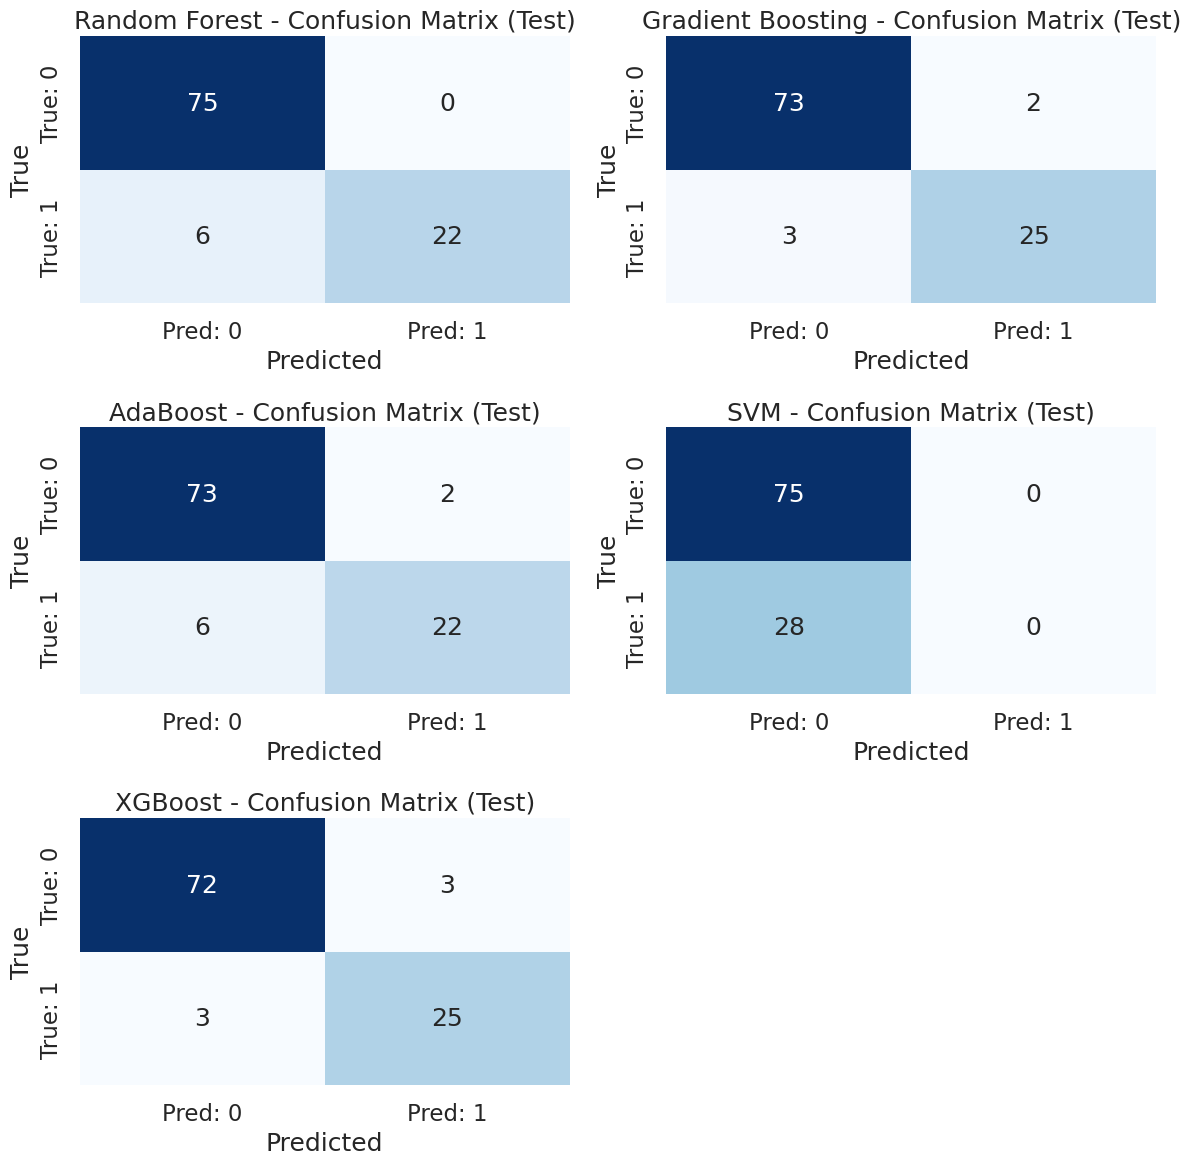

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, matthews_corrcoef, roc_auc_score,
    average_precision_score, precision_recall_curve, roc_curve,
    recall_score, f1_score, accuracy_score
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Assume X_train, y_train, X_test, y_test are already defined
# (Ensure these are loaded from previous cells if they are not in the current one)

base_models_definitions = { # Renamed to distinguish from fitted models
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=None),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=None),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=None),
    'SVM': SVC(probability=True, random_state=None),  # SVM model with probability estimates
    'XGBoost': XGBClassifier(n_estimators=100, random_state=None)
}

def calculate_metrics(y_true, y_pred, y_prob):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    # Handle the case where tn + fp is zero to avoid division by zero for specificity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    sensitivity = recall_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    pr_auc = average_precision_score(y_true, y_prob)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    # Standard Deviation (SD) of predicted probabilities
    sd = np.std(y_prob)

    return {
        'f1': f1,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'mcc': mcc,
        'accuracy': accuracy,
        'sd': sd,
        'confusion_matrix': cm
    }

results = {}
fitted_models = {} # Dictionary to store the fitted models

# Training and calculating metrics for each model
for model_name, model_instance in base_models_definitions.items(): # Use the model definitions
    print(f"Training {model_name}...")
    # Fit the model
    model_instance.fit(X_train, y_train)
    fitted_models[model_name] = model_instance # Store the fitted model instance

    # Train metrics
    y_train_pred = model_instance.predict(X_train)
    y_train_prob = model_instance.predict_proba(X_train)[:, 1] if hasattr(model_instance, 'predict_proba') else model_instance.decision_function(X_train)
    train_metrics = calculate_metrics(y_train, y_train_pred, y_train_prob)

    # Test metrics
    y_test_pred = model_instance.predict(X_test)
    y_test_prob = model_instance.predict_proba(X_test)[:, 1] if hasattr(model_instance, 'predict_proba') else model_instance.decision_function(X_test)
    test_metrics = calculate_metrics(y_test, y_test_pred, y_test_prob)

    results[model_name] = {
        'train': train_metrics,
        'test': test_metrics
    }

    print(f"{model_name} - Train F1: {train_metrics['f1']:.3f}, Test F1: {test_metrics['f1']:.3f}")

# Plot train vs test metrics bar charts
metrics = ['f1', 'roc_auc', 'pr_auc', 'sensitivity', 'specificity', 'mcc', 'accuracy', 'sd']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    train_vals = [results[m]['train'][metric] for m in fitted_models.keys()] # Use keys from fitted_models
    test_vals = [results[m]['test'][metric] for m in fitted_models.keys()] # Use keys from fitted_models

    x = np.arange(len(fitted_models))
    width = 0.35

    plt.bar(x - width/2, train_vals, width, label='Train')
    plt.bar(x + width/2, test_vals, width, label='Test')

    plt.ylabel(metric.upper())
    plt.title(f'Model Comparison: Train vs Test - {metric.upper()}')
    plt.xticks(x, list(fitted_models.keys()), rotation=45) # Use keys from fitted_models for labels
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot ROC curves
plt.figure(figsize=(12, 6))
# Iterate through the fitted models
for model_name, model in fitted_models.items():
    # Use the fitted model to get probabilities
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(12, 6))
# Iterate through the fitted models
for model_name, model in fitted_models.items():
    # Use the fitted model to get probabilities
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{model_name} (PR AUC = {pr_auc:.3f})")

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Plot confusion matrices for test set
num_models = len(fitted_models) # Use the count of fitted models
n_cols = 2
# Calculate number of rows needed based on number of models and columns
n_rows = (num_models + n_cols - 1) // n_cols # Ceiling division
plt.figure(figsize=(12, n_rows * 4))

# Iterate through the results dictionary to get the confusion matrices
for i, (model_name, _) in enumerate(results.items(), 1):
    cm = results[model_name]['test']['confusion_matrix']
    plt.subplot(n_rows, n_cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: 0', 'Pred: 1'],
                yticklabels=['True: 0', 'True: 1'])
    plt.title(f'{model_name} - Confusion Matrix (Test)')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, matthews_corrcoef, roc_auc_score,
    average_precision_score, precision_recall_curve, roc_curve,
    recall_score, f1_score, accuracy_score
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Assume X_train, y_train, X_test, y_test are already defined

base_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=None),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=None),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=None),
    'SVM': SVC(probability=True, random_state=None),  # SVM model with probability estimates
    'XGBoost': XGBClassifier(n_estimators=100, random_state=None)
}

# Calculate metrics function
def calculate_metrics(y_true, y_pred, y_prob):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = recall_score(y_true, y_pred)
    specificity = tn / (tn + fp)
    mcc = matthews_corrcoef(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    pr_auc = average_precision_score(y_true, y_prob)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    # Standard Deviation (SD) of predicted probabilities
    sd = np.std(y_prob)

    return {
        'f1': f1,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'mcc': mcc,
        'accuracy': accuracy,
        'sd': sd,
        'confusion_matrix': cm
    }

# Best parameters for Random Forest
best_rf_model = RandomForestClassifier(
    max_depth=10,
    min_samples_split=5,
    n_estimators=100,
    random_state=None
)

# Train the models
results = {}
model_probabilities = {}

for model_name, model in base_models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Get probabilities for ROC and Precision-Recall curve
    y_train_prob = model.predict_proba(X_train)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_train)
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    # Store the model probabilities
    model_probabilities[model_name] = y_test_prob

    # Calculate metrics
    train_metrics = calculate_metrics(y_train, y_train_pred, y_train_prob)
    test_metrics = calculate_metrics(y_test, y_test_pred, y_test_prob)

    results[model_name] = {
        'train': train_metrics,
        'test': test_metrics
    }

    print(f"{model_name} - Train F1: {train_metrics['f1']:.3f}, Test F1: {test_metrics['f1']:.3f}")

# Print the probabilities for all models using the test set
print("\nProbabilities for all models on the test set:")
for model_name, probs in model_probabilities.items():
    print(f"\n{model_name} Probabilities on Test Set:")
    print(probs[:10])  # Displaying first 10 probabilities for brevity

# You can also output the full set if needed, or save them into a DataFrame for analysis:
probabilities_df = pd.DataFrame(model_probabilities)
print("\nAll Model Probabilities (first 10 samples):")
print(probabilities_df.head(10))


Training Random Forest...
Random Forest - Train F1: 1.000, Test F1: 0.906
Training Gradient Boosting...
Gradient Boosting - Train F1: 1.000, Test F1: 0.909
Training AdaBoost...
AdaBoost - Train F1: 1.000, Test F1: 0.846
Training SVM...
SVM - Train F1: 0.000, Test F1: 0.000
Training XGBoost...
XGBoost - Train F1: 1.000, Test F1: 0.893

Probabilities for all models on the test set:

Random Forest Probabilities on Test Set:
[0.01 0.01 0.   0.6  0.86 0.05 0.38 0.05 0.15 0.02]

Gradient Boosting Probabilities on Test Set:
[0.00135911 0.00148609 0.00108049 0.77218273 0.99472948 0.00324059
 0.8526018  0.00106498 0.00187555 0.0013424 ]

AdaBoost Probabilities on Test Set:
[0.367786   0.33797662 0.24152179 0.48653473 0.5946497  0.37689727
 0.48483299 0.35268098 0.41120363 0.26977142]

SVM Probabilities on Test Set:
[1.45043587e-01 1.19685540e-02 3.66360640e-05 5.34341701e-01
 9.45322072e-01 8.94977848e-02 9.75631969e-01 6.00968800e-02
 3.58438452e-01 2.50731723e-03]

XGBoost Probabilities on Te

In [31]:
# Print the probabilities for all models using the test set (Last 10 samples)
print("\nProbabilities for all models on the test set (last 10 samples):")
for model_name, probs in model_probabilities.items():
    print(f"\n{model_name} Probabilities on Test Set (Last 10 samples):")
    print(probs[-10:])  # Displaying last 10 probabilities for brevity

# You can also output the full set if needed, or save them into a DataFrame for analysis:
probabilities_df = pd.DataFrame(model_probabilities)
print("\nAll Model Probabilities (last 10 samples):")
print(probabilities_df.tail(10))  # Displaying last 10 rows



Probabilities for all models on the test set (last 10 samples):

Random Forest Probabilities on Test Set (Last 10 samples):
[0.21 0.   0.94 0.29 0.59 0.02 0.01 0.89 0.24 0.05]

Gradient Boosting Probabilities on Test Set (Last 10 samples):
[8.64940242e-02 7.18372781e-04 9.82904345e-01 1.80467058e-01
 7.54486344e-01 5.99373519e-03 2.66345088e-03 9.92140034e-01
 6.79567791e-02 3.40698369e-03]

AdaBoost Probabilities on Test Set (Last 10 samples):
[0.46618043 0.28722416 0.58385258 0.48466459 0.49495904 0.31600806
 0.36880212 0.63389714 0.42071502 0.33085764]

SVM Probabilities on Test Set (Last 10 samples):
[3.98230533e-01 5.62034901e-03 9.03026607e-01 2.00034963e-01
 9.93514848e-01 1.92045039e-04 9.07105385e-03 9.44042386e-01
 1.81476559e-01 4.12496035e-02]

XGBoost Probabilities on Test Set (Last 10 samples):
[6.5001965e-02 1.8767695e-04 9.6863526e-01 1.7408435e-01 5.5652118e-01
 1.2945574e-03 3.4177676e-04 9.9229699e-01 4.5814749e-02 2.9478423e-04]

All Model Probabilities (last 10 sa

In [32]:
# Print the probabilities for all models using the test set (Last 10 samples) and compare to actual labels
print("\nProbabilities for all models on the test set (last 10 samples) compared to actual labels:")

for model_name, probs in model_probabilities.items():
    print(f"\n{model_name} Probabilities on Test Set (Last 10 samples):")

    # Display last 10 predicted probabilities and corresponding actual labels
    predicted_probs = probs[-10:]  # Last 10 predicted probabilities
    actual_labels = y_test[-10:]  # Last 10 actual labels (ground truth)

    # Create a DataFrame to show the comparison
    comparison_df = pd.DataFrame({
        'Actual Label': actual_labels,
        'Predicted Probability': predicted_probs
    })

    print(comparison_df)

# Optionally, output all probabilities in DataFrame for comparison
probabilities_df = pd.DataFrame(model_probabilities)
comparison_df_full = pd.concat([probabilities_df, pd.DataFrame(y_test, columns=["Actual Label"])], axis=1)
print("\nFull Comparison (last 10 samples):")
print(comparison_df_full.tail(10))  # Display last 10 rows with both predicted probabilities and actual labels



Probabilities for all models on the test set (last 10 samples) compared to actual labels:

Random Forest Probabilities on Test Set (Last 10 samples):
     Actual Label  Predicted Probability
93              0                   0.21
94              0                   0.00
95              1                   0.94
96              1                   0.29
97              1                   0.59
98              0                   0.02
99              0                   0.01
100             1                   0.89
101             0                   0.24
102             0                   0.05

Gradient Boosting Probabilities on Test Set (Last 10 samples):
     Actual Label  Predicted Probability
93              0               0.086494
94              0               0.000718
95              1               0.982904
96              1               0.180467
97              1               0.754486
98              0               0.005994
99              0               0.002663
100   

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize the model
rf_model = RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=100, random_state=None)

# Perform cross-validation on the training data
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')

# Print out cross-validation scores
print(f"Cross-validated F1 scores: {cv_scores}")
print(f"Mean F1 score from cross-validation: {np.mean(cv_scores):.3f}")


Cross-validated F1 scores: [0.87804878 0.82926829 0.92682927 0.90909091 0.97674419]
Mean F1 score from cross-validation: 0.904


Hyperparameter Tuning on RF, GB, and AdaBoost

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score

# Define parameter grids for each model
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
    },
}

models = {
    'Random Forest': RandomForestClassifier(random_state=None),
    'Gradient Boosting': GradientBoostingClassifier(random_state=None),
    'AdaBoost': AdaBoostClassifier(random_state=None),
}

best_estimators = {}

for model_name in models:
    print(f"\nStarting Grid Search for {model_name}...")
    grid_search = GridSearchCV(
        estimator=models[model_name],
        param_grid=param_grids[model_name],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    print(f"Best params for {model_name}: {grid_search.best_params_}")
    print(f"Best CV F1 score for {model_name}: {grid_search.best_score_:.4f}")

    best_estimators[model_name] = grid_search.best_estimator_

# Evaluate best models on test set
from sklearn.metrics import classification_report

for model_name, best_model in best_estimators.items():
    y_test_pred = best_model.predict(X_test)
    y_test_prob = best_model.predict_proba(X_test)[:, 1]
    test_f1 = f1_score(y_test, y_test_pred)
    print(f"\n{model_name} Test F1 score after tuning: {test_f1:.4f}")
    print(f"Classification report for {model_name} on test set:\n",
          classification_report(y_test, y_test_pred))



Starting Grid Search for Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best CV F1 score for Random Forest: 0.9262

Starting Grid Search for Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best CV F1 score for Gradient Boosting: 0.8956

Starting Grid Search for AdaBoost...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best params for AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Best CV F1 score for AdaBoost: 0.9159

Random Forest Test F1 score after tuning: 0.9057
Classification report for Random Forest on test set:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        75
           1       0.96      0.86      0.91        28

    accuracy                       

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

# Define parameter grids for each model
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
    }
}

# Define models
models = {
    'SVM': SVC(probability=True, random_state=None),
    'XGBoost': XGBClassifier(random_state=None)
}

best_estimators = {}

# Grid search for each model
for model_name in models:
    print(f"\nStarting Grid Search for {model_name}...")
    grid_search = GridSearchCV(
        estimator=models[model_name],
        param_grid=param_grids[model_name],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    print(f"Best params for {model_name}: {grid_search.best_params_}")
    print(f"Best CV F1 score for {model_name}: {grid_search.best_score_:.4f}")

    best_estimators[model_name] = grid_search.best_estimator_

# Evaluate best models on the test set
for model_name, best_model in best_estimators.items():
    y_test_pred = best_model.predict(X_test)
    y_test_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else None
    test_f1 = f1_score(y_test, y_test_pred)
    print(f"\n{model_name} Test F1 score after tuning: {test_f1:.4f}")
    print(f"Classification report for {model_name} on test set:\n",
          classification_report(y_test, y_test_pred))



Starting Grid Search for SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


KeyboardInterrupt: 

 Save (Serialize) the Final Model

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, classification_report
import os

X_train = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/y_train.csv').squeeze()

X_test = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/y_test.csv').squeeze()

# Define parameter grids for each model
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
    },
}

# Models with random_state set for reproducibility in final training
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
}

# Create a directory to save the models
save_dir = '/content/drive/MyDrive/KP/KP imbalance'
os.makedirs(save_dir, exist_ok=True)

best_estimators = {}

# Perform GridSearchCV for each model
for model_name in models:
    print(f"\nStarting Grid Search for {model_name}...")

    grid_search = GridSearchCV(
        estimator=models[model_name],
        param_grid=param_grids[model_name],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    # Best parameters and score
    print(f"Best params for {model_name}: {grid_search.best_params_}")
    print(f"Best CV F1 score for {model_name}: {grid_search.best_score_:.4f}")

    # Store best estimator for final evaluation
    best_estimators[model_name] = grid_search.best_estimator_

    # Save the best model
    filename = os.path.join(save_dir, f"{model_name.replace(' ', '_')}_fixed_model.pkl")
    joblib.dump(grid_search.best_estimator_, filename)
    print(f"Saved {model_name} fixed model to {filename}")

# Evaluate best models on the test set
for model_name, best_model in best_estimators.items():
    y_test_pred = best_model.predict(X_test)
    y_test_prob = best_model.predict_proba(X_test)[:, 1]
    test_f1 = f1_score(y_test, y_test_pred)

    print(f"\n{model_name} Test F1 score after tuning: {test_f1:.4f}")
    print(f"Classification report for {model_name} on test set:\n",
          classification_report(y_test, y_test_pred))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score, average_precision_score
import numpy as np

# Assume you have your test true labels and predictions/probs like this:
y_test = y_test  # your true labels loaded previously

# Predictions and probabilities from your best models on test set:
predictions = {
    'Random Forest': best_estimators['Random Forest'].predict(X_test),
    'Gradient Boosting': best_estimators['Gradient Boosting'].predict(X_test),
    'AdaBoost': best_estimators['AdaBoost'].predict(X_test)
}

probabilities = {
    'Random Forest': best_estimators['Random Forest'].predict_proba(X_test)[:, 1],
    'Gradient Boosting': best_estimators['Gradient Boosting'].predict_proba(X_test)[:, 1],
    'AdaBoost': best_estimators['AdaBoost'].predict_proba(X_test)[:, 1],
}

model_colors = {
    'Random Forest': '#E7A6A1',       # muted petal pink
    'Gradient Boosting': '#A1C6EA',   # muted petal blue
    'AdaBoost': '#B9AEDC'             # muted petal purple
}

# 1. Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, y_pred) in zip(axes, predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'])
    ax.set_title(f'{name} Confusion Matrix', fontsize=14, weight='bold')
    ax.set_xlabel('Predicted', fontsize=12)
    ax.set_ylabel('True', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1)

plt.tight_layout()
plt.show()

# 2. ROC Curves
plt.figure(figsize=(8, 6))
for name, y_prob in probabilities.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', color=model_colors[name], linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Guess')
plt.title('ROC Curve Comparison', fontsize=16, weight='bold')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=12, loc='lower right')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# 3. Precision-Recall Curves
plt.figure(figsize=(8, 6))
for name, y_prob in probabilities.items():
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f'{name} (AP = {ap:.3f})', color=model_colors[name], linewidth=2)

plt.title('Precision-Recall Curve Comparison', fontsize=16, weight='bold')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.legend(fontsize=12, loc='lower left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, matthews_corrcoef,
    average_precision_score, roc_auc_score,
    roc_curve, precision_recall_curve
)

# Load your data
X_train = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/y_train.csv').squeeze()

X_test = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/y_test.csv').squeeze()

# Define only RF, GB, and AdaBoost
models_info = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=None),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=None),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=None)
}

n_runs = 3

# Initialize metrics storage
metrics_all = {
    name: {
        'Accuracy': [], 'MCC': [], 'Precision': [], 'F1': [],
        'Specificity': [], 'Sensitivity': [], 'PR AUC': [], 'ROC AUC': []
    }
    for name in models_info.keys()
}

last_run_results = {}

# Train, evaluate, collect metrics
for name, model_proto in models_info.items():
    print(f"\nTraining and evaluating {name} for {n_runs} runs...\n")
    for run in range(1, n_runs + 1):
        print(f"Run {run}/{n_runs} for {name}")
        model = model_proto.__class__(**model_proto.get_params())
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        acc = accuracy_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        sens = recall_score(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        spec = tn / (tn + fp) if (tn + fp) > 0 else 0
        pr_auc = average_precision_score(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)

        metrics_all[name]['Accuracy'].append(acc)
        metrics_all[name]['MCC'].append(mcc)
        metrics_all[name]['Precision'].append(prec)
        metrics_all[name]['F1'].append(f1)
        metrics_all[name]['Sensitivity'].append(sens)
        metrics_all[name]['Specificity'].append(spec)
        metrics_all[name]['PR AUC'].append(pr_auc)
        metrics_all[name]['ROC AUC'].append(roc_auc)

        print(f"Accuracy: {acc:.4f}, MCC: {mcc:.4f}, Precision: {prec:.4f}, F1: {f1:.4f}, Sensitivity: {sens:.4f}, Specificity: {spec:.4f}, PR AUC: {pr_auc:.4f}, ROC AUC: {roc_auc:.4f}")

        if run == n_runs:
            last_run_results[name] = {'y_pred': y_pred, 'y_prob': y_prob}

# Print summary statistics
print("\nSummary statistics (mean ± std):\n")
summary = []
for name, metric_dict in metrics_all.items():
    print(f"{name}:")
    row = {'Model': name}
    for metric, values in metric_dict.items():
        mean_val = np.mean(values)
        std_val = np.std(values)
        print(f"  {metric}: {mean_val:.4f} ± {std_val:.4f}")
        row[f"{metric} Mean"] = mean_val
        row[f"{metric} SD"] = std_val
    print()
    summary.append(row)

metrics_df = pd.DataFrame(summary)
print(metrics_df)

# Plot confusion matrices for last run
fig_cm, axes_cm = plt.subplots(1, len(models_info), figsize=(5 * len(models_info), 5))
if len(models_info) == 1:
    axes_cm = [axes_cm]

for idx, (name, res) in enumerate(last_run_results.items()):
    cm = confusion_matrix(y_test, res['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'],
                ax=axes_cm[idx])
    axes_cm[idx].set_title(f'{name} Confusion Matrix', fontsize=14, weight='bold')
    axes_cm[idx].set_xlabel('Predicted', fontsize=12)
    axes_cm[idx].set_ylabel('True', fontsize=12)

plt.tight_layout()
plt.show()

# Plot ROC and PR curves for last run
fig_curves, (ax_roc, ax_pr) = plt.subplots(1, 2, figsize=(14, 6))

ax_roc.set_title('ROC Curve Comparison', fontsize=16, weight='bold')
ax_roc.set_xlabel('False Positive Rate', fontsize=14)
ax_roc.set_ylabel('True Positive Rate', fontsize=14)

ax_pr.set_title('Precision-Recall Curve Comparison', fontsize=16, weight='bold')
ax_pr.set_xlabel('Recall', fontsize=14)
ax_pr.set_ylabel('Precision', fontsize=14)

model_colors = {
    'Random Forest': '#E7A6A1',       # muted petal pink
    'Gradient Boosting': '#A1C6EA',   # muted petal blue
    'AdaBoost': '#B9AEDC'             # muted petal purple
}

for name, res in last_run_results.items():
    fpr, tpr, _ = roc_curve(y_test, res['y_prob'])
    roc_auc = roc_auc_score(y_test, res['y_prob'])
    ax_roc.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.3f})', color=model_colors[name], linewidth=2)

    precision, recall, _ = precision_recall_curve(y_test, res['y_prob'])
    pr_auc = average_precision_score(y_test, res['y_prob'])
    ax_pr.plot(recall, precision, label=f'{name} (AP={pr_auc:.3f})', color=model_colors[name], linewidth=2)

ax_roc.plot([0, 1], [0, 1], 'k--', label='Random Guess')
ax_roc.legend(fontsize=12)
ax_roc.grid(True, linestyle='--', linewidth=0.5)

ax_pr.legend(fontsize=12)
ax_pr.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [ ]:
import joblib
import pandas as pd

# Define paths to your saved models (update folder if needed)
save_dir = '/content/drive/MyDrive/KP/KP imbalance'

model_paths = {
    'Random Forest': f'{save_dir}/Random_Forest_fixed_model.pkl',
    'Gradient Boosting': f'{save_dir}/Gradient_Boosting_fixed_model.pkl',
    'AdaBoost': f'{save_dir}/AdaBoost_fixed_model.pkl'
}

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_test.csv')

# Load each model and make predictions on the test set
for name, path in model_paths.items():
    model = joblib.load(path)

    # Predict class labels
    y_pred = model.predict(X_test)

    # Predict positive class probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} Predictions:")
    print(y_pred)

    print(f"\n{name} Predicted Probabilities (Positive Class):")
    print(y_prob)


In [ ]:
import joblib
import pandas as pd

# Folder where your models are saved
save_dir = '/content/drive/MyDrive/KP/KP imbalance'

# Model file paths for RF, GB, and AdaBoost
model_paths = {
    'Random Forest': f'{save_dir}/Random_Forest_fixed_model.pkl',
    'Gradient Boosting': f'{save_dir}/Gradient_Boosting_fixed_model.pkl',
    'AdaBoost': f'{save_dir}/AdaBoost_fixed_model.pkl'
}

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_test.csv')

# Load models and predict
for model_name, model_file in model_paths.items():
    model = joblib.load(model_file)  # Load the saved model

    y_pred = model.predict(X_test)  # Predict classes
    y_prob = model.predict_proba(X_test)[:, 1]  # Predict positive class probabilities

    print(f"\nModel: {model_name}")
    print("Predictions:")
    print(y_pred)
    print("Predicted Probabilities (Positive Class):")
    print(y_prob)


In [ ]:
import joblib
from sklearn.metrics import classification_report
import pandas as pd

# Load test data (make sure you load this before using below)
X_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_test.csv').squeeze()

# Load saved models
 {
    'Random Forest': f'{save_dir}/Random_Forest_fixed_model.pkl',
    'Gradient Boosting': f'{save_dir}/Gradient_Boosting_fixed_model.pkl',
    'AdaBoost': f'{save_dir}/AdaBoost_fixed_model.pkl'
}

# Set probability threshold for positive class classification
threshold = 0.5

# Predict probabilities (positive class) for each model
rf_probs = rf_model.predict_proba(X_test)[:, 1]
gb_probs = gb_model.predict_proba(X_test)[:, 1]
ada_probs = ada_model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions based on threshold
rf_pred = (rf_probs >= threshold).astype(int)
gb_pred = (gb_probs >= threshold).astype(int)
ada_pred = (ada_probs >= threshold).astype(int)

# Print classification reports
print(f"=== Random Forest Classification Report (threshold={threshold}) ===")
print(classification_report(y_test, rf_pred))

print(f"=== Gradient Boosting Classification Report (threshold={threshold}) ===")
print(classification_report(y_test, gb_pred))

print(f"=== AdaBoost Classification Report (threshold={threshold}) ===")
print(classification_report(y_test, ada_pred))


In [ ]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, precision_recall_curve,
    roc_auc_score, average_precision_score
)

# Define directory where models and test data are saved
save_dir = '/content/drive/MyDrive/KP/KP imbalance'

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_test.csv').squeeze()

# Load saved models
rf_model = joblib.load(f'{save_dir}/Random_Forest_fixed_model.pkl')
gb_model = joblib.load(f'{save_dir}/Gradient_Boosting_fixed_model.pkl')
ada_model = joblib.load(f'{save_dir}/AdaBoost_fixed_model.pkl')

models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'AdaBoost': ada_model
}

threshold = 0.5

# Colors for plots
model_colors = {
    'Random Forest': '#E7A6A1',    # muted petal pink
    'Gradient Boosting': '#A1C6EA',# muted petal blue
    'AdaBoost': '#B9AEDC'          # muted petal purple
}

# Store predictions and probs for plotting
predictions = {}
probs = {}

# Evaluate models and store predictions
for name, model in models.items():
    prob = model.predict_proba(X_test)[:, 1]
    pred = (prob >= threshold).astype(int)

    print(f"\n=== {name} Classification Report (threshold={threshold}) ===")
    print(classification_report(y_test, pred))

    predictions[name] = pred
    probs[name] = prob

# Plot confusion matrices
fig_cm, axes_cm = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, pred) in zip(axes_cm, predictions.items()):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'],
                ax=ax)
    ax.set_title(f'{name} Confusion Matrix', fontsize=14, weight='bold')
    ax.set_xlabel('Predicted', fontsize=12)
    ax.set_ylabel('True', fontsize=12)
plt.tight_layout()
plt.show()

# Plot ROC Curves
plt.figure(figsize=(8,6))
for name, prob in probs.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    auc = roc_auc_score(y_test, prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.3f})', color=model_colors[name], linewidth=2)
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.title('ROC Curve Comparison', fontsize=16, weight='bold')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=12, loc='lower right')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot Precision-Recall Curves
plt.figure(figsize=(8,6))
for name, prob in probs.items():
    precision, recall, _ = precision_recall_curve(y_test, prob)
    ap = average_precision_score(y_test, prob)
    plt.plot(recall, precision, label=f'{name} (AP={ap:.3f})', color=model_colors[name], linewidth=2)
plt.title('Precision-Recall Curve Comparison', fontsize=16, weight='bold')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.legend(fontsize=12, loc='lower left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
pip install lime


In [ ]:
import numpy as np
import lime
import lime.lime_tabular

# Load your best model (e.g., Gradient Boosting)
gb_model = joblib.load('/content/drive/MyDrive/KP/KP imbalance/Gradient_Boosting_fixed_model.pkl')

# If X_test is a numpy array, and you know feature names, set them here:
feature_names = list(X_train.columns) if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Create a LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names,
    class_names=['Class 0', 'Class 1'],
    mode='classification'
)


In [ ]:
import numpy as np
import lime
import lime.lime_tabular
import joblib
import pandas as pd

# Load your best model (e.g., Gradient Boosting)
gb_model = joblib.load('/content/drive/MyDrive/KP/KP imbalance/Gradient_Boosting_fixed_model.pkl')

# Assuming X_train and X_test are pandas DataFrames
feature_names = list(X_train.columns) if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Create a LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names,
    class_names=['Class 0', 'Class 1'],
    mode='classification'
)

# Explain the test instance at index i
i = 0  # Change this to explain other samples
sample = X_test.iloc[i].values

exp = explainer.explain_instance(
    data_row=sample,
    predict_fn=gb_model.predict_proba,
    num_features=10
)

print(f"Explanation for test sample index {i}:")
for feature, weight in exp.as_list():
    print(f"{feature}: {weight:.4f}")

exp.show_in_notebook(show_table=True)


In [ ]:
import numpy as np
import lime.lime_tabular
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load your trained Gradient Boosting model
gb_model = joblib.load('/content/drive/MyDrive/KP/KP imbalance/Gradient_Boosting_fixed_model.pkl')

# Make sure X_train and X_test are loaded as pandas DataFrames
# X_train = pd.read_csv('path_to_X_train.csv')
# X_test = pd.read_csv('path_to_X_test.csv')

# Extract feature names from X_train
feature_names = list(X_train.columns) if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Initialize LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names,
    class_names=['Class 0', 'Class 1'],
    mode='classification'
)

# Select the index of the test sample to explain
sample_index = 10
sample = X_test.iloc[sample_index].values

# Generate explanation for the selected sample
explanation = explainer.explain_instance(sample, gb_model.predict_proba, num_features=10)

# Function to clean repeated words (e.g., "length length" → "length")
def clean_feature_name(text):
    return re.sub(r'\b(\w+)\s+\1\b', r'\1', text)

# Extract feature names and weights from explanation
features, weights = zip(*explanation.as_list())

# Clean feature names
cleaned_features = [clean_feature_name(f) for f in features]

# Reverse for plotting (largest contribution on top)
cleaned_features = cleaned_features[::-1]
weights = weights[::-1]

# Define bar colors: blue for positive, red for negative contributions
colors = ['skyblue' if w >= 0 else 'salmon' for w in weights]

# Plot horizontal bar chart without numeric labels
plt.figure(figsize=(8, 5))
plt.barh(cleaned_features, weights, color=colors, edgecolor='black')

plt.title(f"LIME Explanation for Sample {sample_index}", fontsize=14, fontweight='bold')
plt.xlabel("Feature Contribution", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print cleaned explanation list
print(f"LIME explanation for test sample index {sample_index}:")
for f, w in zip(cleaned_features[::-1], weights[::-1]):  # Print in original order
    print(f"{f}: {w:.4f}")


In [ ]:
import numpy as np
import lime.lime_tabular
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load your trained Gradient Boosting model
gb_model = joblib.load('/content/drive/MyDrive/KP/KP imbalance/Gradient_Boosting_fixed_model.pkl')

# Make sure X_train and X_test are loaded
# X_train = pd.read_csv('path_to_X_train.csv')
# X_test = pd.read_csv('path_to_X_test.csv')

# Extract feature names
feature_names = list(X_train.columns) if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names,
    class_names=['Class 0', 'Class 1'],
    mode='classification'
)

# Select sample index to explain
i = 10
sample = X_test.iloc[i].values

# Generate explanation
exp = explainer.explain_instance(
    data_row=sample,
    predict_fn=gb_model.predict_proba,
    num_features=10
)

# Clean feature names (remove immediate duplicates)
def clean_feature_name(text):
    return re.sub(r'\b(\w+)\s+\1\b', r'\1', text)

features, weights = zip(*exp.as_list())
cleaned_features = [clean_feature_name(f) for f in features]

# Reverse for plotting (largest on top)
cleaned_features = cleaned_features[::-1]
weights = weights[::-1]

# Colors: blue positive, red negative
colors = ['#5DA5DA' if w >= 0 else '#FAA43A' for w in weights]

# Plot horizontal bar chart (minimal: no numbers on bars)
plt.figure(figsize=(8, 5))
plt.barh(cleaned_features, weights, color=colors, edgecolor='black')

plt.title(f"LIME Explanation for Sample {i}", fontsize=14, weight='bold')
plt.xlabel("Feature Contribution", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Print explanation
print(f"LIME explanation for test sample {i}:")
for f, w in zip(cleaned_features[::-1], weights[::-1]):
    print(f"{f}: {w:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Load models
rf_model = joblib.load('/content/drive/MyDrive/KP/KP imbalance/Random_Forest_fixed_model.pkl')
gb_model = joblib.load('/content/drive/MyDrive/KP/KP imbalance/Gradient_Boosting_fixed_model.pkl')
ada_model = joblib.load('/content/drive/MyDrive/KP/KP imbalance/AdaBoost_fixed_model.pkl')

# Feature names from your training data
feature_names = list(X_train.columns)

def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    sorted_features = [feature_names[i] for i in indices]
    sorted_importances = importances[indices]

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(sorted_features)), sorted_importances, align='center')
    plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha='right')
    plt.ylabel('Feature Importance')
    plt.title(f'Feature Importance - {model_name}')
    plt.tight_layout()
    plt.show()

# Plot for each model
plot_feature_importance(rf_model, 'Random Forest')
plot_feature_importance(gb_model, 'Gradient Boosting')
plot_feature_importance(ada_model, 'AdaBoost')


In [ ]:
import pandas as pd
import numpy as np
import joblib

# Load model and data
gb_model = joblib.load('/content/drive/MyDrive/KP/KP imbalance/Random_Forest_fixed_model.pkl')
inactive_df = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/Inactive 373.csv')

feature_names = list(inactive_df.columns)

# Define AMP criteria (adjust as needed)
def amp_criteria(peptide):
    if peptide['Length'] > 20:
        return False
    # Add more criteria if needed, e.g. Charge >= 5, Isoelectric_Point > 10, etc.
    # For now just Length
    return True

# Features to prioritize modifying based on LIME and domain knowledge (example)
priority_features = ['Charge', 'Isoelectric_Point', 'K', 'I', 'G', 'D', 'R', 'Length']

# Define safe value ranges or increments (tweak these)
increments = {
    'Charge': 0.5,
    'Isoelectric_Point': 0.5,
    'K': 1.0,
    'I': 1.0,
    'G': 1.0,
    'D': 0.1,
    'R': 0.5,
    'Length': -1  # decrement length to reduce if > 20
}

# Copy inactive_df to modify
modified_df = inactive_df.copy()

def try_modify(peptide):
    p = peptide.copy()
    for feat in priority_features:
        if feat in p.index:
            val = p[feat]
            # Modify based on feature and target criteria:
            if feat == 'Length':
                # Reduce length if over 20
                if val > 20:
                    p[feat] = max(val + increments[feat], 5)  # don't go too small
            else:
                # Increase feature if below a hypothetical active threshold (use LIME threshold here)
                # Example thresholds (replace with your actual thresholds)
                thresholds = {
                    'Charge': 5,
                    'Isoelectric_Point': 10.5,
                    'K': 14,
                    'I': 8,
                    'G': 11,
                    'D': 0,
                    'R': 10
                }
                thresh = thresholds.get(feat, None)
                if thresh is not None and val < thresh:
                    p[feat] = val + increments[feat]
    return p

# Iterative process to modify peptides until active or max tries
max_iterations = 20
converted_peptides = []

for idx, row in inactive_df.iterrows():
    peptide = row.copy()
    for _ in range(max_iterations):
        probs = gb_model.predict_proba(peptide.values.reshape(1, -1))[:, 1][0]
        pred = int(probs >= 0.5)
        if pred == 1 and amp_criteria(peptide):
            converted_peptides.append(peptide)
            break
        peptide = try_modify(peptide)

# Create DataFrame of converted peptides
converted_df = pd.DataFrame(converted_peptides)

print(f"Converted {len(converted_peptides)} peptides from inactive to active meeting AMP criteria.")

# Optionally save results
converted_df.to_csv('/content/drive/MyDrive/KP/converted_peptides.csv', index=False)
print("Saved converted peptides to CSV.")

# Load model and data
gb_model = joblib.load('/content/drive/MyDrive/KP/KP imbalance/Random_Forest_fixed_model.pkl')
inactive_df = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/Inactive 373.csv')

feature_names = list(inactive_df.columns)

# Define AMP criteria (adjust as needed)
def amp_criteria(peptide):
    if peptide['Length'] > 20:
        return False
    # Add more criteria if needed, e.g. Charge >= 5, Isoelectric_Point > 10, etc.
    # For now just Length
    return True

# Features to prioritize modifying based on LIME and domain knowledge (example)
priority_features = ['Charge', 'Isoelectric_Point', 'K', 'I', 'G', 'D', 'R', 'Length']

# Define safe value ranges or increments (tweak these)
increments = {
    'Charge': 0.5,
    'Isoelectric_Point': 0.5,
    'K': 1.0,
    'I': 1.0,
    'G': 1.0,
    'D': 0.1,
    'R': 0.5,
    'Length': -1  # decrement length to reduce if > 20
}

# Copy inactive_df to modify
modified_df = inactive_df.copy()

def try_modify(peptide):
    p = peptide.copy()
    for feat in priority_features:
        if feat in p.index:
            val = p[feat]
            # Modify based on feature and target criteria:
            if feat == 'Length':
                # Reduce length if over 20
                if val > 20:
                    p[feat] = max(val + increments[feat], 5)  # don't go too small
            else:
                # Increase feature if below a hypothetical active threshold (use LIME threshold here)
                # Example thresholds (replace with your actual thresholds)
                thresholds = {
                    'Charge': 5,
                    'Isoelectric_Point': 10.5,
                    'K': 14,
                    'I': 8,
                    'G': 11,
                    'D': 0,
                    'R': 10
                }
                thresh = thresholds.get(feat, None)
                if thresh is not None and val < thresh:
                    p[feat] = val + increments[feat]
    return p

# Iterative process to modify peptides until active or max tries
max_iterations = 20
converted_peptides = []

for idx, row in inactive_df.iterrows():
    peptide = row.copy()
    for _ in range(max_iterations):
        probs = gb_model.predict_proba(peptide.values.reshape(1, -1))[:, 1][0]
        pred = int(probs >= 0.5)
        if pred == 1 and amp_criteria(peptide):
            converted_peptides.append(peptide)
            break
        peptide = try_modify(peptide)

# Create DataFrame of converted peptides
converted_df = pd.DataFrame(converted_peptides)

print(f"Converted {len(converted_peptides)} peptides from inactive to active meeting AMP criteria.")

# Optionally save results
converted_df.to_csv('/content/drive/MyDrive/KP/converted_peptides.csv', index=False)
print("Saved converted peptides to CSV.")


In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt # Ensure matplotlib is imported
import seaborn as sns # Ensure seaborn is imported

# Load model and data
# Corrected model loading - ensure the correct model path is used if not RandomForest
# If you intend to use the Gradient Boosting model, load that one instead:
# gb_model = joblib.load('/content/drive/MyDrive/KP/KP imbalance/Gradient_Boosting_fixed_model.pkl')
# Assuming you want to use the Random Forest model as loaded initially:
gb_model = joblib.load('/content/drive/MyDrive/KP/KP imbalance/Random_Forest_fixed_model.pkl')
inactive_df = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/Inactive 373.csv', encoding='ISO-8859-1')

# --- Feature Calculation on inactive_df ---
# You need to calculate the same features on the inactive_df as you did for the training data
# Copy the feature calculation block from earlier in your notebook
from Bio.SeqUtils import molecular_weight
from Bio.Seq import Seq

def calculate_charge(sequence):
    """Calculate net charge: K, R, H (+), D, E (-)"""
    positive = sequence.count('K') + sequence.count('R') + sequence.count('H')
    negative = sequence.count('D') + sequence.count('E')
    return positive - negative

def calculate_molecular_weight(sequence):
    """Calculate molecular weight of peptide sequence"""
    # Ensure sequence is a string before passing to Seq
    return molecular_weight(Seq(str(sequence)), seq_type='protein')

def calculate_hydrophobicity(sequence):
    """Calculate hydrophobicity based on Kyte-Doolittle scale residues"""
    hydrophobic_residues = 'AVILMFWP'
    # Ensure sequence is a string
    hydrophobic_score = sum([1 for aa in str(sequence) if aa in hydrophobic_residues])
    return hydrophobic_score

def calculate_number_of_cysteines(sequence):
    """Count cysteine residues"""
    # Ensure sequence is a string
    return str(sequence).count('C')

def calculate_number_of_disulfide_bridges(sequence):
    """Estimate disulfide bridges as integer division of cysteines by 2"""
    cysteines = str(sequence).count('C')
    return cysteines // 2

def calculate_isoelectric_point(sequence):
    """Simplified isoelectric point estimate"""
    # Ensure sequence is a string
    sequence_str = str(sequence)
    pKa_acidic = {'D': 3.9, 'E': 4.25}
    pKa_basic = {'K': 10.5, 'R': 12.5, 'H': 6.0}
    acidic_count = sum([sequence_str.count(aa) for aa in pKa_acidic])
    basic_count = sum([sequence_str.count(aa) for aa in pKa_basic])
    if acidic_count + basic_count > 0:
        # Simplified calculation - a more accurate one needs iterative protonation states
        # For simplicity, using a weighted average based on counts
        total_charge_pI = sum([pKa_acidic[aa] * sequence_str.count(aa) for aa in pKa_acidic]) + \
                          sum([pKa_basic[aa] * sequence_str.count(aa) for aa in pKa_basic])
        pI = total_charge_pI / (acidic_count + basic_count)
    else:
        pI = 7.0  # Neutral default if no acidic/basic residues
    return pI

def amino_acid_composition(sequence):
    """Calculate percentage composition of each amino acid"""
    # Ensure sequence is a string
    sequence_str = str(sequence)
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    composition = {aa: sequence_str.count(aa) for aa in amino_acids}
    total_residues = len(sequence_str)
    composition_percent = {aa: (count / total_residues) * 100 if total_residues > 0 else 0
                          for aa, count in composition.items()}
    return composition_percent

def secondary_structure_features(sequence):
    """Simplified secondary structure feature counts"""
    # Ensure sequence is a string
    sequence_str = str(sequence)
    helix_aa = 'ALIVMFYW'
    sheet_aa = 'FYW' # Often tyrosine and tryptophan are considered sheet formers
    turn_aa = 'GP'
    helix = sum([sequence_str.count(aa) for aa in helix_aa])
    sheet = sum([sequence_str.count(aa) for aa in sheet_aa])
    turn = sum([sequence_str.count(aa) for aa in turn_aa])
    flexibility = helix / len(sequence_str) if len(sequence_str) > 0 else 0
    return helix, turn, sheet, flexibility

# Specify the sequence column name (assuming it's 'Sequence' or similar)
seq_col_name = 'Sequence' # Adjust if your CSV column name is different

# Ensure the sequence column exists
if seq_col_name not in inactive_df.columns:
    raise ValueError(f"Sequence column '{seq_col_name}' not found in the inactive data.")

# Apply feature calculations to inactive_df
inactive_df['Length'] = inactive_df[seq_col_name].apply(len)
inactive_df['Charge'] = inactive_df[seq_col_name].apply(calculate_charge)
inactive_df['Hydrophobicity'] = inactive_df[seq_col_name].apply(calculate_hydrophobicity)
inactive_df['Molecular_Weight'] = inactive_df[seq_col_name].apply(calculate_molecular_weight)
inactive_df['Number_of_Cysteines'] = inactive_df[seq_col_name].apply(calculate_number_of_cysteines)
inactive_df['Number_of_Disulfide_Bridges'] = inactive_df[seq_col_name].apply(calculate_number_of_disulfide_bridges)
inactive_df['Isoelectric_Point'] = inactive_df[seq_col_name].apply(calculate_isoelectric_point)

# Handle Amino Acid Composition - expand into columns
aa_composition_series = inactive_df[seq_col_name].apply(amino_acid_composition)
aa_columns_df = pd.DataFrame(aa_composition_series.tolist()).fillna(0) # Handle cases with no AAs

# Handle Secondary Structure features
ss_features_series = inactive_df[seq_col_name].apply(secondary_structure_features)
ss_columns_df = pd.DataFrame(ss_features_series.tolist(), columns=['Helix', 'Turn', 'Sheet', 'Flexibility'])

# Combine calculated features with the original dataframe (keep Sequence for now if needed later)
inactive_df = pd.concat([inactive_df, aa_columns_df, ss_columns_df], axis=1)

# Define the list of *numerical* feature columns used for training
# This list should match the columns in your X_train.csv
# You can load X_train.csv again to get the exact column names if unsure
try:
    X_train_cols = pd.read_csv('/content/drive/MyDrive/KP/KP imbalance/X_train.csv').columns.tolist()
except FileNotFoundError:
    print("Warning: Could not load X_train.csv to get column names. Using a predefined list.")
    # Define this list based on your feature calculation logic if X_train.csv is not available
    X_train_cols = ['Length', 'Charge', 'Hydrophobicity', 'Molecular_Weight',
                    'Number_of_Cysteines', 'Number_of_Disulfide_Bridges', 'Isoelectric_Point',
                    'Helix', 'Turn', 'Sheet', 'Flexibility'] + list('ACDEFGHIKLMNPQRSTVWY')

# Define the columns to use for prediction - these must be the same as X_train
feature_columns_for_prediction = X_train_cols # Use the column names from X_train


# Define AMP criteria (adjust as needed)
def amp_criteria(peptide_features):
    # peptide_features will now be a Pandas Series containing only numerical features
    if peptide_features['Length'] > 20:
        return False
    # Add more criteria if needed, e.g. Charge >= 5, Isoelectric_Point > 10, etc.
    # For now just Length
    return True

# Features to prioritize modifying based on LIME and domain knowledge (example)
# Ensure these features are in your feature_columns_for_prediction list
priority_features = ['Charge', 'Isoelectric_Point', 'K', 'I', 'G', 'D', 'R', 'Length']
# Filter priority_features to only include those present in X_train
priority_features = [feat for feat in priority_features if feat in feature_columns_for_prediction]


# Define safe value ranges or increments (tweak these)
increments = {
    'Charge': 0.5,
    'Isoelectric_Point': 0.5,
    'K': 1.0,
    'I': 1.0,
    'G': 1.0,
    'D': 0.1,
    'R': 0.5,
    'Length': -1  # decrement length to reduce if > 20
}

# Copy inactive_df to modify - we'll modify features, not the original sequence
modified_inactive_features_df = inactive_df[feature_columns_for_prediction].copy()


def try_modify(peptide_features):
    p_features = peptide_features.copy()
    for feat in priority_features:
        if feat in p_features.index: # Check if feature exists in the Series
            val = p_features[feat]
            # Modify based on feature and target criteria:
            if feat == 'Length':
                # Reduce length if over 20
                if val > 20:
                    # Ensure decrement results in a positive length
                    p_features[feat] = max(val + increments[feat], 5)
            else:
                # Increase feature if below a hypothetical active threshold (use LIME threshold here)
                # Example thresholds (replace with your actual thresholds)
                thresholds = {
                    'Charge': 5,
                    'Isoelectric_Point': 10.5,
                    'K': 14,
                    'I': 8,
                    'G': 11,
                    'D': 0,
                    'R': 10
                }
                # Get threshold, default to None if not specified
                thresh = thresholds.get(feat, None)
                # Check if a threshold exists and current value is below it
                if thresh is not None and val < thresh:
                     # Ensure increment is applied
                    p_features[feat] = val + increments[feat]
    return p_features

# Iterative process to modify peptides until active or max tries
max_iterations = 20
converted_peptides_features = [] # Store the modified feature sets that became active

# Iterate over the FEATURE dataframe
for idx, row_features in modified_inactive_features_df.iterrows():
    peptide_features = row_features.copy() # Start with the original features for this row
    original_sequence = inactive_df.loc[idx, seq_col_name] # Keep track of original sequence

    for iteration in range(max_iterations):
        # Predict using only the feature columns
        # Ensure order of features matches the model's training data
        peptide_features_ordered = peptide_features[feature_columns_for_prediction]

        # Ensure the input to predict_proba is 2D (1 sample, n_features)
        probs = gb_model.predict_proba(peptide_features_ordered.values.reshape(1, -1))[:, 1][0]
        pred = int(probs >= 0.5)

        # Check if predicted as active AND meets AMP criteria based on current features
        if pred == 1 and amp_criteria(peptide_features):
            # Store the successful feature set and the original sequence
            converted_peptide_info = peptide_features.to_dict()
            converted_peptide_info['Original_Sequence'] = original_sequence
            converted_peptides_features.append(converted_peptide_info)
            print(f"Peptide {idx} converted after {iteration + 1} iterations.")
            break # Move to the next original inactive peptide

        # If not active, try modifying the features
        peptide_features = try_modify(peptide_features)

# Create DataFrame of converted peptides (including original sequence and modified features)
if converted_peptides_features:
    converted_df = pd.DataFrame(converted_peptides_features)
else:
    converted_df = pd.DataFrame() # Create an empty DataFrame if no peptides were converted

print(f"\nConverted {len(converted_peptides_features)} peptides from inactive to active meeting AMP criteria.")

# Optionally save results
output_csv_path = '/content/drive/MyDrive/KP/converted_peptides_features.csv'
if not converted_df.empty:
    converted_df.to_csv(output_csv_path, index=False)
    print(f"Saved converted peptides (with modified features and original sequences) to: {output_csv_path}")
else:
    print("No peptides were converted to active status within the given iterations and criteria.")

In [ ]:
import random

# ... your previous code remains unchanged until here ...

def mutate_sequence(seq, new_length):
    """
    Mutate sequence length by trimming or extending with 'A' (alanine).
    This is a simplistic approach.
    Extend with 'A' to increase length or trim from end to reduce length.
    """
    seq = str(seq)
    if new_length < len(seq):
        return seq[:int(new_length)]
    elif new_length > len(seq):
        return seq + 'A' * (int(new_length) - len(seq))
    else:
        return seq

# Iterative process to modify peptides until active or max tries
max_iterations = 20
converted_peptides_features = []  # Store modified features + mutated sequence + original sequence

# Iterate over the feature dataframe
for idx, row_features in modified_inactive_features_df.iterrows():
    peptide_features = row_features.copy()
    original_sequence = inactive_df.loc[idx, seq_col_name]
    mutated_sequence = original_sequence  # initialize mutated sequence

    for iteration in range(max_iterations):
        # Adjust mutated sequence length if Length feature changed
        desired_length = peptide_features['Length']
        mutated_sequence = mutate_sequence(mutated_sequence, desired_length)

        # Predict using feature vector (features only)
        peptide_features_ordered = peptide_features[feature_columns_for_prediction]

        probs = gb_model.predict_proba(peptide_features_ordered.values.reshape(1, -1))[:, 1][0]
        pred = int(probs >= 0.5)

        if pred == 1 and amp_criteria(peptide_features):
            # Store modified features, original and mutated sequence
            converted_peptide_info = peptide_features.to_dict()
            converted_peptide_info['Original_Sequence'] = original_sequence
            converted_peptide_info['Mutated_Sequence'] = mutated_sequence
            converted_peptides_features.append(converted_peptide_info)
            print(f"Peptide {idx} converted after {iteration + 1} iterations.")
            break

        # Try to modify features further
        peptide_features = try_modify(peptide_features)

# Create DataFrame of converted peptides
if converted_peptides_features:
    converted_df = pd.DataFrame(converted_peptides_features)
else:
    converted_df = pd.DataFrame()

print(f"\nConverted {len(converted_peptides_features)} peptides.")

# Save results with mutated sequences
output_csv_path = '/content/drive/MyDrive/KP/converted_peptides_features.csv'
if not converted_df.empty:
    converted_df.to_csv(output_csv_path, index=False)
    print(f"Saved converted peptides (including mutated sequences) to: {output_csv_path}")
else:
    print("No peptides converted to active status within iteration limit.")


In [ ]:
import joblib
import pandas as pd

# Paths to saved models
save_dir = '/content/drive/MyDrive/KP/KP imbalance'
model_files = {
    'Random Forest': f'{save_dir}/Random_Forest_fixed_model.pkl',
    'Gradient Boosting': f'{save_dir}/Gradient_Boosting_fixed_model.pkl',
    'AdaBoost': f'{save_dir}/AdaBoost_fixed_model.pkl',
}

# Load models
models = {name: joblib.load(path) for name, path in model_files.items()}

# Assuming 'converted_df' is your DataFrame with mutated features and 'Mutated_Sequence'
# If you just ran the modification code above, you have this dataframe.
# Otherwise, load it:
# converted_df = pd.read_csv('/content/drive/MyDrive/KP/converted_peptides_features.csv')

# Prepare feature matrix for prediction
X_mutated = converted_df[feature_columns_for_prediction]

# Store predictions from each model
for name, model in models.items():
    # Predict class (0 or 1) using mutated features
    converted_df[f'Pred_{name}'] = model.predict(X_mutated)

    # Predict probabilities for the positive class
    converted_df[f'Prob_{name}'] = model.predict_proba(X_mutated)[:, 1]

# Display or save the results
print(converted_df[['Original_Sequence', 'Mutated_Sequence'] + [f'Pred_{m}' for m in models] + [f'Prob_{m}' for m in models]].head())

# Optional: save to CSV
output_path = '/content/drive/MyDrive/KP/converted_peptides_with_predictions.csv'
converted_df.to_csv(output_path, index=False)
print(f"Saved predictions on mutated peptides to: {output_path}")


In [ ]:
import joblib
import pandas as pd

# Load models (assuming same as before)
save_dir = '/content/drive/MyDrive/KP/KP imbalance'
model_files = {
    'Random Forest': f'{save_dir}/Random_Forest_fixed_model.pkl',
    'Gradient Boosting': f'{save_dir}/Gradient_Boosting_fixed_model.pkl',
    'AdaBoost': f'{save_dir}/AdaBoost_fixed_model.pkl',
}
models = {name: joblib.load(path) for name, path in model_files.items()}

# Load original features before mutation (from inactive_df)
# Make sure original_df and converted_df have same indices or a way to align them
original_features_df = inactive_df.loc[converted_df.index, feature_columns_for_prediction]

# Mutated features (already have)
mutated_features_df = converted_df[feature_columns_for_prediction]

# Prepare a results dataframe
results = pd.DataFrame()
results['Original_Sequence'] = converted_df['Original_Sequence']
results['Mutated_Sequence'] = converted_df['Mutated_Sequence']

for name, model in models.items():
    # Predict probabilities on original features
    orig_probs = model.predict_proba(original_features_df)[:, 1]
    # Predict probabilities on mutated features
    mut_probs = model.predict_proba(mutated_features_df)[:, 1]

    # Predict classes
    orig_preds = model.predict(original_features_df)
    mut_preds = model.predict(mutated_features_df)

    # Add to results
    results[f'{name}_Orig_Prob'] = orig_probs
    results[f'{name}_Mut_Prob'] = mut_probs
    results[f'{name}_Orig_Pred'] = orig_preds
    results[f'{name}_Mut_Pred'] = mut_preds

    # Improvement in probability
    results[f'{name}_Prob_Improvement'] = mut_probs - orig_probs

# Show top rows
print(results.head())

# Optional: Save comparison results
results_path = '/content/drive/MyDrive/KP/comparison_original_vs_mutated.csv'
results.to_csv(results_path, index=False)
print(f"Saved comparison results to: {results_path}")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare data for plotting
plot_data = []
for model_name in ['Random Forest', 'Gradient Boosting', 'AdaBoost']:
    orig_probs = results[f'{model_name}_Orig_Prob'].values
    mut_probs = results[f'{model_name}_Mut_Prob'].values
    improvement = mut_probs - orig_probs

    for o, m, imp in zip(orig_probs, mut_probs, improvement):
        plot_data.append({
            'Model': model_name,
            'Original Probability': o,
            'Mutated Probability': m,
            'Improvement': imp
        })

plot_df = pd.DataFrame(plot_data)

# Set up the figure with subplots: one per model
models = plot_df['Model'].unique()
fig, axes = plt.subplots(1, len(models), figsize=(5 * len(models), 5), sharey=True)

if len(models) == 1:
    axes = [axes]

# Colors for models (petal palette)
colors = {'Random Forest': '#E7A6A1', 'Gradient Boosting': '#A1C6EA', 'AdaBoost': '#B9AEDC'}

for ax, model in zip(axes, models):
    data = plot_df[plot_df['Model'] == model]

    # Scatter original vs mutated probabilities
    ax.scatter(data['Original Probability'], data['Mutated Probability'],
               color=colors[model], alpha=0.7, edgecolor='k', s=60)

    # Plot diagonal y=x line (no change reference)
    lims = [0, 1]
    ax.plot(lims, lims, 'k--', linewidth=1, alpha=0.7)

    ax.set_title(model, fontsize=14, fontweight='bold')
    ax.set_xlabel('Original Probability', fontsize=12)
    ax.set_ylabel('Mutated Probability', fontsize=12)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Comparison of Predicted Probabilities\nOriginal vs. Mutated Peptides', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for plotting
plot_data = []
for model_name in ['Random Forest', 'Gradient Boosting', 'AdaBoost']:
    orig_probs = results[f'{model_name}_Orig_Prob'].values
    mut_probs = results[f'{model_name}_Mut_Prob'].values

    for o, m in zip(orig_probs, mut_probs):
        plot_data.append({
            'Model': model_name,
            'Original Probability': o,
            'Mutated Probability': m,
        })

plot_df = pd.DataFrame(plot_data)

# Create subplots: one per model
models = plot_df['Model'].unique()
fig, axes = plt.subplots(1, len(models), figsize=(5 * len(models), 5), sharey=True)

if len(models) == 1:
    axes = [axes]

colors = {'Random Forest': '#E7A6A1', 'Gradient Boosting': '#A1C6EA', 'AdaBoost': '#B9AEDC'}

for ax, model in zip(axes, models):
    data = plot_df[plot_df['Model'] == model]

    # Scatter plot
    ax.scatter(data['Original Probability'], data['Mutated Probability'],
               color=colors[model], alpha=0.7, edgecolor='black', s=60)

    # Diagonal y=x line for reference
    ax.plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.7)

    ax.set_title(model, fontsize=14, weight='bold')
    ax.set_xlabel('Original Probability', fontsize=12)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(True, linestyle='--', alpha=0.5)

axes[0].set_ylabel('Mutated Probability', fontsize=12)

plt.suptitle('Model Predicted Probabilities: Original vs Mutated Features', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
ax.set_xlabel('Original Probability (before mutation)', fontsize=12)
ax.set_ylabel('Mutated Probability (after mutation)', fontsize=12)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming `results` DataFrame with columns like:
# 'Random Forest_Orig_Prob', 'Random Forest_Mut_Prob', etc.

models = ['Random Forest', 'Gradient Boosting', 'AdaBoost']
colors = {'Random Forest': '#E7A6A1', 'Gradient Boosting': '#A1C6EA', 'AdaBoost': '#B9AEDC'}

# Prepare dataframe for boxplot (improvement)
improvement_data = []

print("Summary of probability changes after mutation:\n")

for model in models:
    orig = results[f'{model}_Orig_Prob'].values
    mut = results[f'{model}_Mut_Prob'].values
    diff = mut - orig

    improved = np.sum(diff > 0)
    same = np.sum(diff == 0)
    decreased = np.sum(diff < 0)
    total = len(diff)

    print(f"{model}:")
    print(f"  Improved: {improved} ({improved/total*100:.1f}%)")
    print(f"  Same: {same} ({same/total*100:.1f}%)")
    print(f"  Decreased: {decreased} ({decreased/total*100:.1f}%)\n")

    # Collect for boxplot
    for val in diff:
        improvement_data.append({'Model': model, 'Improvement': val})

improve_df = pd.DataFrame(improvement_data)

# Plot scatter comparison and boxplot side-by-side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot (original vs mutated)
for model in models:
    data = results[[f'{model}_Orig_Prob', f'{model}_Mut_Prob']].copy()
    axs[0].scatter(data[f'{model}_Orig_Prob'], data[f'{model}_Mut_Prob'],
                   alpha=0.6, label=model, s=50, edgecolor='k', color=colors[model])

axs[0].plot([0,1], [0,1], 'k--', alpha=0.7)
axs[0].set_xlabel('Original Probability')
axs[0].set_ylabel('Mutated Probability')
axs[0].set_title('Original vs Mutated Probabilities')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.5)
axs[0].set_xlim(0,1)
axs[0].set_ylim(0,1)

# Boxplot of improvement values
sns.boxplot(x='Model', y='Improvement', data=improve_df, palette=colors, ax=axs[1])
axs[1].axhline(0, color='gray', linestyle='--')
axs[1].set_title('Probability Improvement Distribution')
axs[1].set_ylabel('Mutated Probability - Original Probability')
axs[1].set_xlabel('Model')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Comparison of Prediction Probabilities Before and After Mutation', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


submitted to Model to predict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/KP'

import pandas as pd

# Load datasets
df_compare = pd.read_csv('/content/drive/MyDrive/KP/comparison_original_vs_mutated.csv')
print(df_compare.head())



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your dataframe (already loaded as df_compare from your snippet)
df = df_compare.copy()

models = ['Random Forest', 'Gradient Boosting', 'AdaBoost']

print("=== Summary of Probability Improvements ===")
for model in models:
    imp_col = f'{model}_Prob_Improvement'
    orig_pred_col = f'{model}_Orig_Pred'
    mut_pred_col = f'{model}_Mut_Pred'

    mean_imp = df[imp_col].mean()
    median_imp = df[imp_col].median()
    max_imp = df[imp_col].max()

    # Count how many changed from 0 to 1
    flip_count = ((df[orig_pred_col] == 0) & (df[mut_pred_col] == 1)).sum()
    total = len(df)
    flip_pct = 100 * flip_count / total

    print(f"\n{model}:")
    print(f"  Mean Improvement: {mean_imp:.4f}")
    print(f"  Median Improvement: {median_imp:.4f}")
    print(f"  Max Improvement: {max_imp:.4f}")
    print(f"  Peptides flipped 0->1 prediction: {flip_count} / {total} ({flip_pct:.1f}%)")

# Plot original vs mutated probabilities for all models
plt.figure(figsize=(15, 5))

for i, model in enumerate(models):
    orig_col = f'{model}_Orig_Prob'
    mut_col = f'{model}_Mut_Prob'
    imp_col = f'{model}_Prob_Improvement'

    plt.subplot(1, 3, i+1)
    plt.scatter(df[orig_col], df[mut_col], alpha=0.6, color=colors[model], edgecolor='black', s=50)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.xlabel('Original Probability')
    plt.ylabel('Mutated Probability')
    plt.title(f'{model}\nMean Improvement: {df[imp_col].mean():.3f}')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# Optional: plot histogram of improvements for each model
plt.figure(figsize=(12, 4))
bins = np.linspace(0, 1, 30)
for i, model in enumerate(models):
    plt.hist(df[f'{model}_Prob_Improvement'], bins=bins, alpha=0.5, label=model)

plt.xlabel('Probability Improvement (Mutated - Original)')
plt.ylabel('Count')
plt.title('Histogram of Probability Improvements per Model')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


In [ ]:
import pandas as pd

# Assuming your dataframe with comparison is named df_compare (from your uploaded data)
df_compare = pd.read_csv('/content/drive/MyDrive/KP/comparison_original_vs_mutated.csv')

# Select relevant columns for comparison, for all models
cols_to_show = ['Original_Sequence', 'Mutated_Sequence']

models = ['Random Forest', 'Gradient Boosting', 'AdaBoost']

for model in models:
    cols_to_show += [f'{model}_Orig_Prob', f'{model}_Mut_Prob']

# Create a new dataframe with these columns
comparison_df = df_compare[cols_to_show].copy()

# Show the first 10 rows for quick inspection
print(comparison_df.head(10))

# Optionally, save this comparison to CSV for detailed review
comparison_df.to_csv('/content/drive/MyDrive/KP/original_vs_mutated_probabilities.csv', index=False)
print("Comparison saved to 'original_vs_mutated_probabilities.csv'")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your comparison dataframe
df_compare = pd.read_csv('/content/drive/MyDrive/KP/comparison_original_vs_mutated.csv')

models = ['Random Forest', 'Gradient Boosting', 'AdaBoost']
colors = {'Random Forest': '#E7A6A1', 'Gradient Boosting': '#A1C6EA', 'AdaBoost': '#B9AEDC'}

# Summary stats & prepare data for plots
improvement_data = []

print("Summary of probability changes after mutation:\n")

for model in models:
    orig_prob_col = f'{model}_Orig_Prob'
    mut_prob_col = f'{model}_Mut_Prob'

    orig = df_compare[orig_prob_col].values
    mut = df_compare[mut_prob_col].values
    diff = mut - orig

    improved = np.sum(diff > 0)
    same = np.sum(diff == 0)
    decreased = np.sum(diff < 0)
    total = len(diff)

    print(f"{model}:")
    print(f"  Improved: {improved} ({improved / total * 100:.1f}%)")
    print(f"  Same: {same} ({same / total * 100:.1f}%)")
    print(f"  Decreased: {decreased} ({decreased / total * 100:.1f}%)\n")

    for o, m, imp in zip(orig, mut, diff):
        improvement_data.append({
            'Model': model,
            'Original Probability': o,
            'Mutated Probability': m,
            'Improvement': imp
        })

plot_df = pd.DataFrame(improvement_data)

# Plot original vs mutated probabilities (scatter) & improvement (boxplot)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot
for model in models:
    data = plot_df[plot_df['Model'] == model]
    axes[0].scatter(data['Original Probability'], data['Mutated Probability'],
                    alpha=0.7, label=model, edgecolor='k', s=50, color=colors[model])

axes[0].plot([0, 1], [0, 1], 'k--', alpha=0.7)
axes[0].set_xlabel('Original Probability')
axes[0].set_ylabel('Mutated Probability')
axes[0].set_title('Original vs Mutated Predicted Probabilities')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)

# Boxplot of improvements
sns.boxplot(x='Model', y='Improvement', data=plot_df, palette=colors, ax=axes[1])
axes[1].axhline(0, color='gray', linestyle='--')
axes[1].set_title('Distribution of Probability Improvements')
axes[1].set_ylabel('Mutated - Original Probability')
axes[1].set_xlabel('Model')
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Comparison of Model Predictions Before and After Mutation', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load your comparison dataframe
df_compare = pd.read_csv('/content/drive/MyDrive/KP/comparison_original_vs_mutated.csv')

models = ['Random Forest', 'Gradient Boosting', 'AdaBoost']
colors = {'Random Forest': '#E7A6A1', 'Gradient Boosting': '#A1C6EA', 'AdaBoost': '#B9AEDC'}

plt.figure(figsize=(12, 6))

# For jittering points horizontally
def jitter(arr, jitter_amount=0.04):
    return arr + np.random.uniform(-jitter_amount, jitter_amount, size=len(arr))

for i, model in enumerate(models):
    orig_col = f'{model}_Orig_Prob'
    mut_col = f'{model}_Mut_Prob'

    orig = df_compare[orig_col].values
    mut = df_compare[mut_col].values

    # x positions for original and mutated points
    x_orig = np.full_like(orig, i*2)
    x_mut = np.full_like(mut, i*2 + 1)

    # Plot lines connecting original and mutated points for each peptide
    for xo, xm, yo, ym in zip(x_orig, x_mut, orig, mut):
        plt.plot([xo, xm], [yo, ym], color=colors[model], alpha=0.3)

    # Scatter original and mutated points with slight jitter
    plt.scatter(jitter(x_orig), orig, color=colors[model], label=f'{model} Original', alpha=0.8, edgecolor='black', s=60)
    plt.scatter(jitter(x_mut), mut, color=colors[model], marker='X', label=f'{model} Mutated', alpha=0.8, edgecolor='black', s=80)

# Formatting
plt.xticks([0,1,2,3,4,5], ['RF Orig', 'RF Mut', 'GB Orig', 'GB Mut', 'Ada Orig', 'Ada Mut'])
plt.ylabel('Predicted Probability', fontsize=12)
plt.title('Before and After Mutation: Predicted Probabilities per Model', fontsize=16, weight='bold')
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load your comparison dataframe
df_compare = pd.read_csv('/content/drive/MyDrive/KP/comparison_original_vs_mutated.csv')

models = ['Random Forest', 'Gradient Boosting', 'AdaBoost']
colors = {'Random Forest': '#E7A6A1', 'Gradient Boosting': '#A1C6EA', 'AdaBoost': '#B9AEDC'}

fig, axes = plt.subplots(1, len(models), figsize=(5 * len(models), 5), sharey=True)

if len(models) == 1:
    axes = [axes]

for ax, model in zip(axes, models):
    orig_col = f'{model}_Orig_Prob'
    mut_col = f'{model}_Mut_Prob'

    orig = df_compare[orig_col].values
    mut = df_compare[mut_col].values

    x_orig = np.zeros_like(orig)
    x_mut = np.ones_like(mut)

    # Plot connecting lines
    for xo, xm, yo, ym in zip(x_orig, x_mut, orig, mut):
        ax.plot([xo, xm], [yo, ym], color=colors[model], alpha=0.3, linewidth=1)

    # Plot points
    ax.scatter(x_orig, orig, color=colors[model], edgecolor='black', s=60, label='Original')
    ax.scatter(x_mut, mut, color=colors[model], edgecolor='black', s=60, marker='X', label='Mutated')

    ax.set_title(model, fontsize=14, fontweight='bold')
    ax.set_xlim(-0.2, 1.2)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Original', 'Mutated'], fontsize=12)
    ax.set_ylim(0, 1)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

axes[0].set_ylabel('Predicted Probability', fontsize=12)
fig.suptitle('Before and After Mutation: Predicted Probabilities per Model', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add legend to the first subplot only
axes[0].legend(frameon=False, fontsize=11)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load your comparison dataframe
df_compare = pd.read_csv('/content/drive/MyDrive/KP/comparison_original_vs_mutated.csv')

models = ['Random Forest', 'Gradient Boosting', 'AdaBoost']
colors = {'Random Forest': '#E7A6A1', 'Gradient Boosting': '#A1C6EA', 'AdaBoost': '#B9AEDC'}

plt.figure(figsize=(12, 6))

for i, model in enumerate(models):
    orig_col = f'{model}_Orig_Prob'
    mut_col = f'{model}_Mut_Prob'

    # Calculate improvement
    df_compare[f'{model}_Improvement'] = df_compare[mut_col] - df_compare[orig_col]

    # Select top 10 peptides with largest improvement for this model
    top10 = df_compare.nlargest(10, f'{model}_Improvement').copy()

    # X positions for original and mutated probabilities
    x_orig = np.full(len(top10), i * 2)
    x_mut = np.full(len(top10), i * 2 + 1)

    # Plot lines connecting original and mutated probabilities for each peptide
    for xo, xm, yo, ym in zip(x_orig, x_mut, top10[orig_col], top10[mut_col]):
        plt.plot([xo, xm], [yo, ym], color=colors[model], alpha=0.5, linewidth=1)

    # Plot points for original and mutated probabilities
    plt.scatter(x_orig, top10[orig_col], color=colors[model], label=f'{model} Original', edgecolor='black', s=80)
    plt.scatter(x_mut, top10[mut_col], color=colors[model], marker='X', label=f'{model} Mutated', edgecolor='black', s=100)

# Formatting
plt.xticks([0,1,2,3,4,5], ['RF Orig', 'RF Mut', 'GB Orig', 'GB Mut', 'Ada Orig', 'Ada Mut'])
plt.ylabel('Predicted Probability')
plt.title('Top 10 Peptides with Largest Probability Improvement\nBefore and After Mutation per Model')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# To avoid duplicate labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()
